In [1]:
import matplotlib.pyplot as plt
import numpy as np
from svdutils_Zhicai import train_model, get_err, train_model_bias, get_err_bias

In [2]:
Y_train = np.loadtxt('data/train.txt').astype(int)
Y_test = np.loadtxt('data/test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies

## Task 1: use the code from homework 5

In [3]:
train_model(M, N, 20, 0.03, 0.12, Y_train, 1e-5, 300, True)

Initial error = 6.93312709589881
After epoch: 0, error = 0.5026265782798913, eps = 0.9275036255173784
After epoch: 1, error = 0.4394747937273126, eps = 0.009820663940473881
After epoch: 2, error = 0.4152527646686355, eps = 0.0037667408613546016
After epoch: 3, error = 0.40436086004573435, eps = 0.0016937880018916746
After epoch: 4, error = 0.39746831770132024, eps = 0.0010718516117881095
After epoch: 5, error = 0.3853330433855121, eps = 0.0018871430431517285
After epoch: 6, error = 0.3783399154465654, eps = 0.0010874935659807856
After epoch: 7, error = 0.37301655489274926, eps = 0.0008278298927479581
After epoch: 8, error = 0.3670985910531186, eps = 0.000920295989933606
After epoch: 9, error = 0.36185157651568134, eps = 0.0008159574084569262
After epoch: 10, error = 0.3585250692240887, eps = 0.0005173014577136454
After epoch: 11, error = 0.3502010758640679, eps = 0.0012944549708399718
After epoch: 12, error = 0.3516884589549371, eps = 0.00023130129401186287
After epoch: 13, error = 0.3

(array([[-0.02965845,  0.00733287,  0.90949345, ...,  0.13383037,
         -0.43811361,  0.9744279 ],
        [ 0.08068325, -0.22595612,  0.89259846, ..., -0.20135237,
         -0.42731298,  0.92757308],
        [ 0.3921554 ,  0.29658509,  0.36335262, ..., -0.79586008,
         -0.37396103, -0.14572688],
        ...,
        [ 0.3806013 ,  0.21005299,  0.58537335, ...,  0.08571776,
         -0.66088287,  0.77338817],
        [ 0.22467213, -0.03333085,  0.6495647 , ...,  0.08657533,
         -0.56101908,  0.77435832],
        [ 0.06217554,  0.55145544,  0.16514425, ...,  0.03849266,
         -0.53841785,  0.74146772]]),
 array([[ 0.44092141,  0.24372299,  0.66390477, ...,  0.2180552 ,
         -0.43456068,  0.74101989],
        [ 0.03273227,  0.16160547,  0.70833628, ...,  0.3178185 ,
         -0.42794096,  0.65740995],
        [-0.24492476,  0.14195175,  0.43623658, ...,  0.18723231,
         -0.62999923,  0.55760109],
        ...,
        [ 0.32182227,  0.28193515,  0.11454907, ..., -

In [4]:
## scan E_in and E_out for different lambda
regs = [10**-3, 10**-2, 0.06, 0.08, 10**-1, 0.12, 0.14, 0.20, 1.0]
eta = 0.03
K = 20
E_ins_vs_lambda = np.zeros(len(regs))
E_outs_vs_lambda = np.zeros(len(regs))

for idx in range(len(regs)):
    print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, K, eta, regs[idx]))
    U,V, e_in = train_model(M, N, K, eta, regs[idx], Y_train)
    E_ins_vs_lambda[idx] = e_in
    eout = get_err(U, V, Y_test)
    E_outs_vs_lambda[idx] = eout
    print("E_in = %6.4f, E_out = %6.4f"%(e_in, eout))

Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.001
E_in = 0.2402, E_out = 0.6367
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.01
E_in = 0.1946, E_out = 0.6044
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.06
E_in = 0.2281, E_out = 0.4746
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.08
E_in = 0.2536, E_out = 0.4464
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.1
E_in = 0.3006, E_out = 0.4500
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.12
E_in = 0.3792, E_out = 0.4722
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.14
E_in = 0.3890, E_out = 0.4607
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.2
E_in = 0.4258, E_out = 0.4754
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 1.0
E_in = 0.9649, E_out = 0.9867


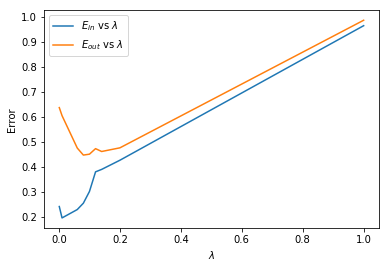

In [5]:
#plot E_in and E_out vs. lambda
plt.plot(regs, E_ins_vs_lambda, label='$E_{in}$ vs $\lambda$')
plt.plot(regs, E_outs_vs_lambda, label='$E_{out}$ vs $\lambda$')
plt.xlabel('$\lambda$')
plt.ylabel('Error')
plt.legend()
plt.savefig('plots/'+'task1_Ein_Eout_vs_lambda.pdf')
plt.savefig('plots/'+'task1_Ein_Eout_vs_lambda.png')

In [6]:
print(np.argmin(E_ins_vs_lambda))
print(regs[np.argmin(E_ins_vs_lambda)])
print(np.argmin(E_outs_vs_lambda))
print(regs[np.argmin(E_outs_vs_lambda)])

1
0.01
3
0.08


In [7]:
## scan E_in and E_out for different eta
## scan E_in and E_out for different lambda
reg = 0.10
etas = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1]
K = 20
E_ins_vs_eta = np.zeros(len(etas))
E_outs_vs_eta = np.zeros(len(etas))

for idx in range(len(etas)):
    print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, K, etas[idx], reg))
    U,V, e_in = train_model(M, N, K, etas[idx], reg, Y_train)
    E_ins_vs_eta[idx] = e_in
    eout = get_err(U, V, Y_test)
    E_outs_vs_eta[idx] = eout
    print("E_in = %6.4f, E_out = %6.4f"%(e_in, eout))

Training model with M = 943, N = 1682, k = 20, eta = 0.001, reg = 0.1
E_in = 0.3204, E_out = 0.4309
Training model with M = 943, N = 1682, k = 20, eta = 0.01, reg = 0.1
E_in = 0.3166, E_out = 0.4353
Training model with M = 943, N = 1682, k = 20, eta = 0.02, reg = 0.1
E_in = 0.3016, E_out = 0.4359
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.1
E_in = 0.3022, E_out = 0.4390
Training model with M = 943, N = 1682, k = 20, eta = 0.04, reg = 0.1
E_in = 0.3275, E_out = 0.4572
Training model with M = 943, N = 1682, k = 20, eta = 0.05, reg = 0.1
E_in = 0.3159, E_out = 0.4705
Training model with M = 943, N = 1682, k = 20, eta = 0.1, reg = 0.1
E_in = 0.3872, E_out = 0.5319


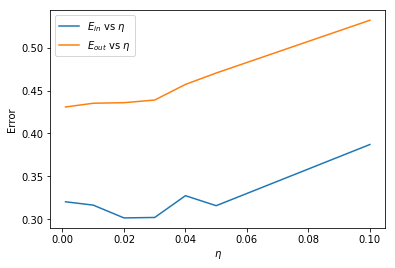

In [8]:
#plot E_in and E_out vs. eta
plt.clf()
plt.plot(etas, E_ins_vs_eta, label='$E_{in}$ vs $\eta$')
plt.plot(etas, E_outs_vs_eta, label='$E_{out}$ vs $\eta$')
plt.xlabel('$\eta$')
plt.ylabel('Error')
plt.legend()
plt.savefig('plots/'+'task1_Ein_Eout_vs_eta.pdf')
plt.savefig('plots/'+'task1_Ein_Eout_vs_eta.png')

In [9]:
print(np.argmin(E_ins_vs_eta))
print(regs[np.argmin(E_ins_vs_eta)])
print(np.argmin(E_outs_vs_eta))
print(regs[np.argmin(E_outs_vs_eta)])

2
0.06
0
0.001


In [10]:
## train with the optimized eta dna lambda, and get U, V
reg = 0.10
eta = 0.03
K = 20
UT, VT, e_in = train_model(M, N, K, eta, reg, Y_train, 1e-5, 300, True)
eout = get_err(UT, VT, Y_test)

Initial error = 6.925590638585364
After epoch: 0, error = 0.5025345254865851, eps = 0.9274380263415001
After epoch: 1, error = 0.42739211907189373, eps = 0.011698855668013021
After epoch: 2, error = 0.4025133546641866, eps = 0.003873353115656416
After epoch: 3, error = 0.3910465356078506, eps = 0.00178525905027535
After epoch: 4, error = 0.3743352068877084, eps = 0.002601772182257937
After epoch: 5, error = 0.36061104457862, eps = 0.002136702851015143
After epoch: 6, error = 0.3499254431745865, eps = 0.0016636319558600641
After epoch: 7, error = 0.3444019468235324, eps = 0.0008599483258117297
After epoch: 8, error = 0.3377999677258317, eps = 0.0010278563633029849
After epoch: 9, error = 0.33160770938335027, eps = 0.0009640672965402456
After epoch: 10, error = 0.3238164144012502, eps = 0.001213019915272263
After epoch: 11, error = 0.3211776956367875, eps = 0.00041081982128125295
After epoch: 12, error = 0.31655144357972553, eps = 0.0007202571448235482
After epoch: 13, error = 0.30915686

In [11]:
## read the movies.txt file, get the list of all movies ids, names, and their genres
ratings_all = np.loadtxt('data/data.txt')
movies_all = []
with open('data/movies.txt') as f:
    lines = f.readlines()  
    for line in lines:
        line_items = line.strip('\n').split(';')
        line_items_int_str = []
        for idx in range(len(line_items)):
            if idx == 1:
                line_items_int_str.append(line_items[idx][0:line_items[idx].find('(')]) #remove the year of the movie from the name
            else:
                line_items_int_str.append(int(line_items[idx]))
        movies_all.append(line_items_int_str)

In [12]:
## 10 random movies, 10 most popular movies, and 10 best movies
average_ratings_all = np.zeros(len(movies_all))
num_of_ratings_all = np.zeros(len(movies_all))
for rating in ratings_all:
    num_of_ratings_all[int(rating[1])-1] += 1
    average_ratings_all[int(rating[1])-1] += rating[2]
average_ratings_all = np.divide(average_ratings_all, num_of_ratings_all)
id_most_popular_10 = num_of_ratings_all.argsort()[-10:][::-1]
id_best_10 = average_ratings_all.argsort()[-10:][::-1]

name_most_popular_10 = []
for idx in range(len(id_most_popular_10)):
    name_most_popular_10.append(movies_all[id_most_popular_10[idx]][1]+"(%.0f, %.1f)"%(num_of_ratings_all[id_most_popular_10[idx]], average_ratings_all[id_most_popular_10[idx]]))
    
name_best_10 = []
for idx in range(len(id_best_10)):
    name_best_10.append(movies_all[id_best_10[idx]][1]+"(%.0f, %.1f)"%(num_of_ratings_all[id_best_10[idx]], average_ratings_all[id_best_10[idx]]))
    #print(average_ratings_all[id_best_10[idx]])
    #print(num_of_ratings_all[id_best_10[idx]])

## 10 random movies
id_all = np.arange(len(movies_all))
np.random.shuffle(id_all)
id_random10 = id_all[:10]
name_random10 = []
for idx in range(len(id_random10)):
    name_random10.append(movies_all[id_random10[idx]][1]+"(%.0f, %.1f)"%(num_of_ratings_all[id_random10[idx]], average_ratings_all[id_random10[idx]]))

## 10 random movies of genre = action
print(id_all)
id_random_action = []
id_random_documentary = []
id_random_drama = []
name_random_action = []
name_random_documentary = []
name_random_drama = []

for idx in id_all:
    if movies_all[idx][3] == 1 and num_of_ratings_all[idx] > 50:
        id_random_action.append(idx)
        name_random_action.append(movies_all[idx][1]+"(%.0f, %.1f)"%(num_of_ratings_all[idx], average_ratings_all[idx]))
    if movies_all[idx][9] == 1 and num_of_ratings_all[idx] > 20:
        id_random_documentary.append(idx)
        name_random_documentary.append(movies_all[idx][1]+"(%.0f, %.1f)"%(num_of_ratings_all[idx], average_ratings_all[idx]))
    if movies_all[idx][10] == 1 and num_of_ratings_all[idx] > 50:
        id_random_drama.append(idx)
        name_random_drama.append(movies_all[idx][1]+"(%.0f, %.1f)"%(num_of_ratings_all[idx], average_ratings_all[idx]))

id_random10_action = id_random_action[:10]
name_random10_action = name_random_action[:10]
id_random10_documentary = id_random_documentary[:10]
name_random10_documentary = name_random_documentary[:10]
id_random10_drama = id_random_drama[:10]
name_random10_drama = name_random_drama[:10]

print('10 random movies')
print(id_random10)
print(name_random10)
print('10 random action movies')
print(id_random10_action)
print(name_random10_action)
print('10 random documentary movies')
print(id_random10_documentary)
print(name_random10_documentary)
print('10 random drama movies')
print(id_random10_drama)
print(name_random10_drama)

print('10 most popular movies')
print(id_most_popular_10)
print(name_most_popular_10)
print('10 best movies')
print(id_best_10)
print(name_best_10)

[1454 1490 1271 ...  798  807 1644]
10 random movies
[1454 1490 1271 1355  299  322 1624   58 1458 1071]
['Outlaw, The (2, 2.5)', 'Tough and Deadly (2, 3.0)', 'Talking About Sex (5, 1.8)', "Ed's Next Move (3, 2.7)", 'Air Force One (431, 3.6)', "Dante's Peak (240, 2.9)", 'Nightwatch (1, 4.0)', 'Three Colors: Red (83, 4.1)', 'Madame Butterfly (7, 3.6)', "Pyromaniac's Love Story, A (7, 2.4)"]
10 random action movies
[299, 322, 61, 194, 32, 91, 230, 1015, 251, 390]
['Air Force One (431, 3.6)', "Dante's Peak (240, 2.9)", 'Stargate (127, 3.1)', 'Terminator, The (301, 3.9)', 'Desperado (97, 3.5)', 'True Romance (104, 3.6)', 'Batman Returns (142, 2.7)', 'Con Air (137, 3.5)', 'Lost World: Jurassic Park, The (158, 2.9)', 'Last Action Hero (59, 2.7)']
10 random documentary movies
[643, 1083, 846, 31, 812, 644, 1021, 1141, 47, 1064]
['Thin Blue Line, The (35, 3.8)', 'Anne Frank Remembered (21, 3.9)', 'Looking for Richard (55, 3.7)', 'Crumb (81, 3.8)', 'Celluloid Closet, The (56, 3.9)', 'Paris Is B

In [13]:
def visualize_V(Vtilt, id_movie, name_movie, figname):
    """
    2D visualizatin of Vtilt.
    Input: 
    Vtilt: 2xn matrix 
    id_movie: the id of the movies to visualize
    name_movie: the names of the movies to visualize
    figname: the figure name you want to save
    """   
    #normalize Vtilt such that each row has variance of 1.0
    Vtilt_row_means = np.mean(Vtilt, axis=1)
    Vtilt_row_std = np.std(Vtilt, axis=1)
    Vtiltp = np.zeros_like(Vtilt)
    for irow in range(len(Vtilt)):
        Vtiltp[irow] = np.divide(Vtilt[irow] - Vtilt_row_means[irow],Vtilt_row_std[irow])
        
    fig = plt.figure()
    fig.set_size_inches(40,30)
    ax = fig.add_subplot(1, 1, 1)
    for idx in range(len(id_movie)):
        plt.scatter(Vtiltp[0][id_movie[idx]], Vtiltp[1][id_movie[idx]], s=5000, marker='o', color='blue')
        plt.text(Vtiltp[0][id_movie[idx]], Vtiltp[1][id_movie[idx]]-0.3, name_movie[idx], 
                 rotation=45, bbox=dict(facecolor='red', alpha=0.05), fontsize=50,
                 horizontalalignment='center', verticalalignment='center')
        #print(str(Vtiltp[0][id_movie[idx]])+', '+str(Vtiltp[1][id_movie[idx]])+', '+name_movie[idx])
    #plt.xlim(-1.0*np.amax(Vtiltp[0]), np.amax(Vtiltp[0]))
    #plt.ylim(-1.0*np.amax(Vtiltp[1]), np.amax(Vtiltp[1]))
    #plt.xlim(np.amin(Vtiltp[0]), np.amax(Vtiltp[0]))
    #plt.ylim(np.amin(Vtiltp[1]), np.amax(Vtiltp[1]))
    plt.xlim(-2.5,2.5)
    plt.ylim(-2.5,2.5)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_linewidth(5.5)
    ax.spines['bottom'].set_linewidth(5.5)
    ax.spines['right'].set_linewidth(5.5)
    ax.spines['top'].set_linewidth(5.5)
    #ax.set_yticklabels([])
    #ax.set_xticklabels([])
    plt.xticks([-2,-1,1,2], fontsize=60)
    plt.yticks([-2,-1,1,2], fontsize=60)
    plt.xlabel('V[0]',horizontalalignment='right', x=1.0, fontsize=60)
    plt.ylabel('V[1]',horizontalalignment='right', y=1.0, fontsize=60)
    #plt.show()
    plt.savefig('plots/'+figname+'.pdf')
    plt.savefig('plots/'+figname+'.png')


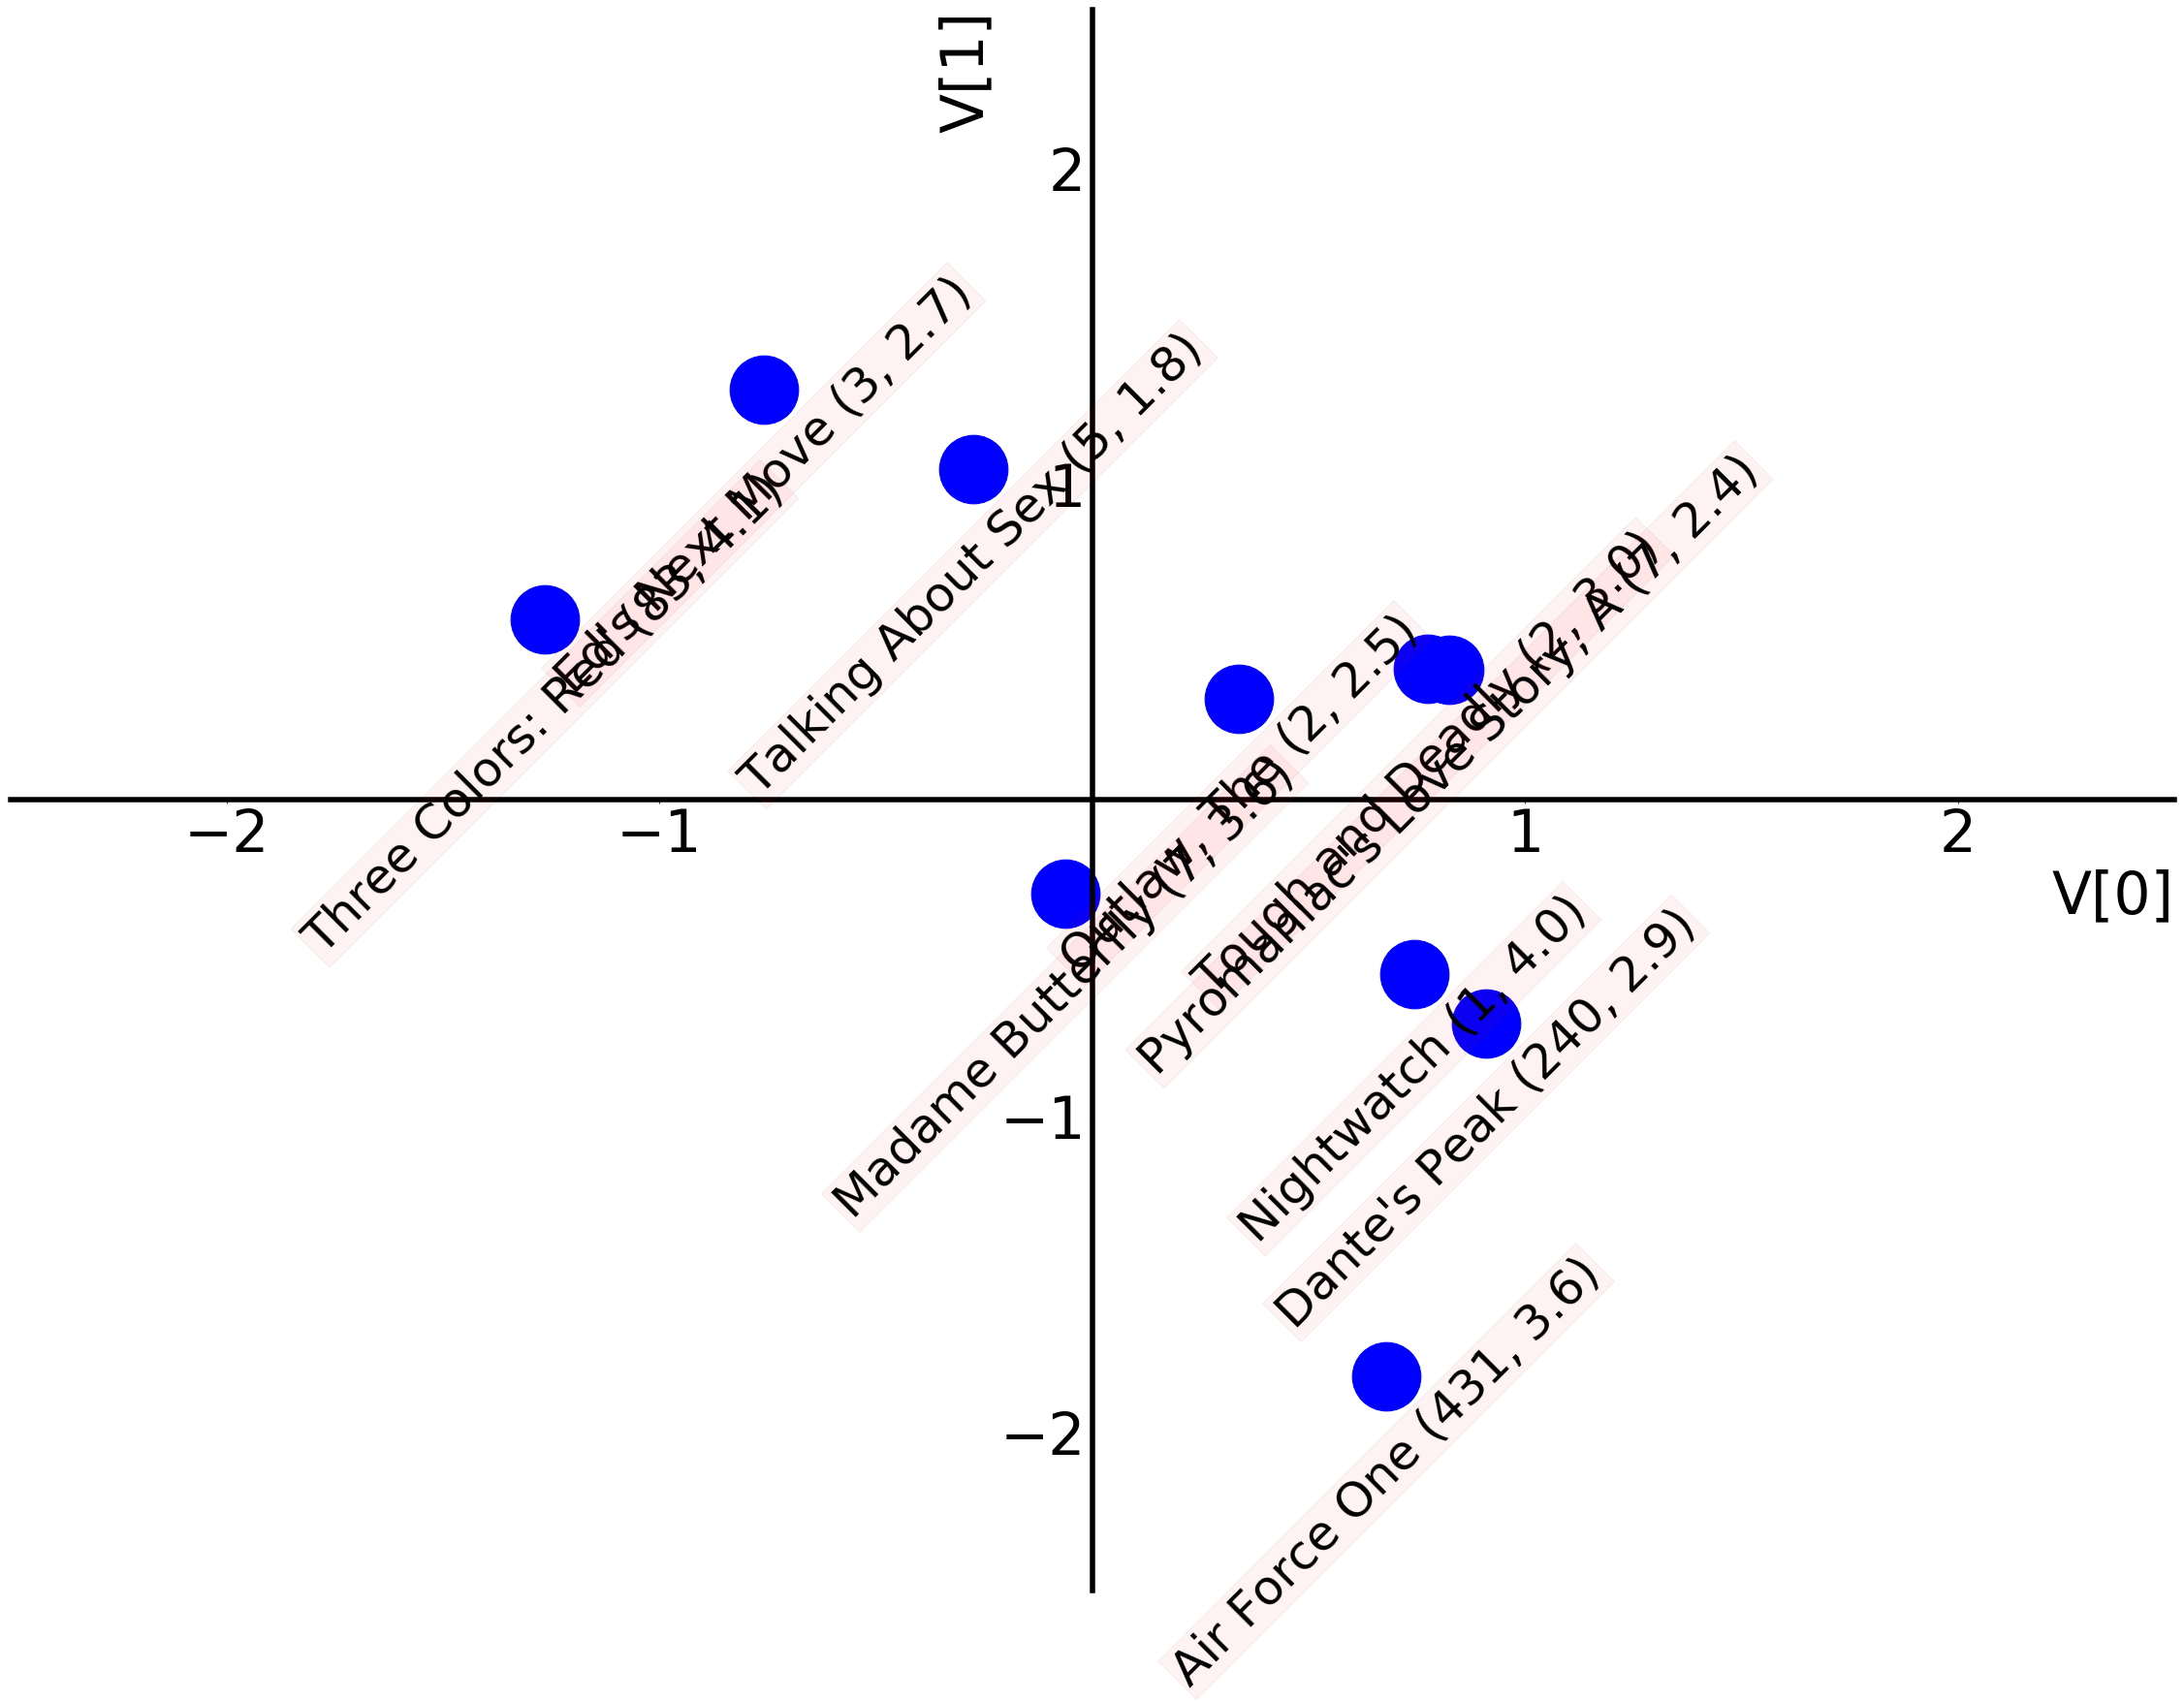

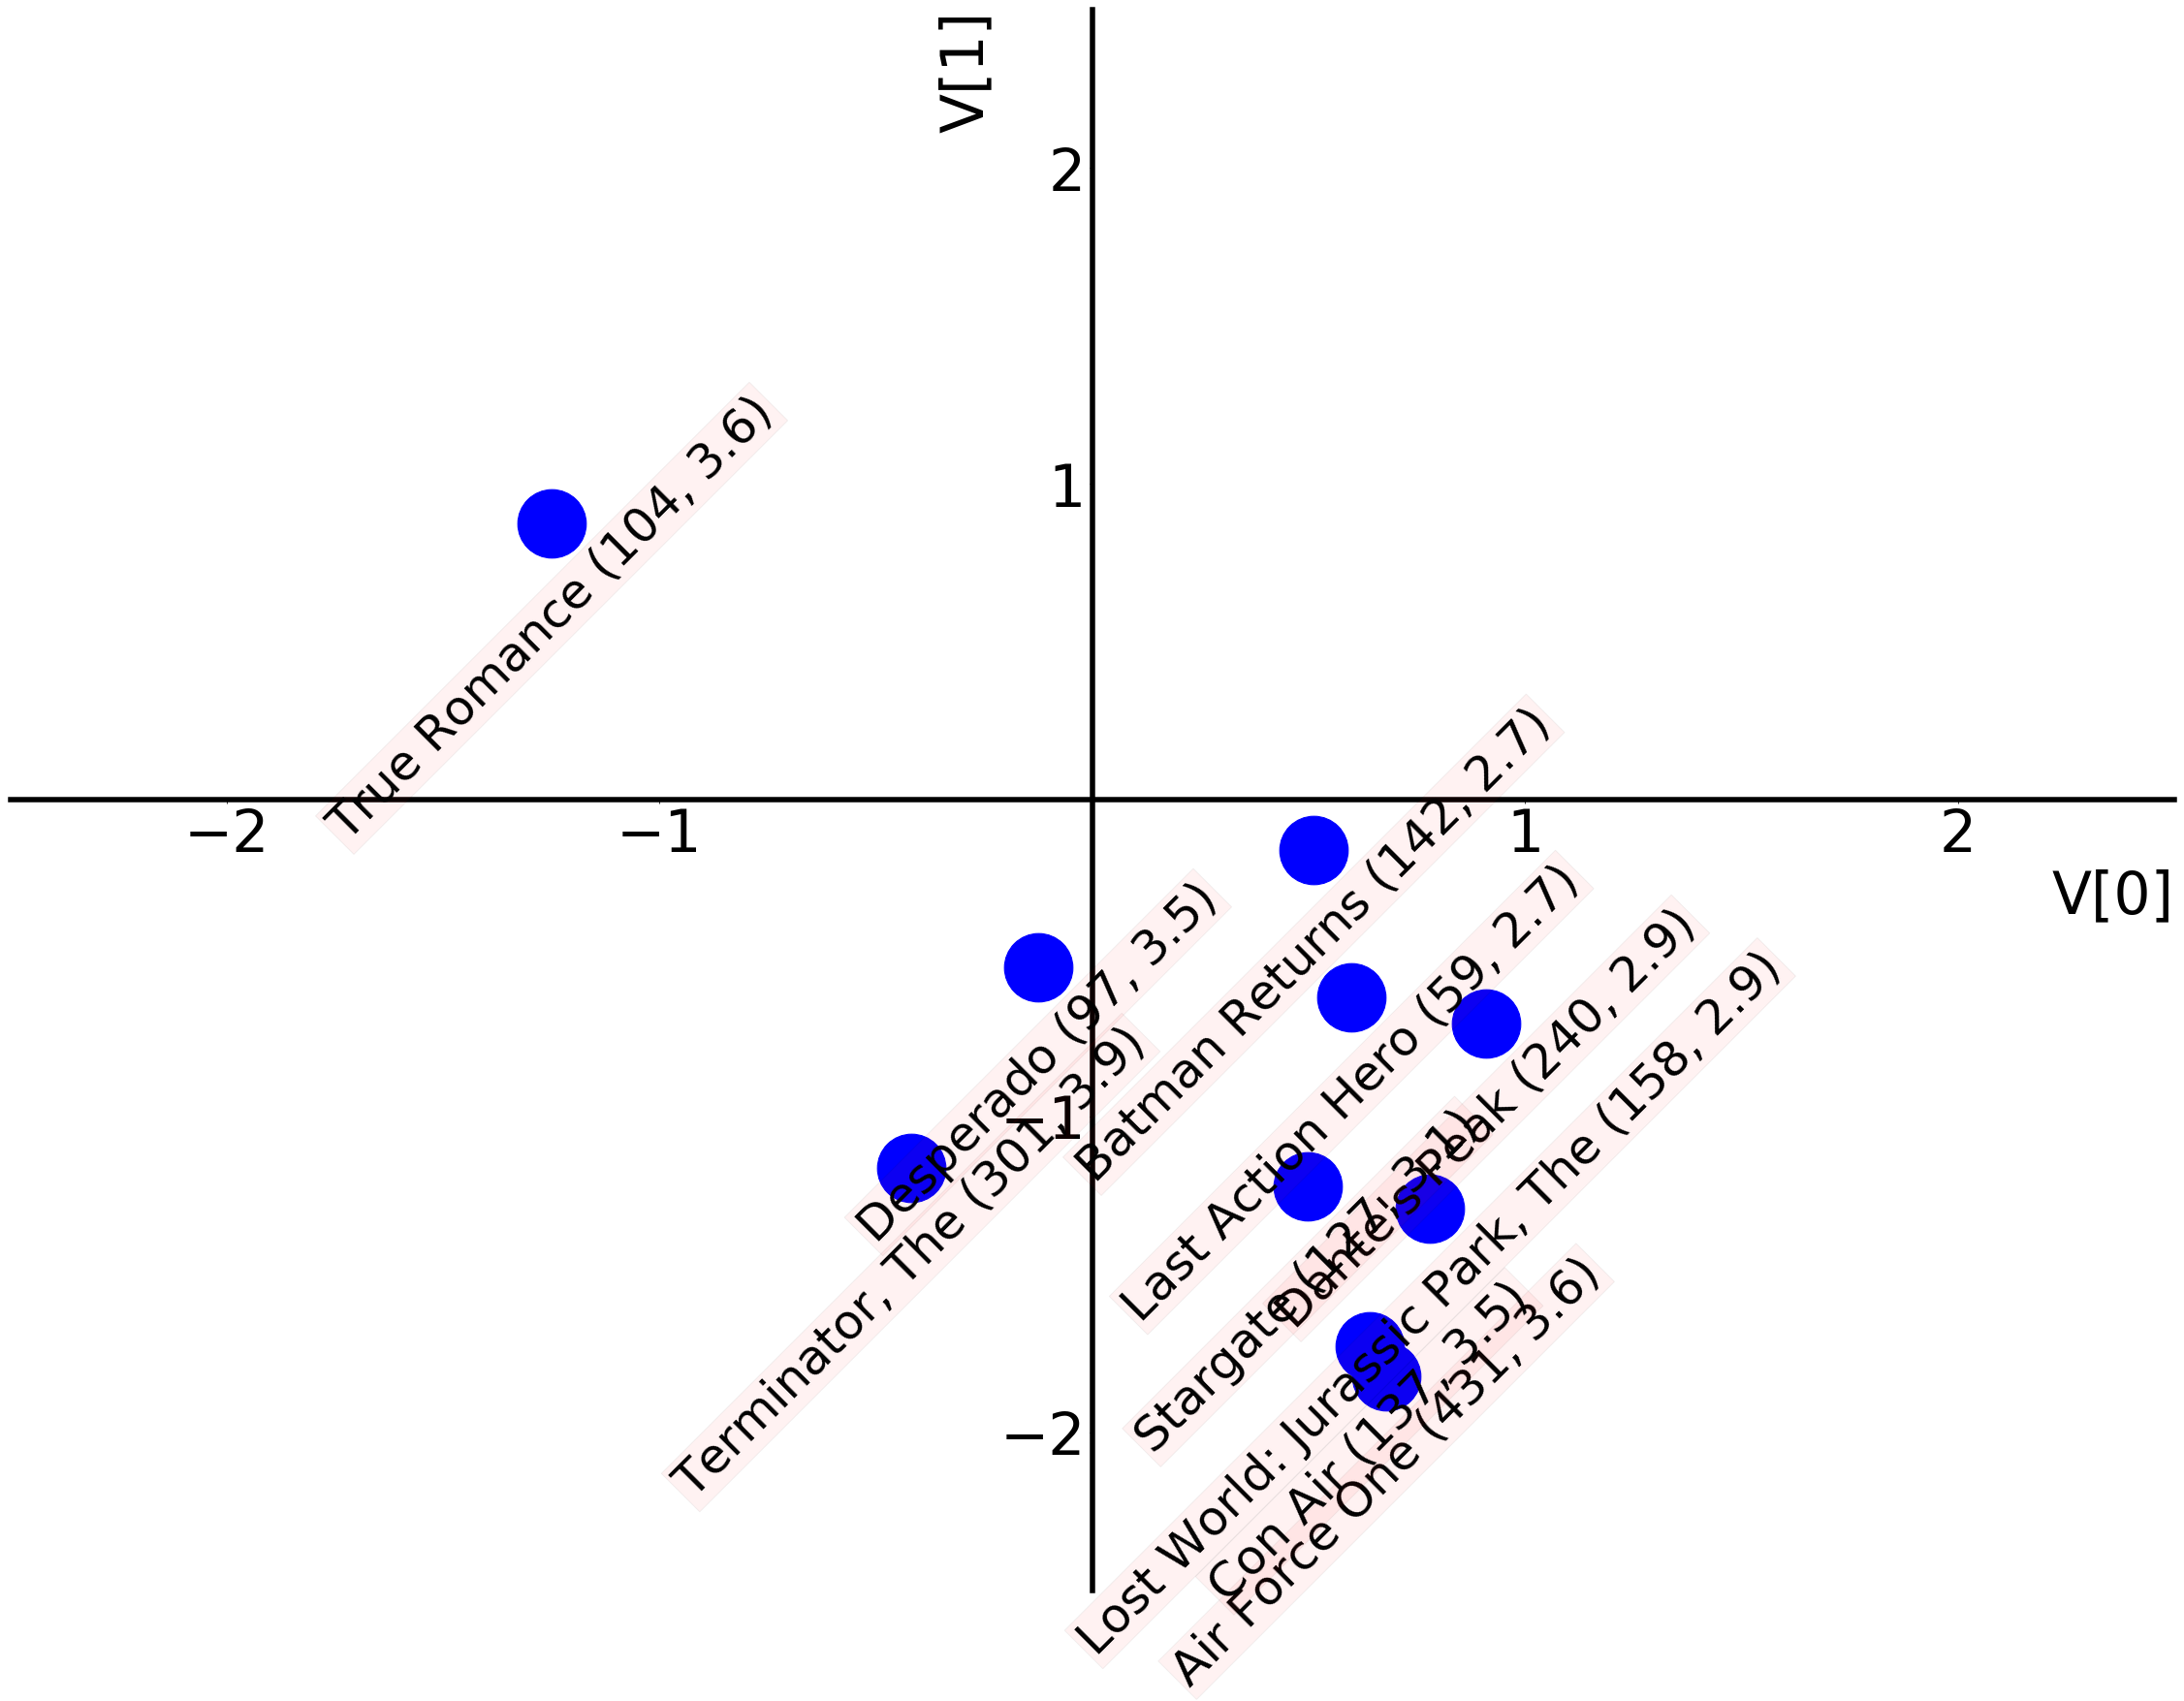

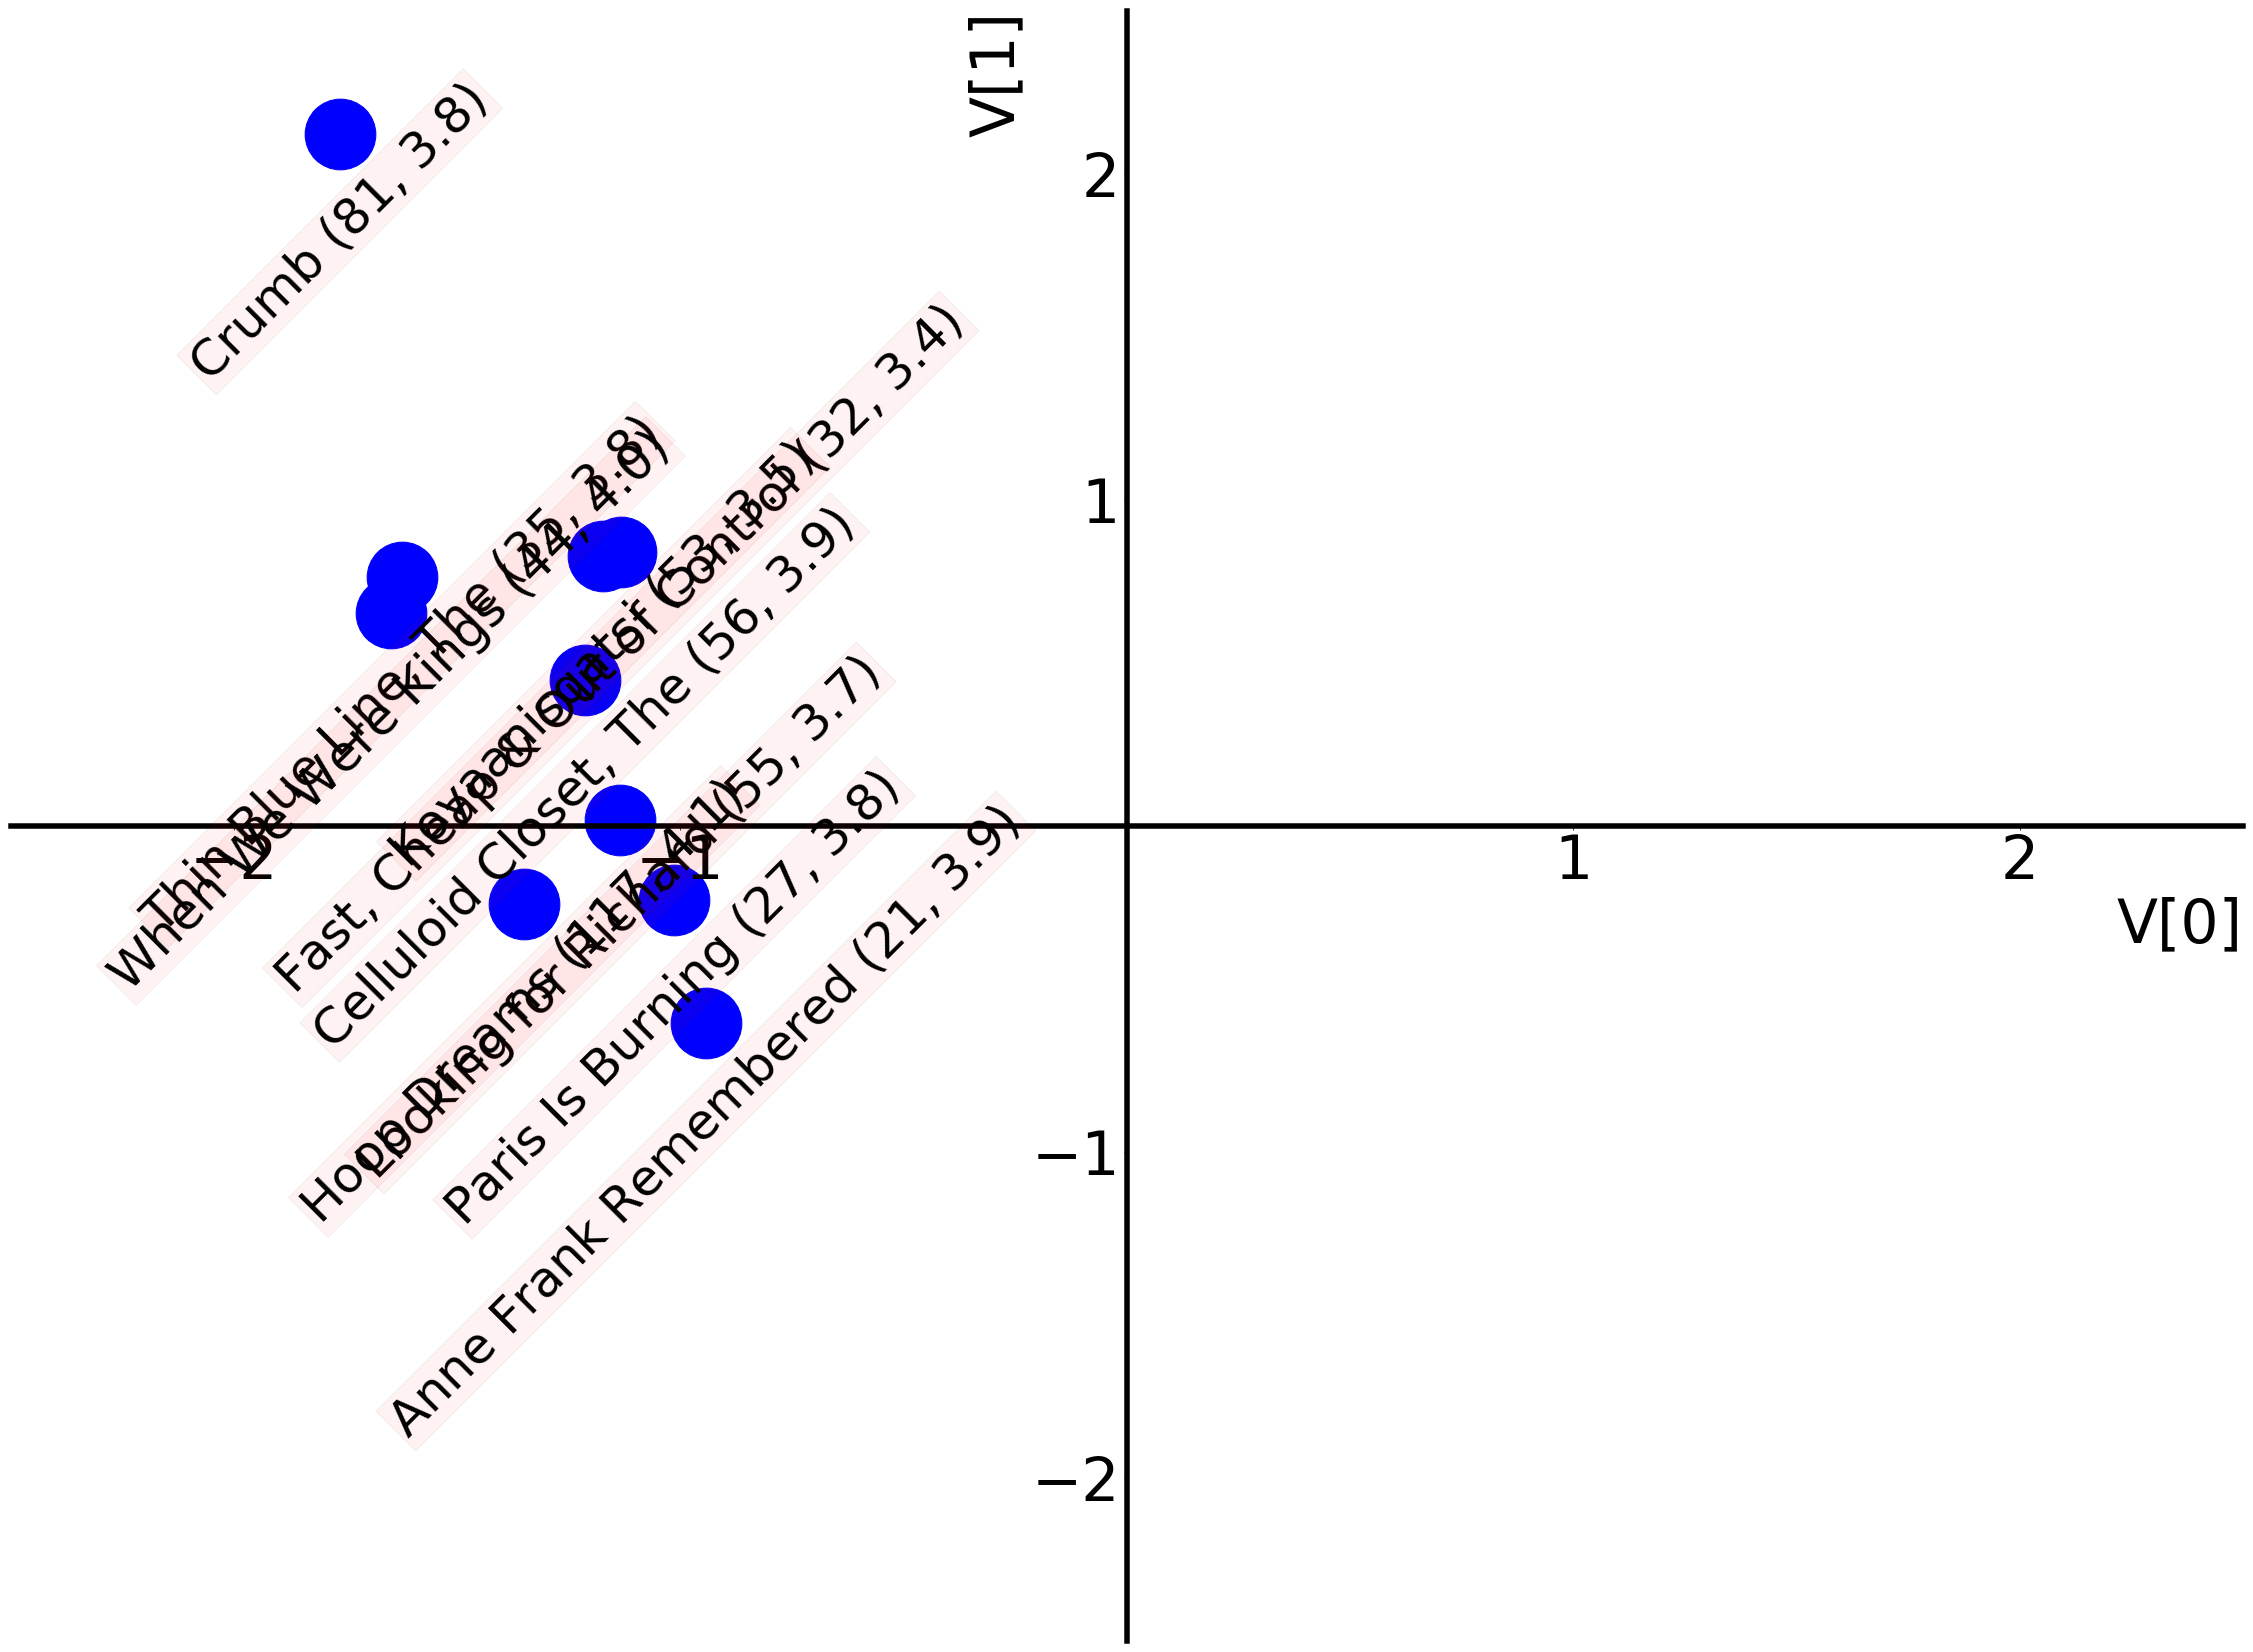

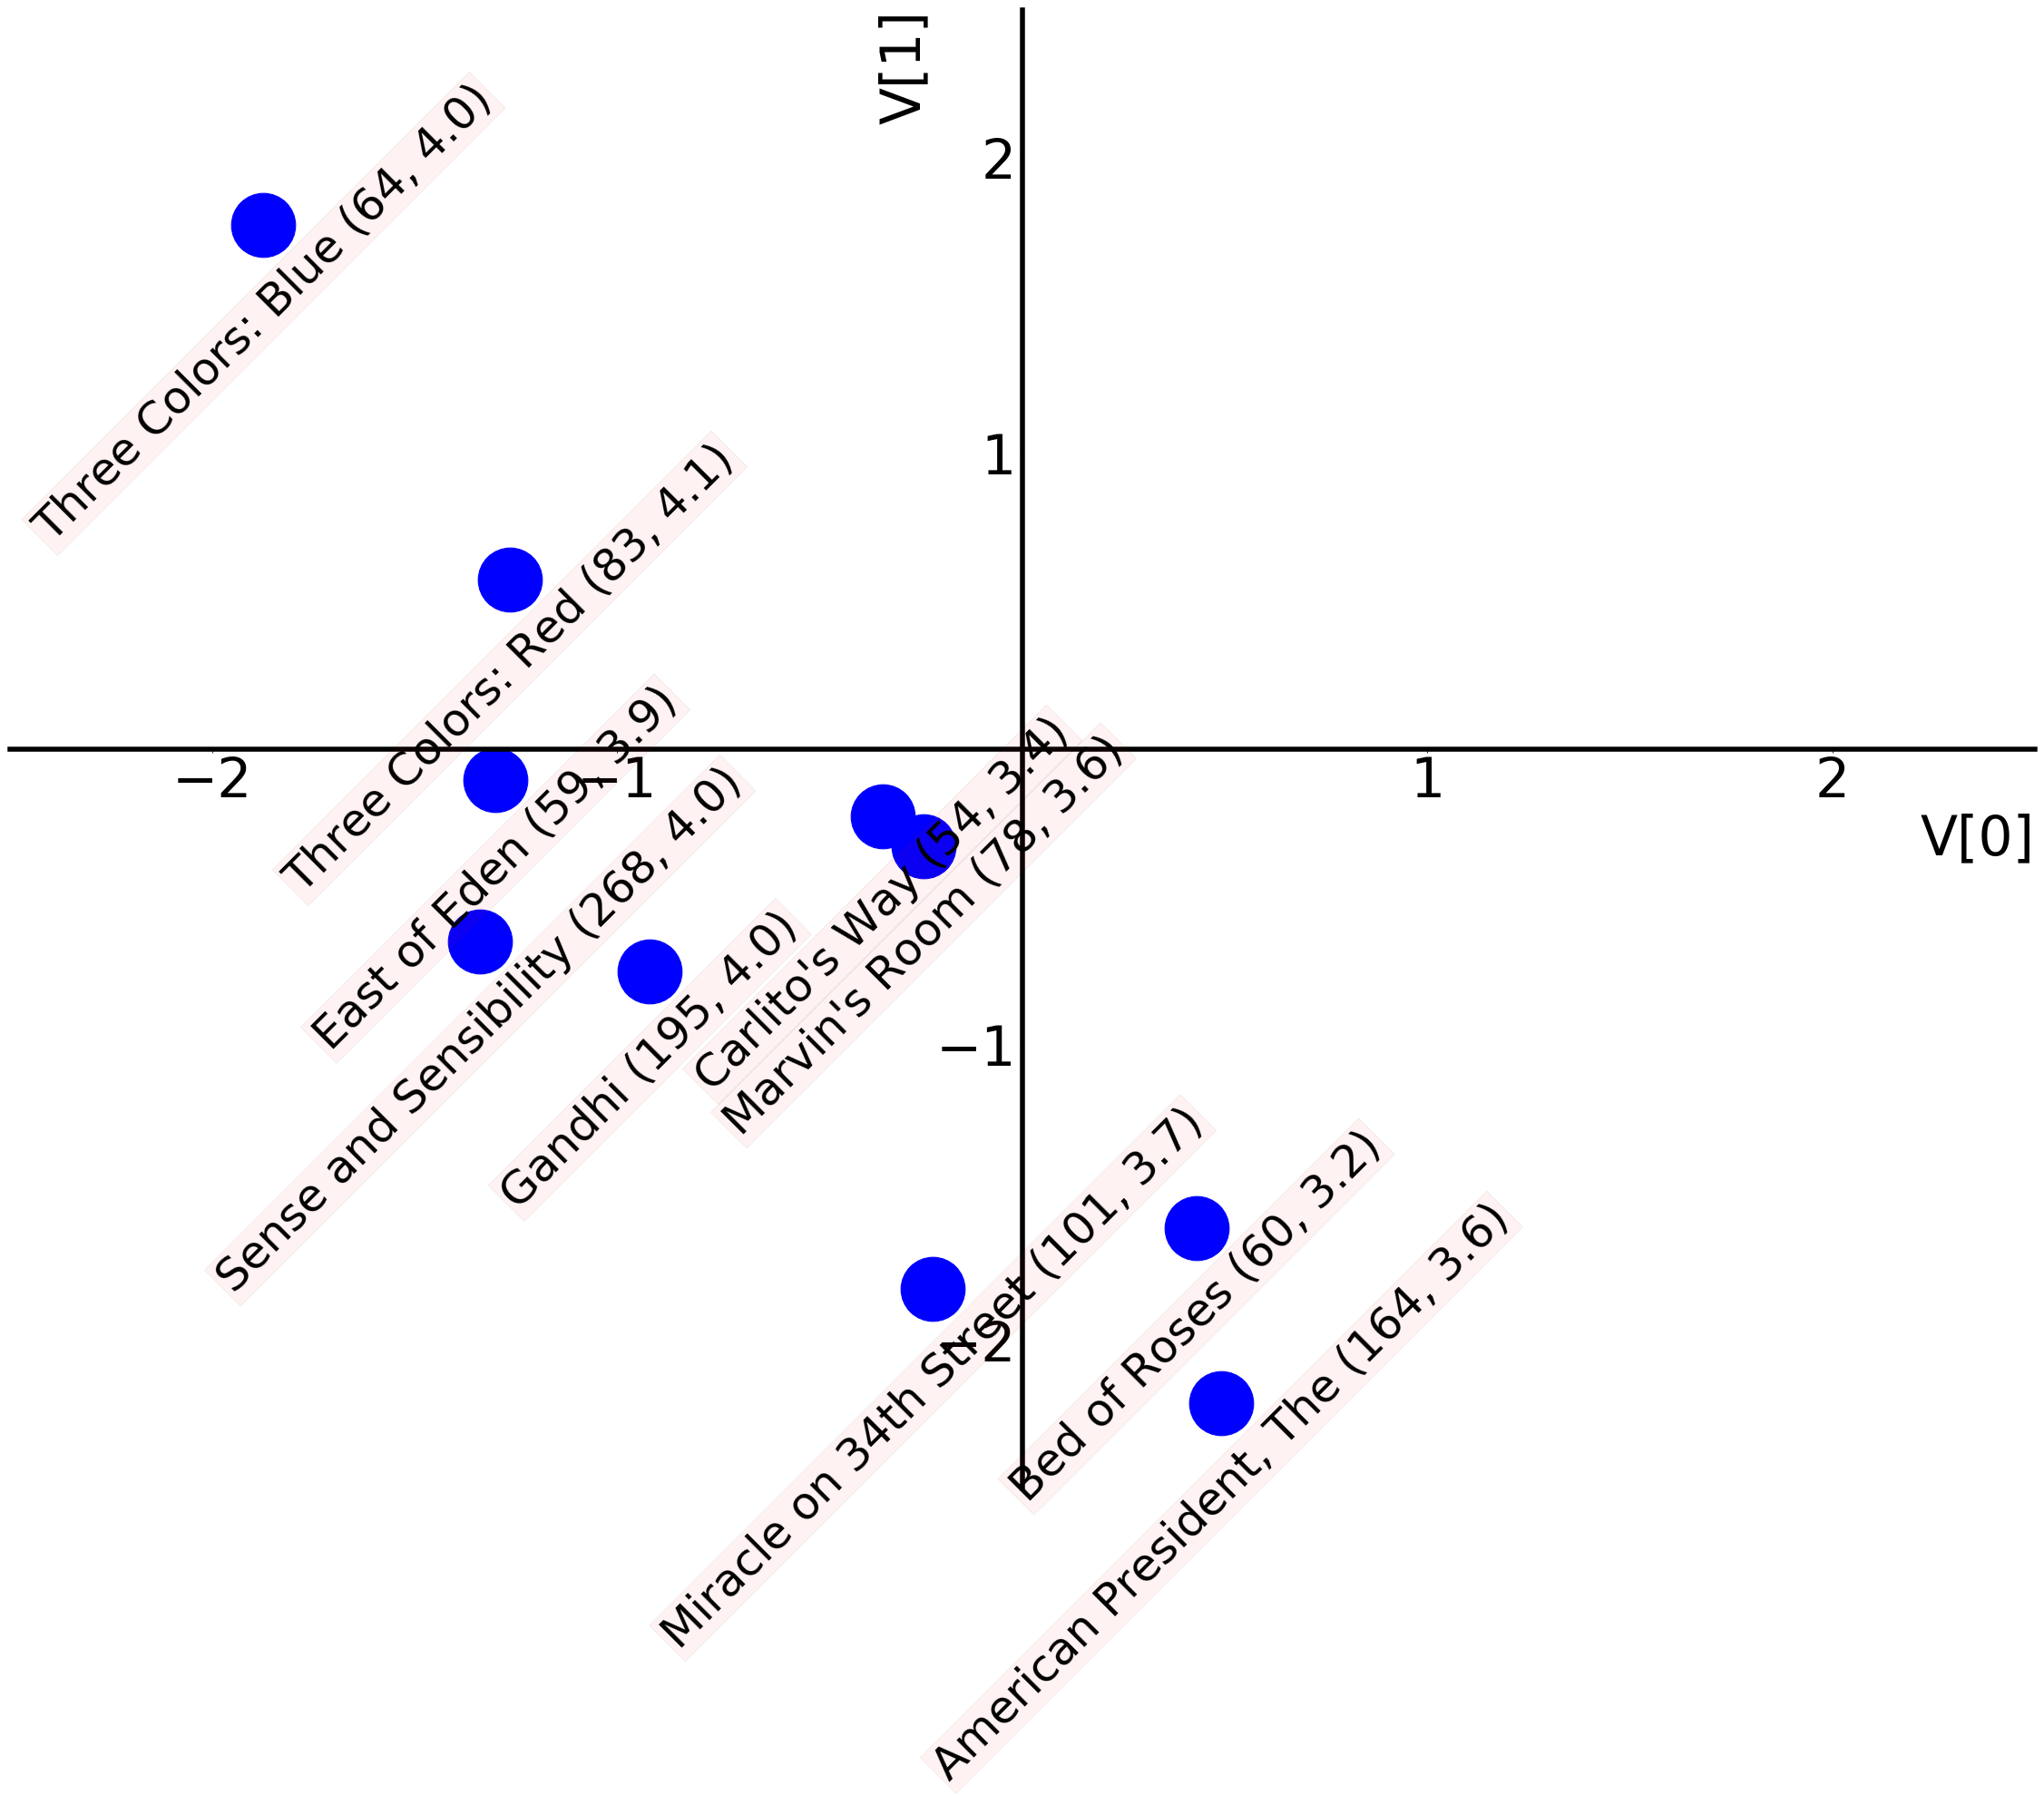

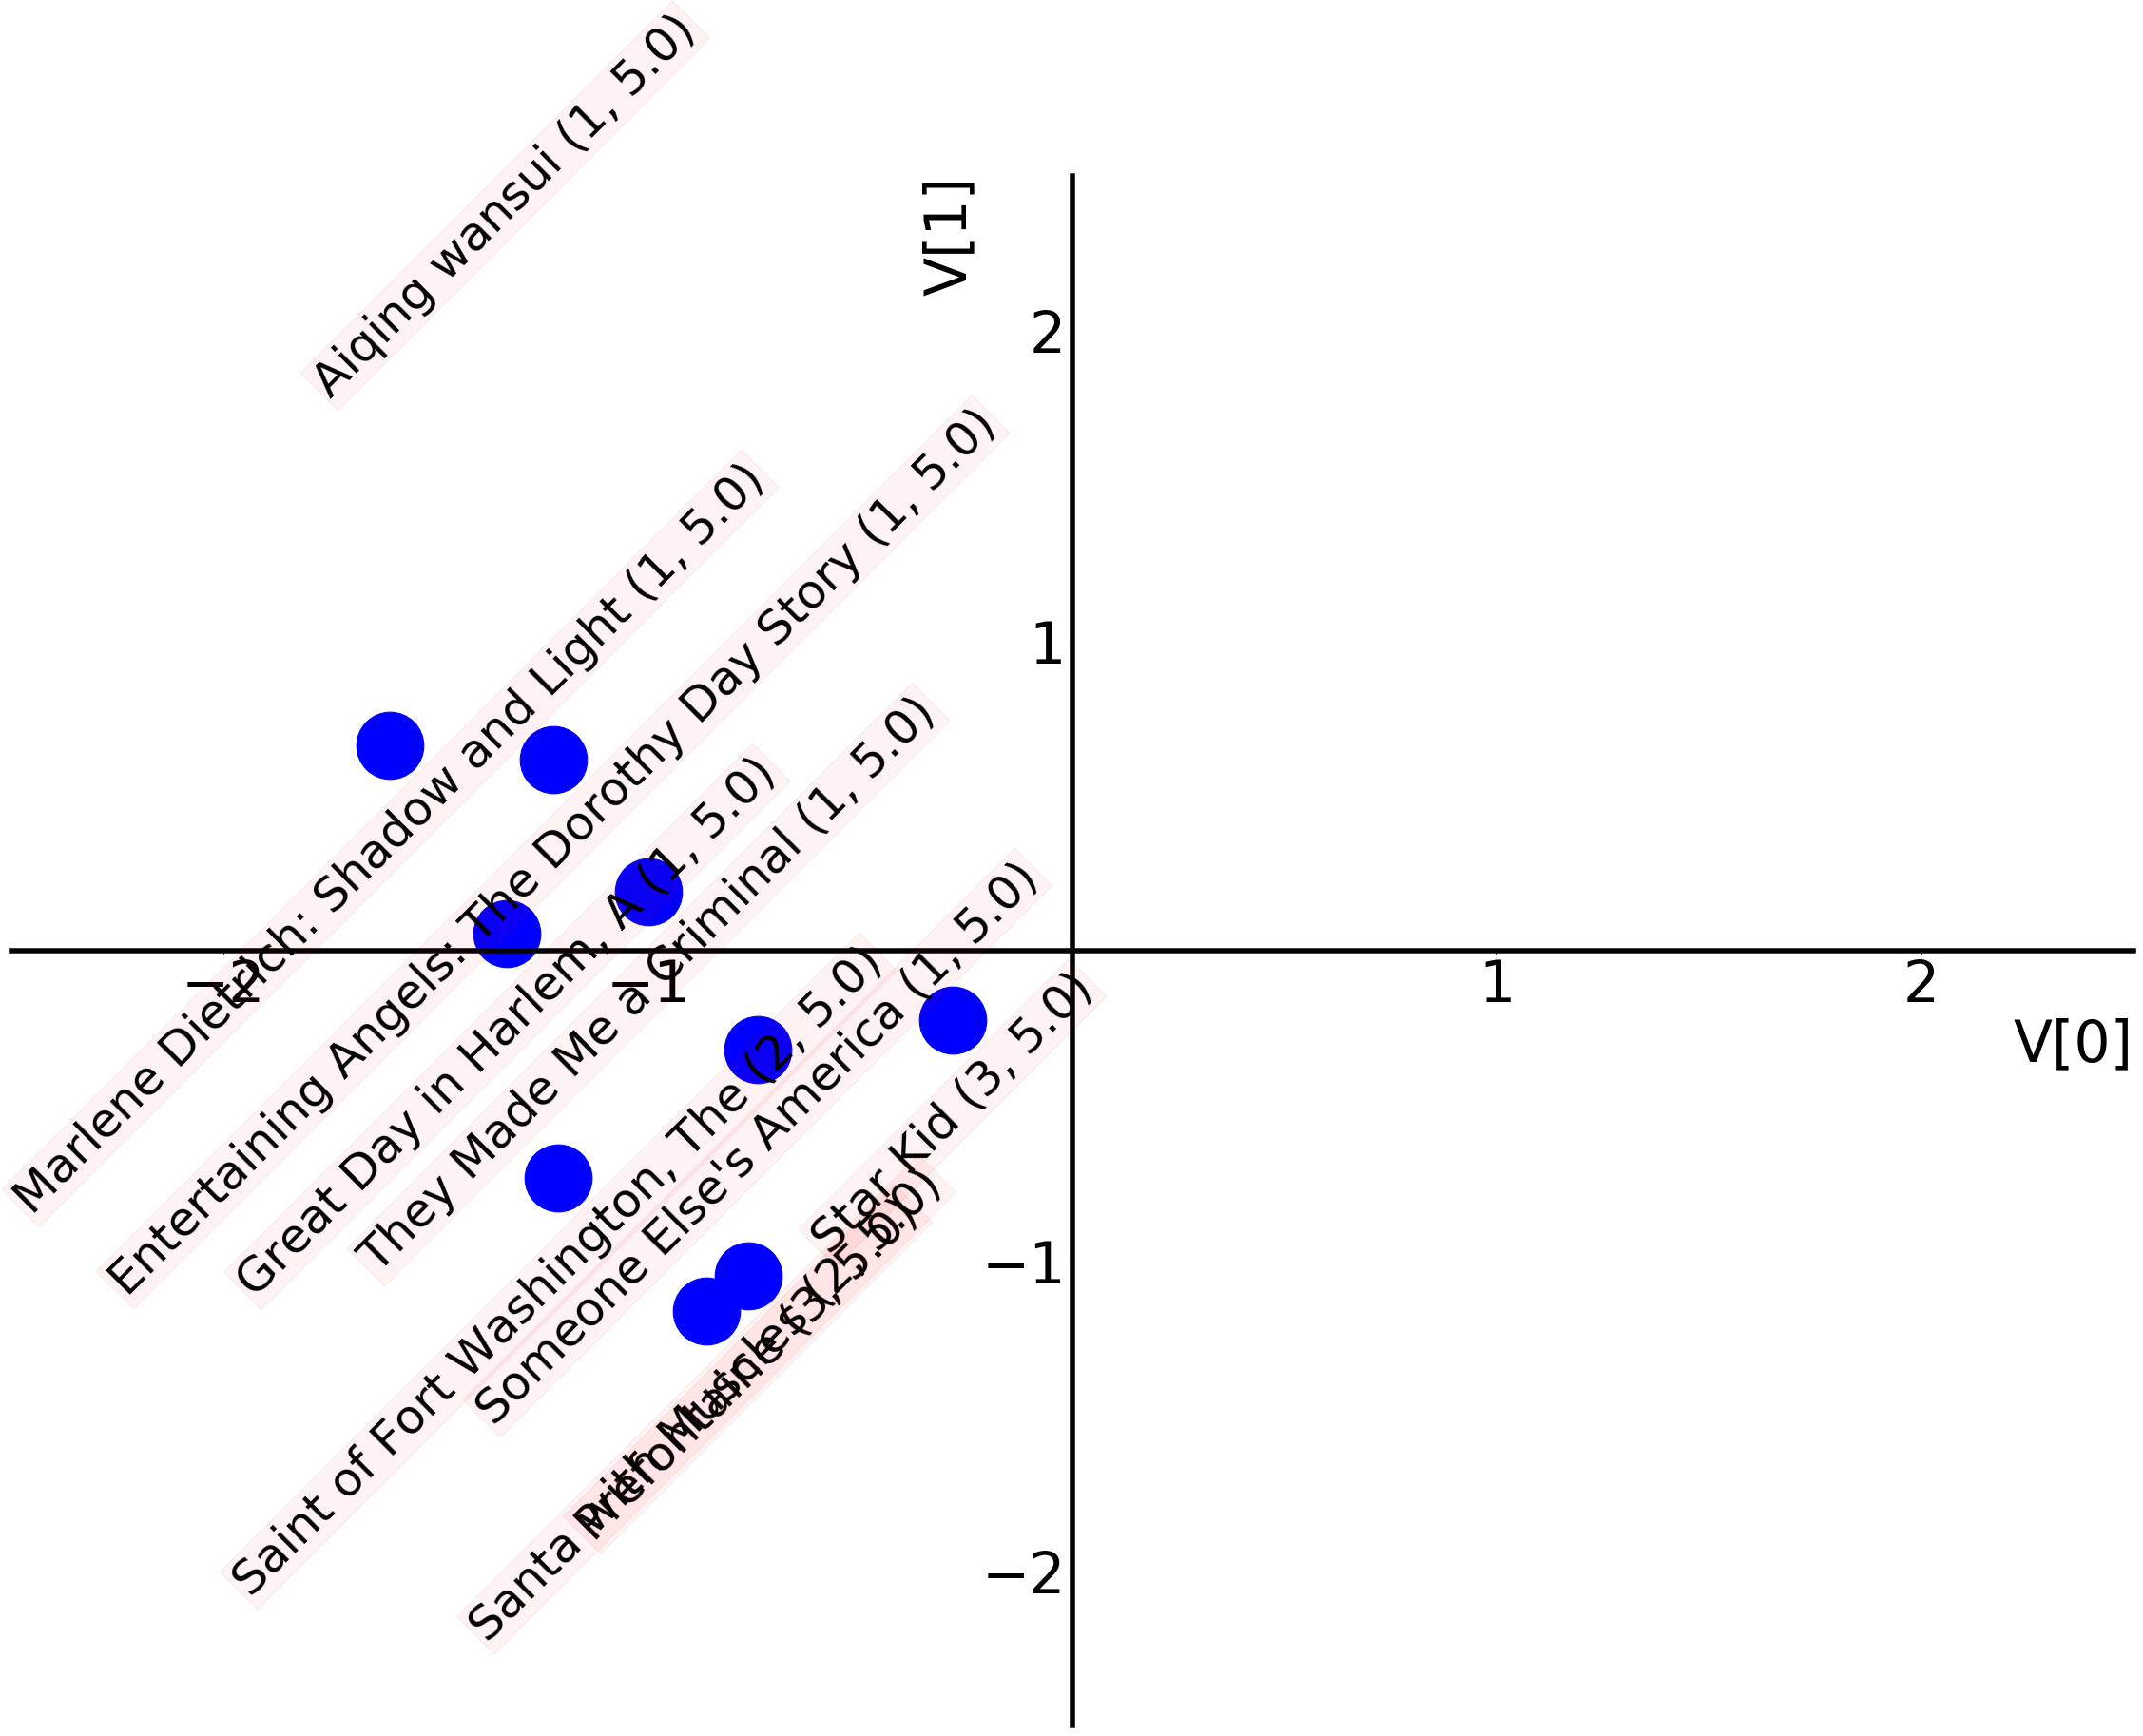

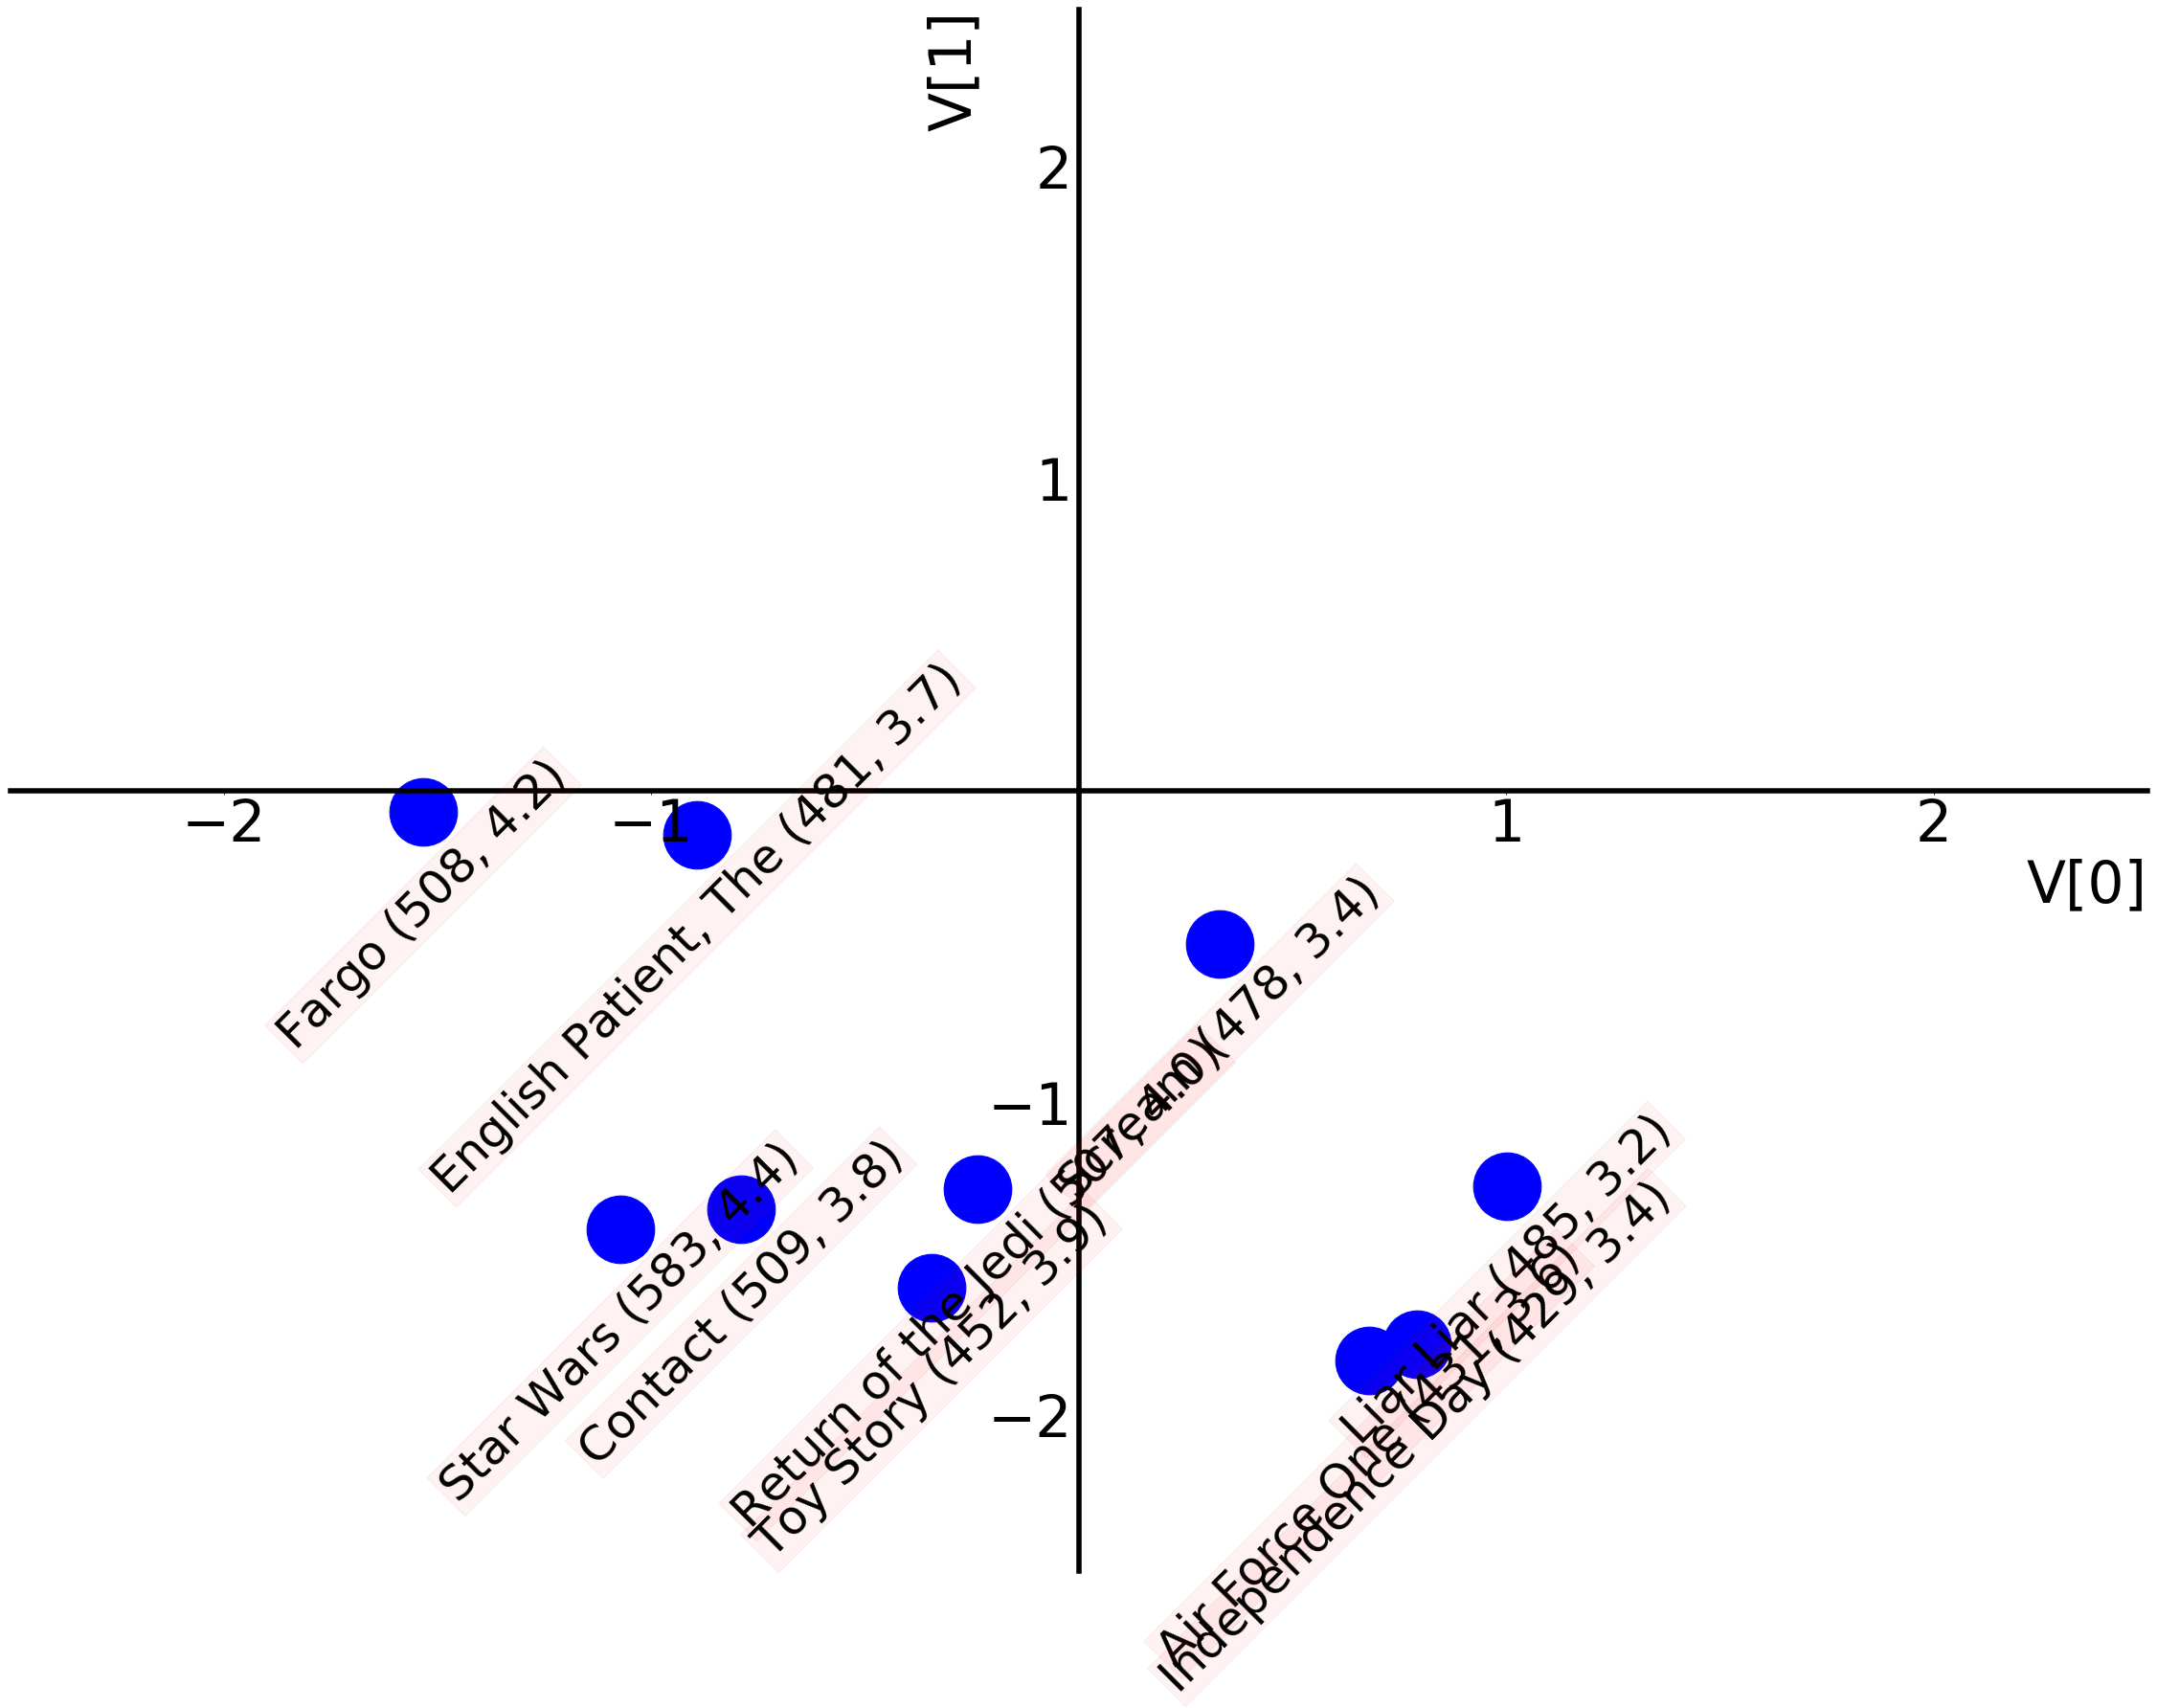

In [14]:
## perform SVD to V and get the A, Sigma, B
U = UT.transpose()
V = VT.transpose()
Vp = np.zeros_like(V)
V_row_means = np.mean(V, axis=1)
for irow in range(len(V)):
    Vp[irow] = V[irow] - V_row_means[irow]
A, S, B =  np.linalg.svd(Vp)
A12 = A[:,[0,1]]
A12T = A12.transpose()
Vtilt = np.matmul(A12T, V)

## visualize the movies of choices
visualize_V(Vtilt, id_random10, name_random10, 'visualize_V_random10movies')
visualize_V(Vtilt, id_random10_action, name_random10_action, 'visualize_V_random10movies_action')
visualize_V(Vtilt, id_random10_documentary, name_random10_documentary, 'visualize_V_random10movies_documentary')
visualize_V(Vtilt, id_random10_drama, name_random10_drama, 'visualize_V_random10movies_drama')
visualize_V(Vtilt, id_best_10, name_best_10, 'visualize_V_best10movies')
visualize_V(Vtilt, id_most_popular_10, name_most_popular_10, 'visualize_V_mostpopular10movies')

## task 2: add bias term

In [15]:
## train with the optimized eta dna lambda, and get U, V
reg = 0.10
eta = 0.03
K = 20
UT_bias, VT_bias, a_bias, b_bias, e_in = train_model_bias(M, N, K, eta, reg, Y_train, 1e-5, 300, True)
eout = get_err_bias(UT_bias, VT_bias, Y_test, a_bias, b_bias)

Initial error = 7.22602212081174
After epoch: 0, error = 0.5589756450539785, eps = 0.9226440722560111
After epoch: 1, error = 0.45055669892444455, eps = 0.01626191545593077
After epoch: 2, error = 0.42128710698380833, eps = 0.004390188676059815
After epoch: 3, error = 0.4034895038195615, eps = 0.002669488390243147
After epoch: 4, error = 0.40212584790053685, eps = 0.00020453673511697896
After epoch: 5, error = 0.3909630059436656, eps = 0.0016743309046158231
After epoch: 6, error = 0.3738623694359063, eps = 0.0025649493475018437
After epoch: 7, error = 0.3707532310979667, eps = 0.00046634418242692675
After epoch: 8, error = 0.3574086071776561, eps = 0.0020015795553298414
After epoch: 9, error = 0.3563537844568077, eps = 0.00015821439443745636
After epoch: 10, error = 0.35649531972889437, eps = 2.1229081363283938e-05
After epoch: 11, error = 0.3412320753843987, eps = 0.002289356223928359
After epoch: 12, error = 0.34192673105177107, eps = 0.00010419241412193922
After epoch: 13, error = 0

After epoch: 112, error = 0.2872520493948505, eps = 0.00015729735269822087
After epoch: 113, error = 0.2895082735290478, eps = 0.0003384143402031491
After epoch: 114, error = 0.28955845571304817, eps = 7.5268987823692385e-06


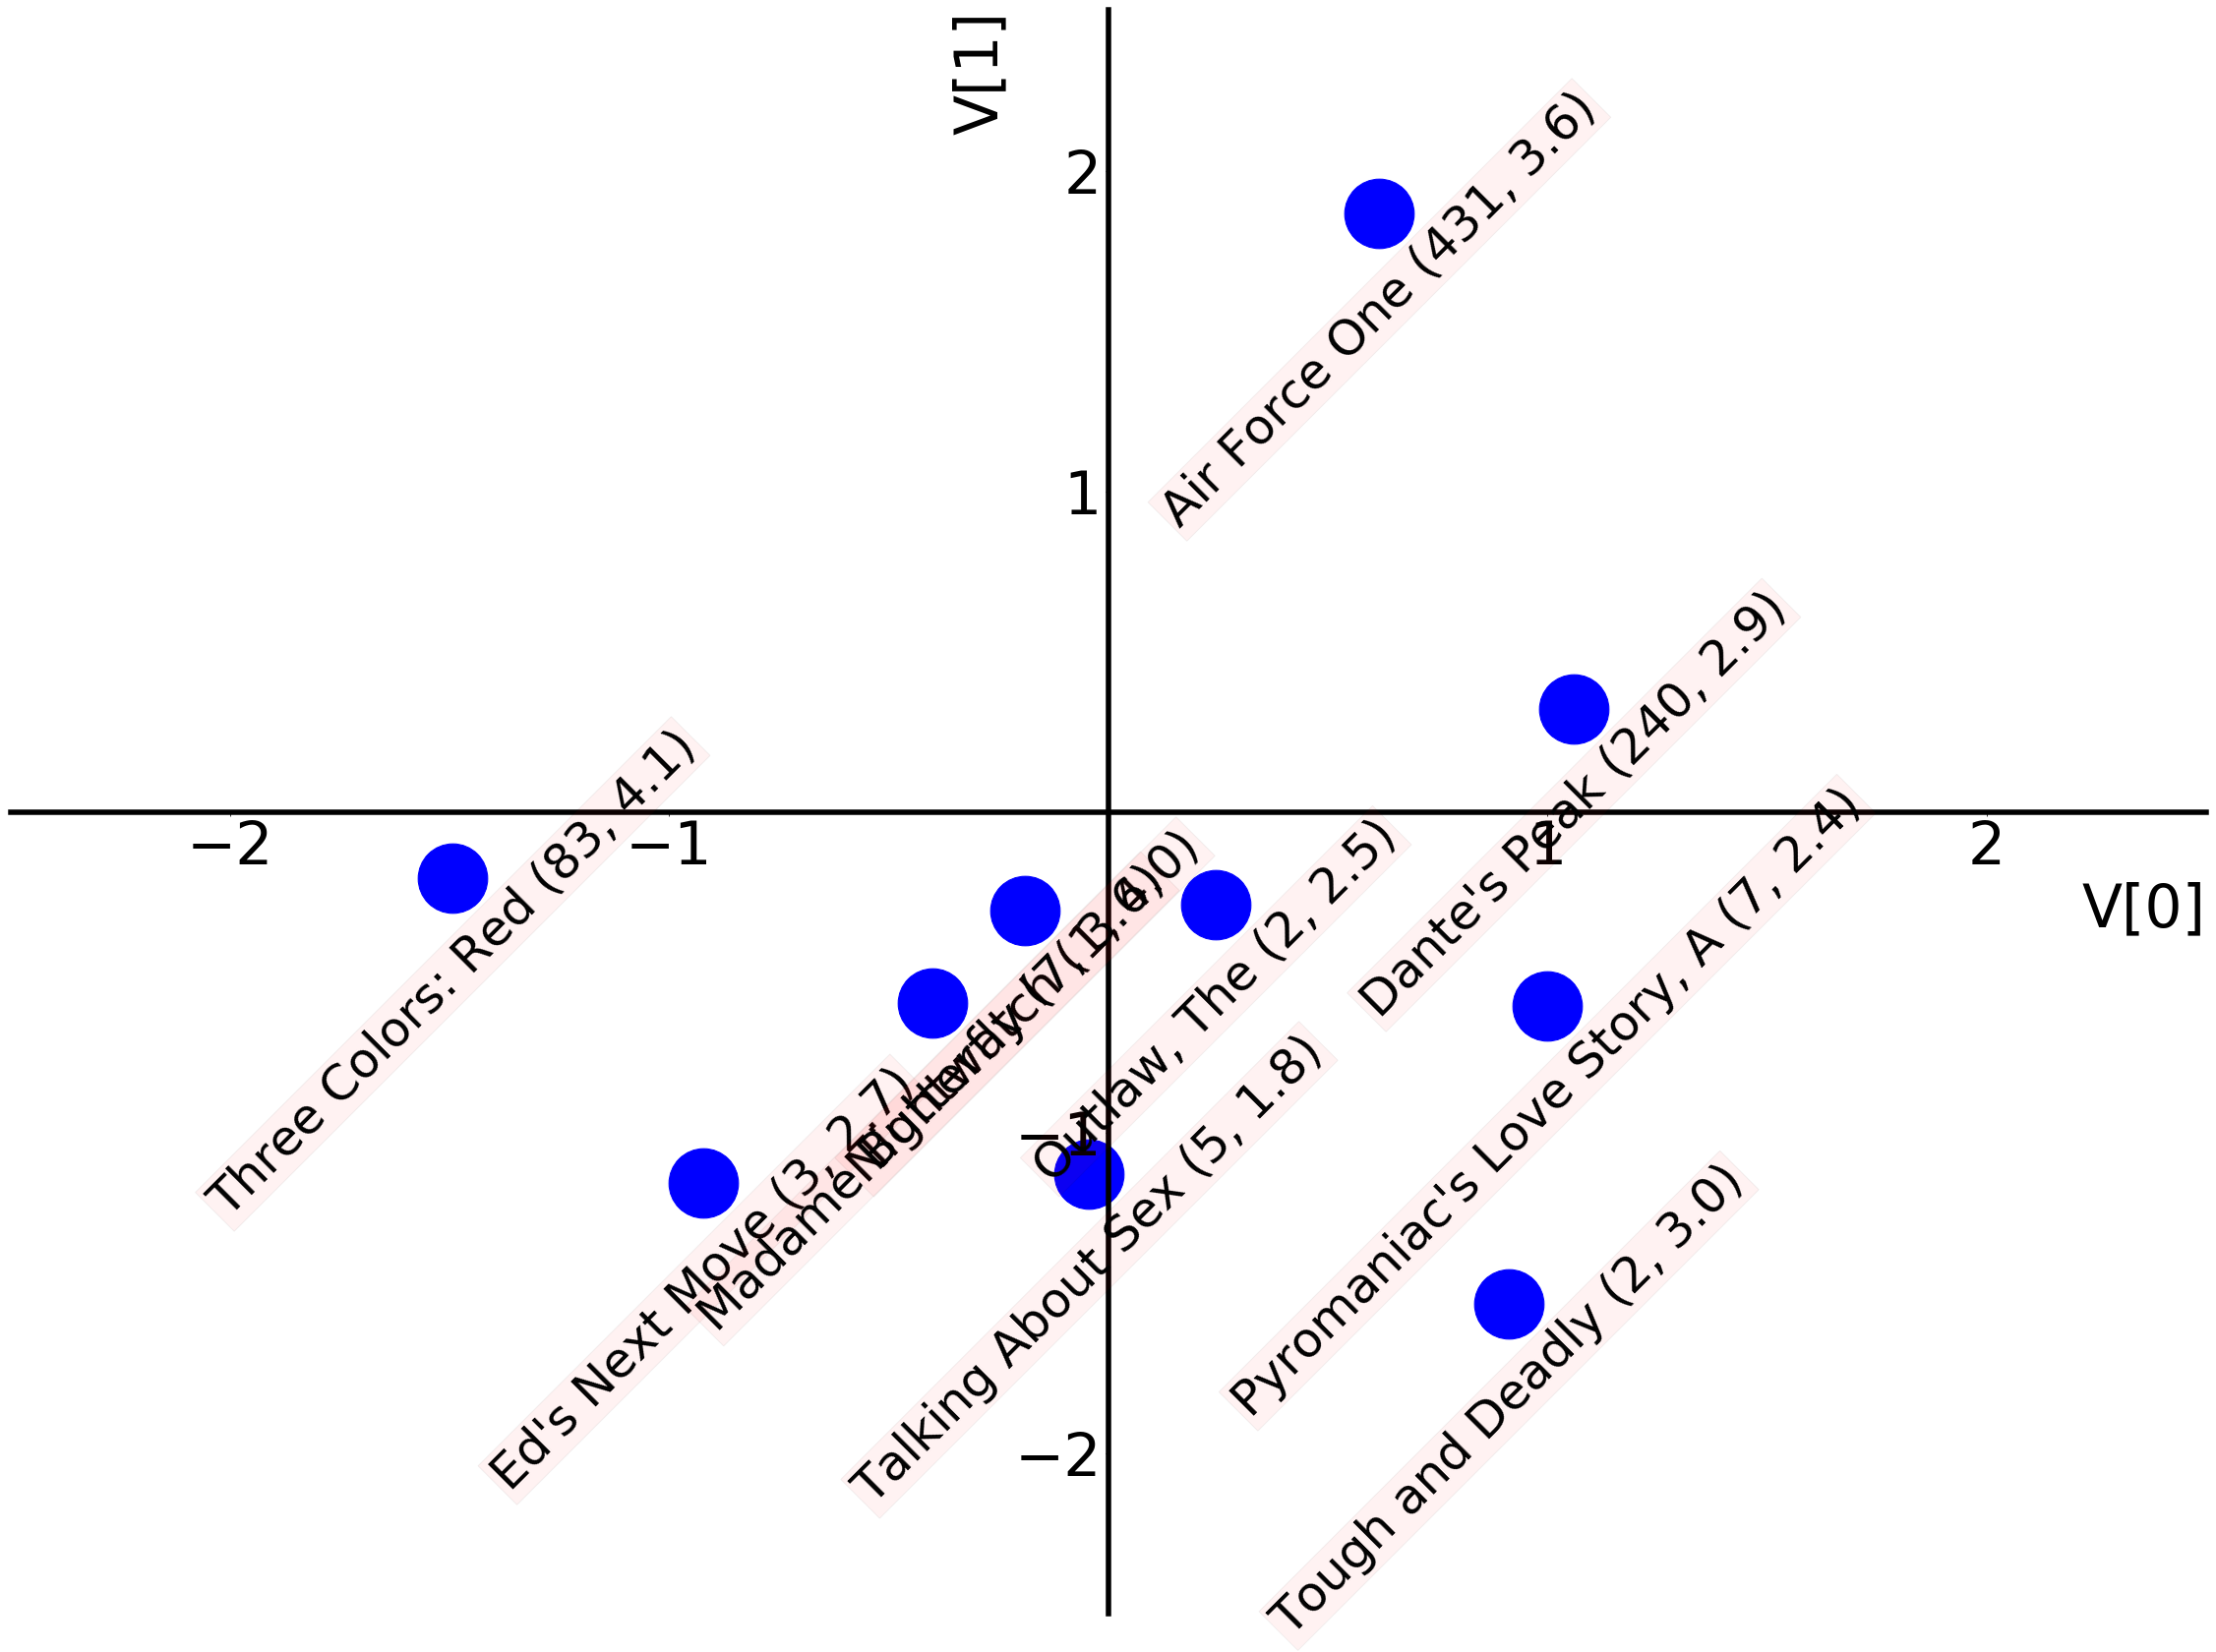

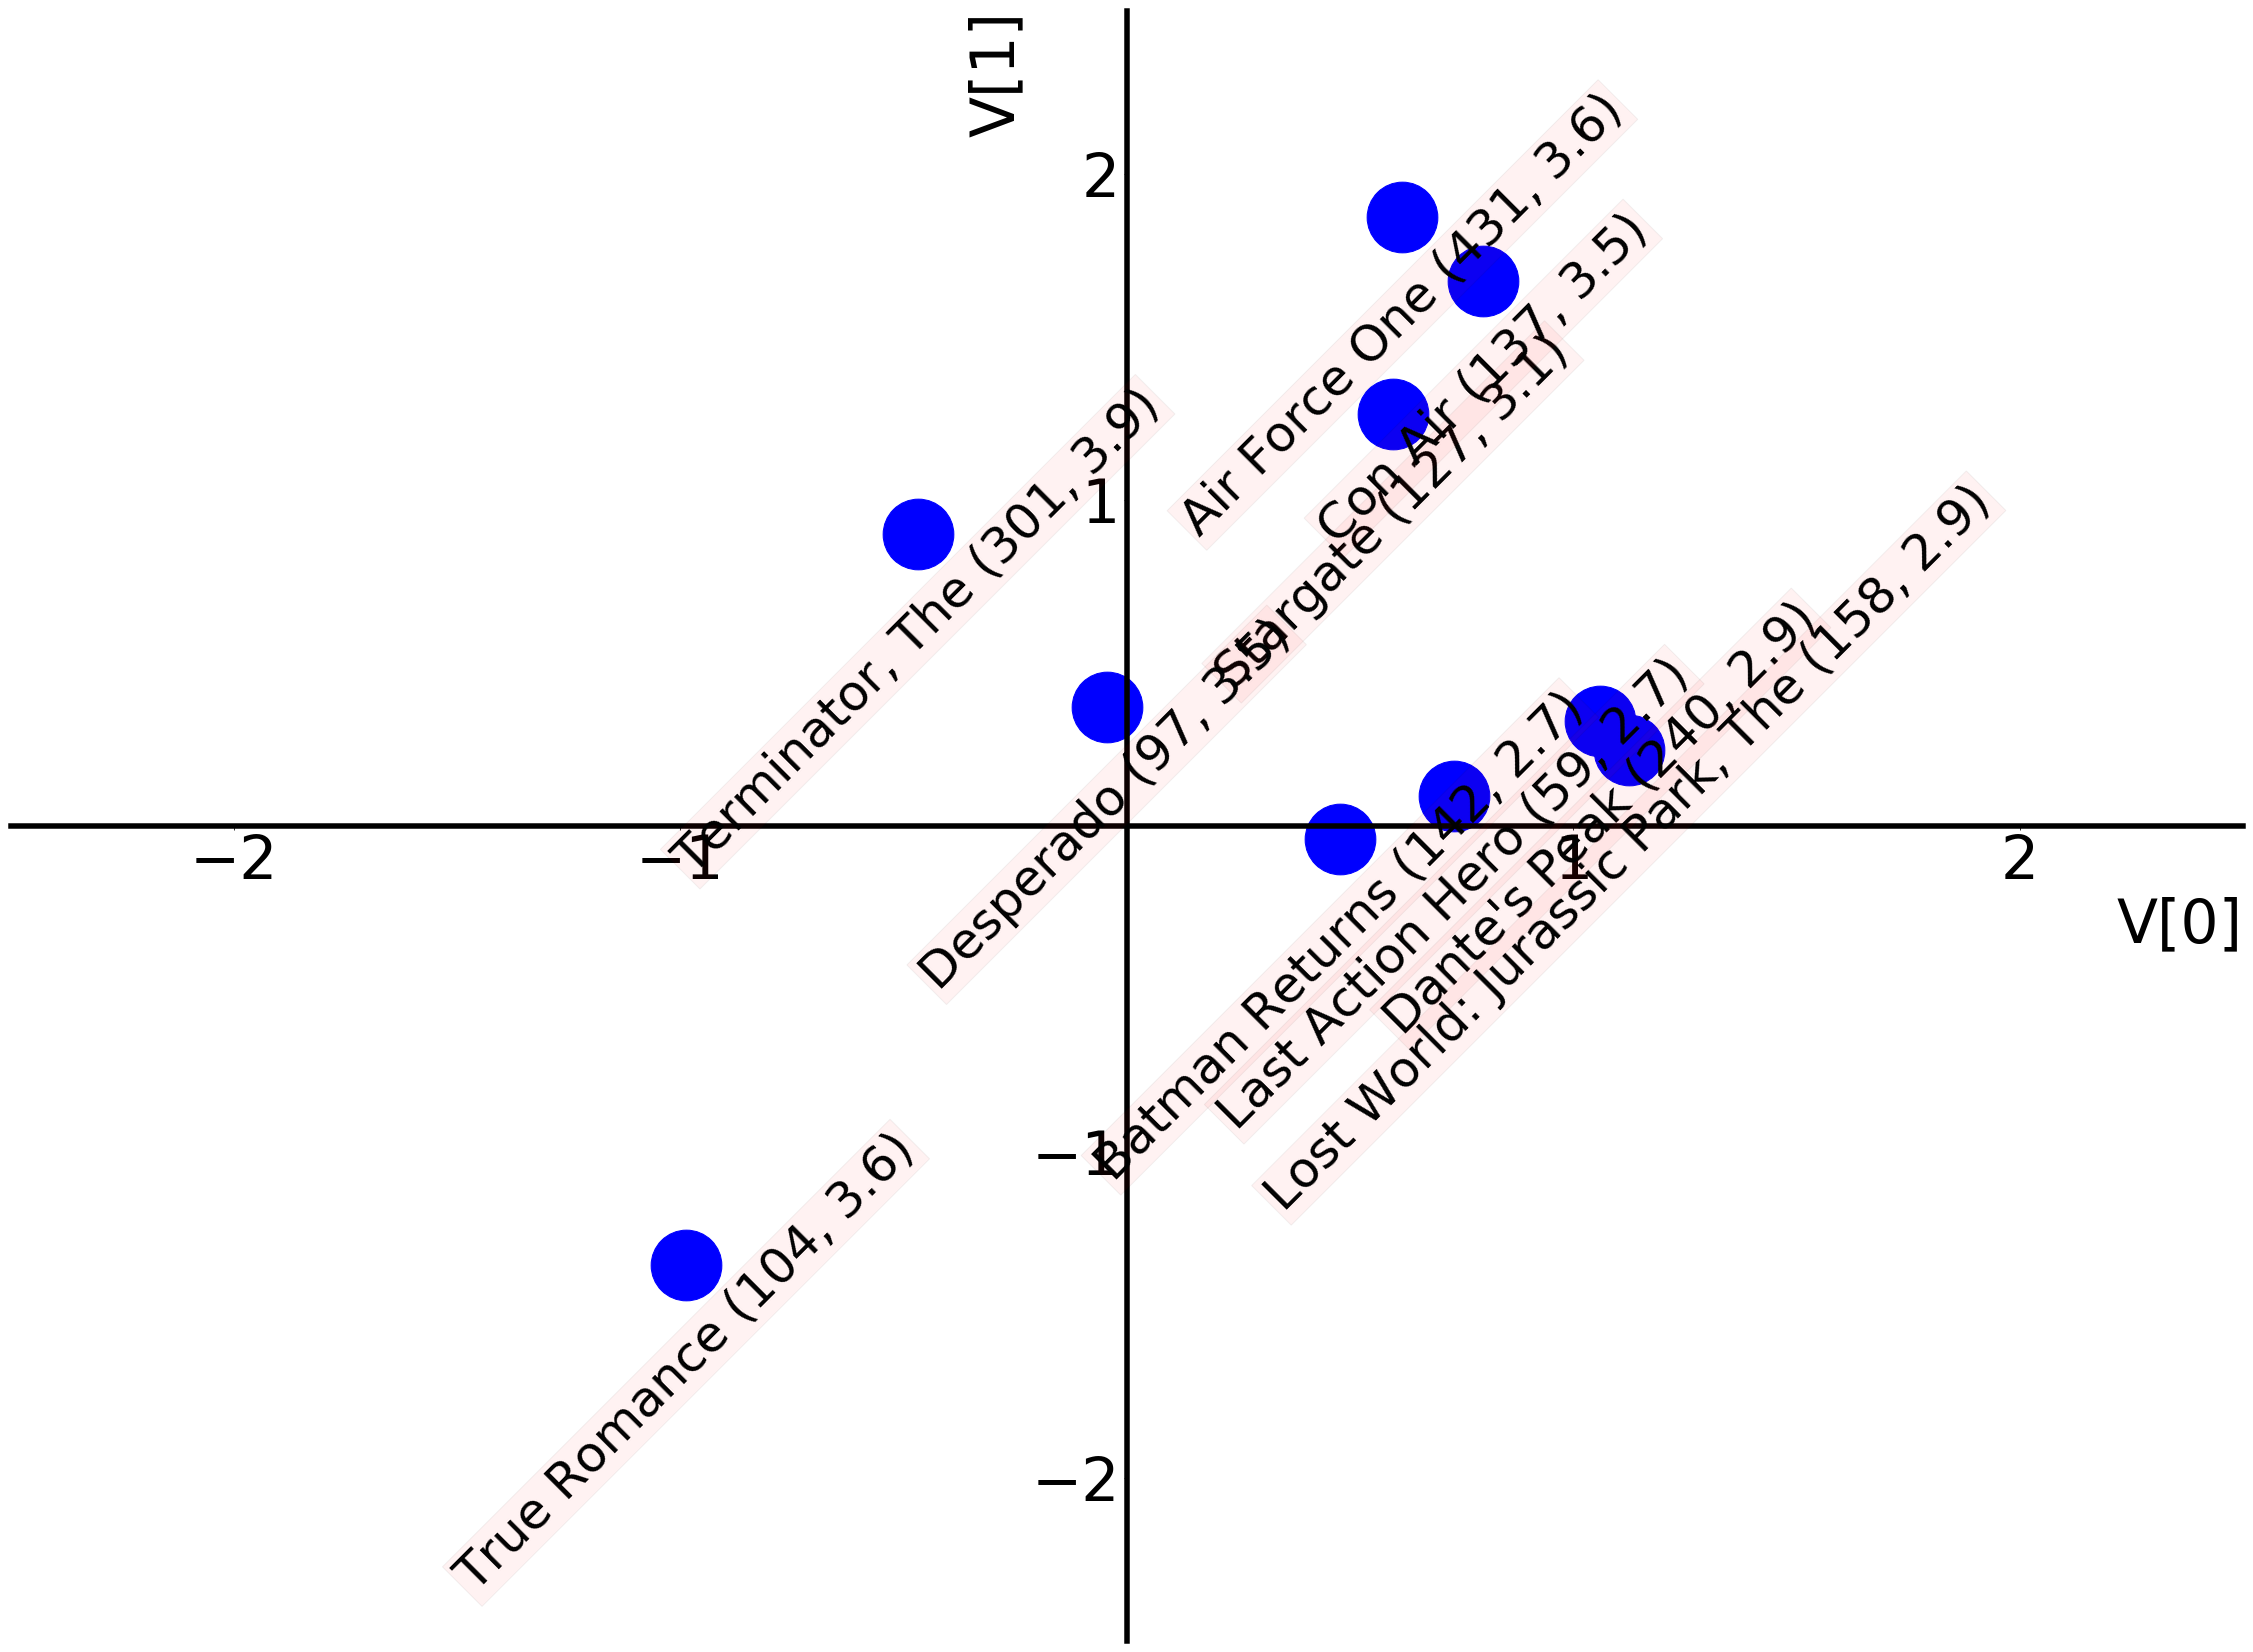

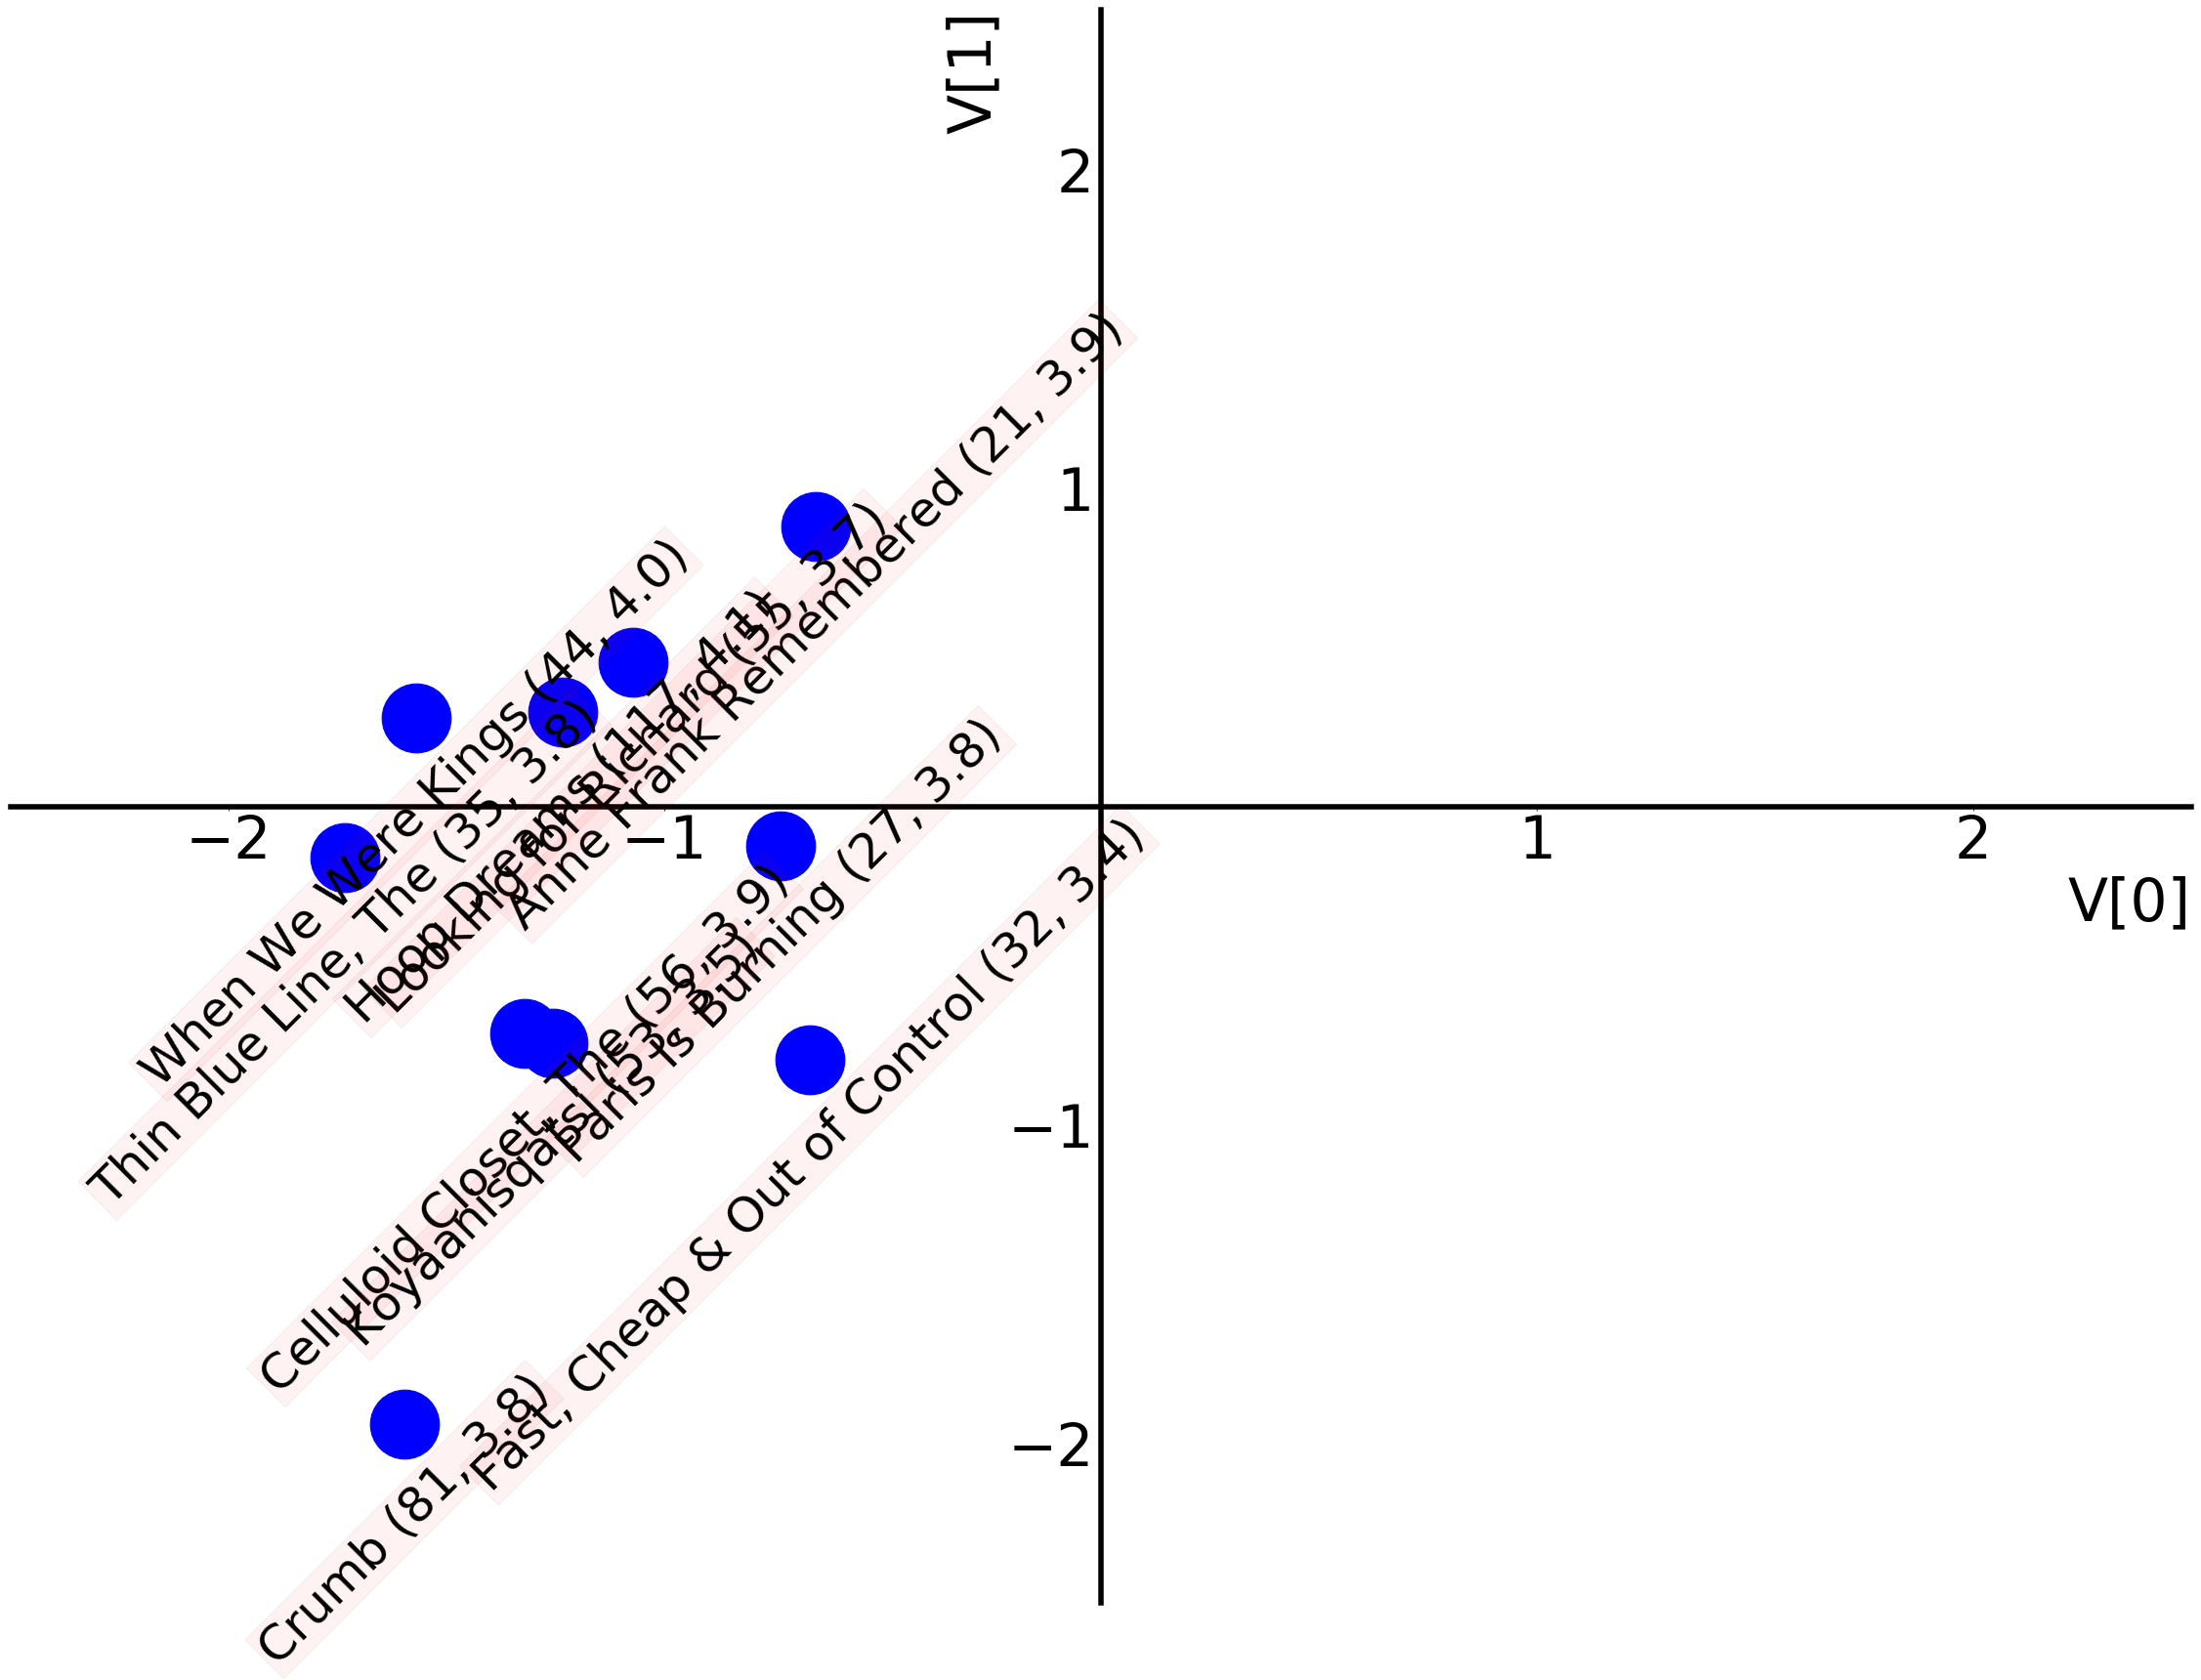

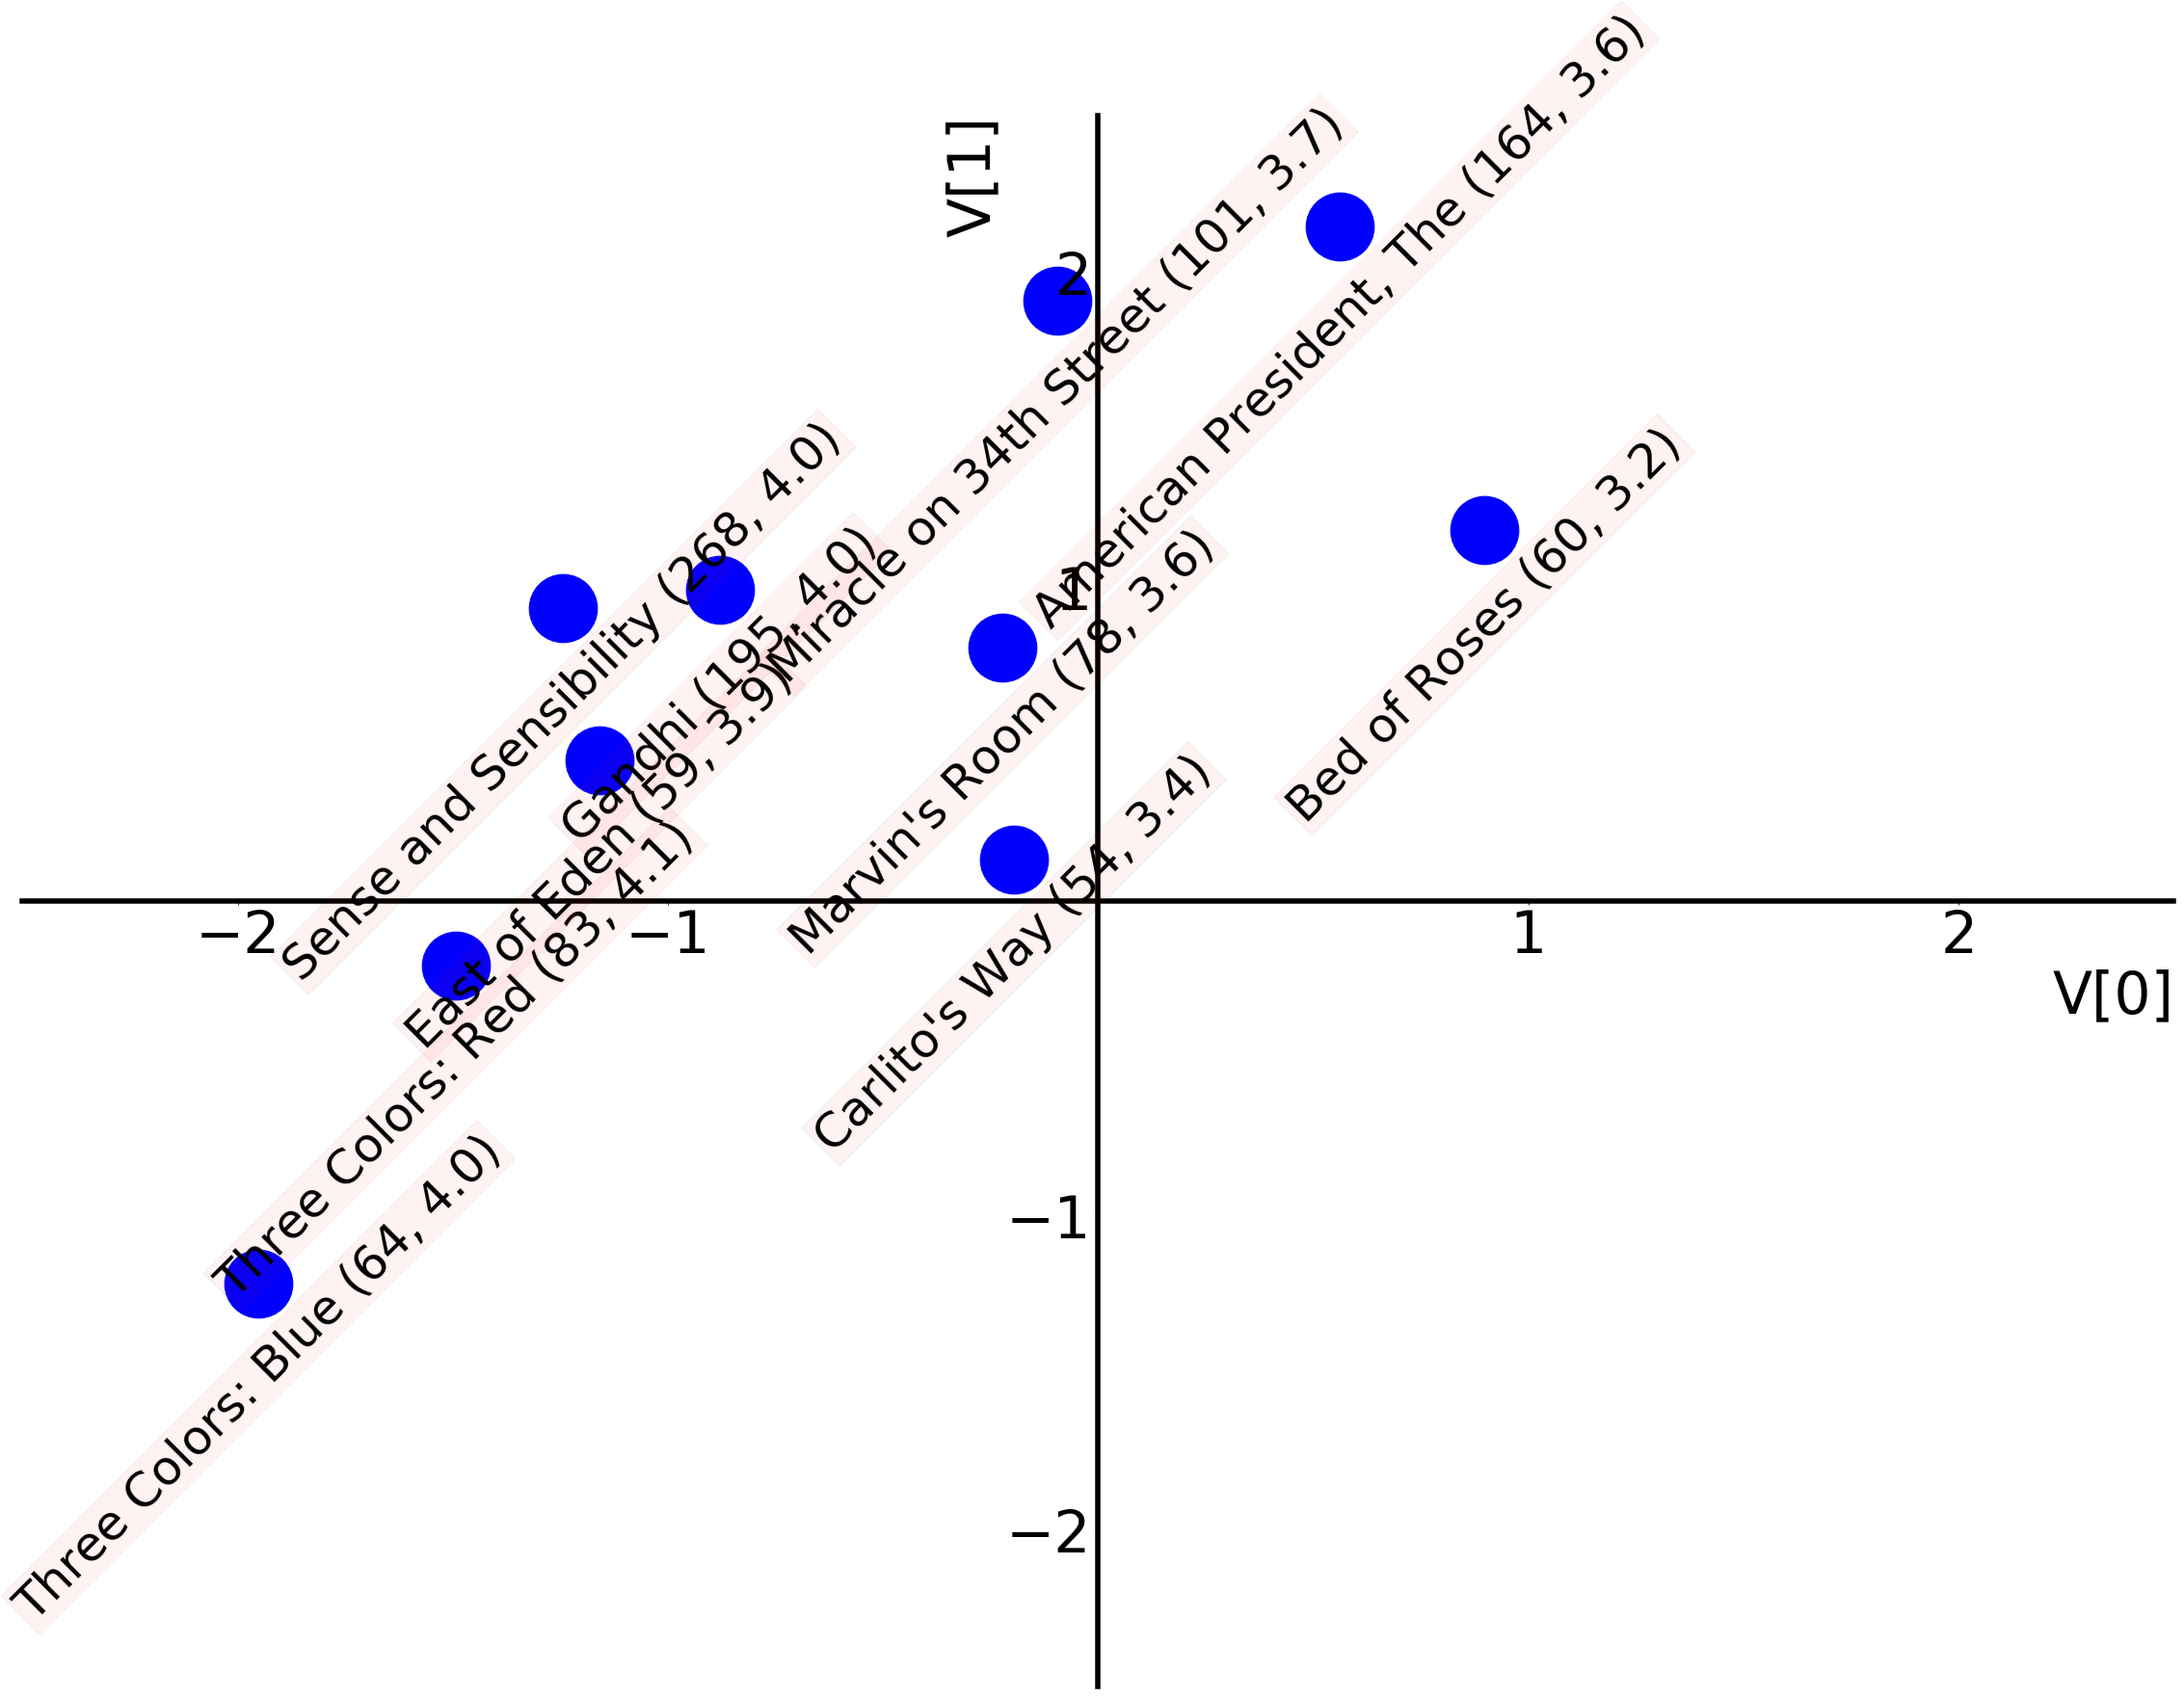

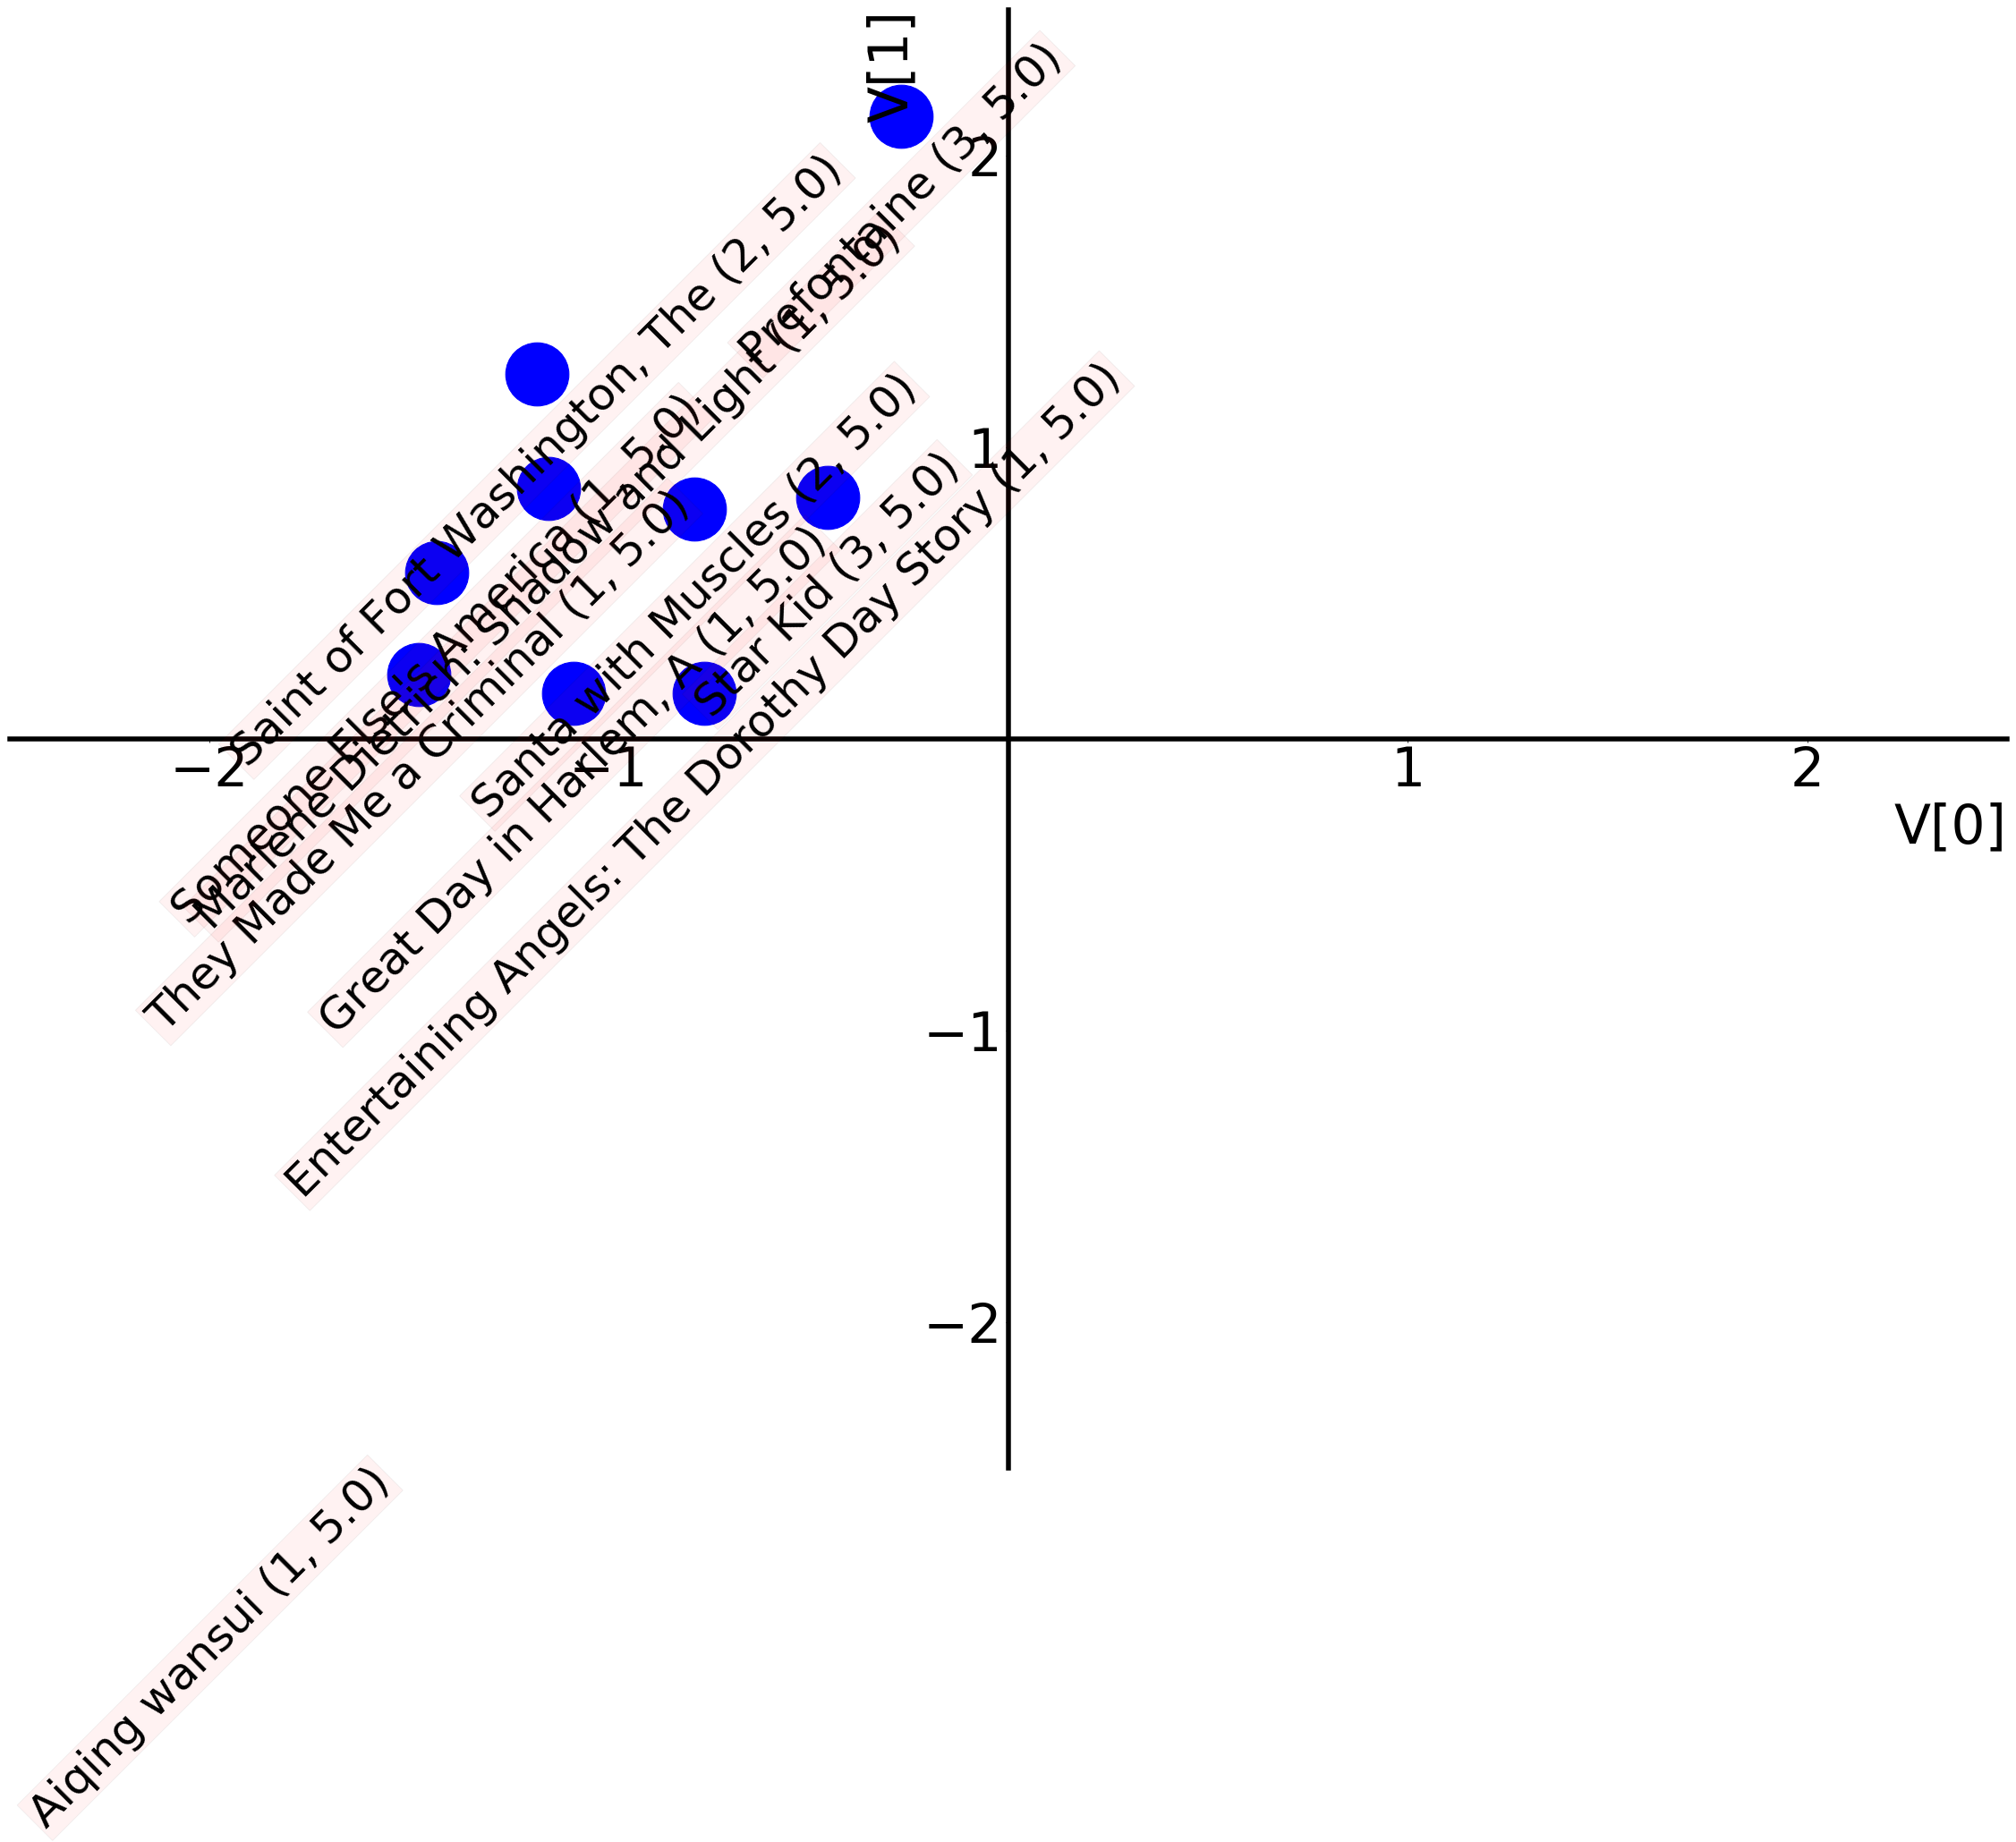

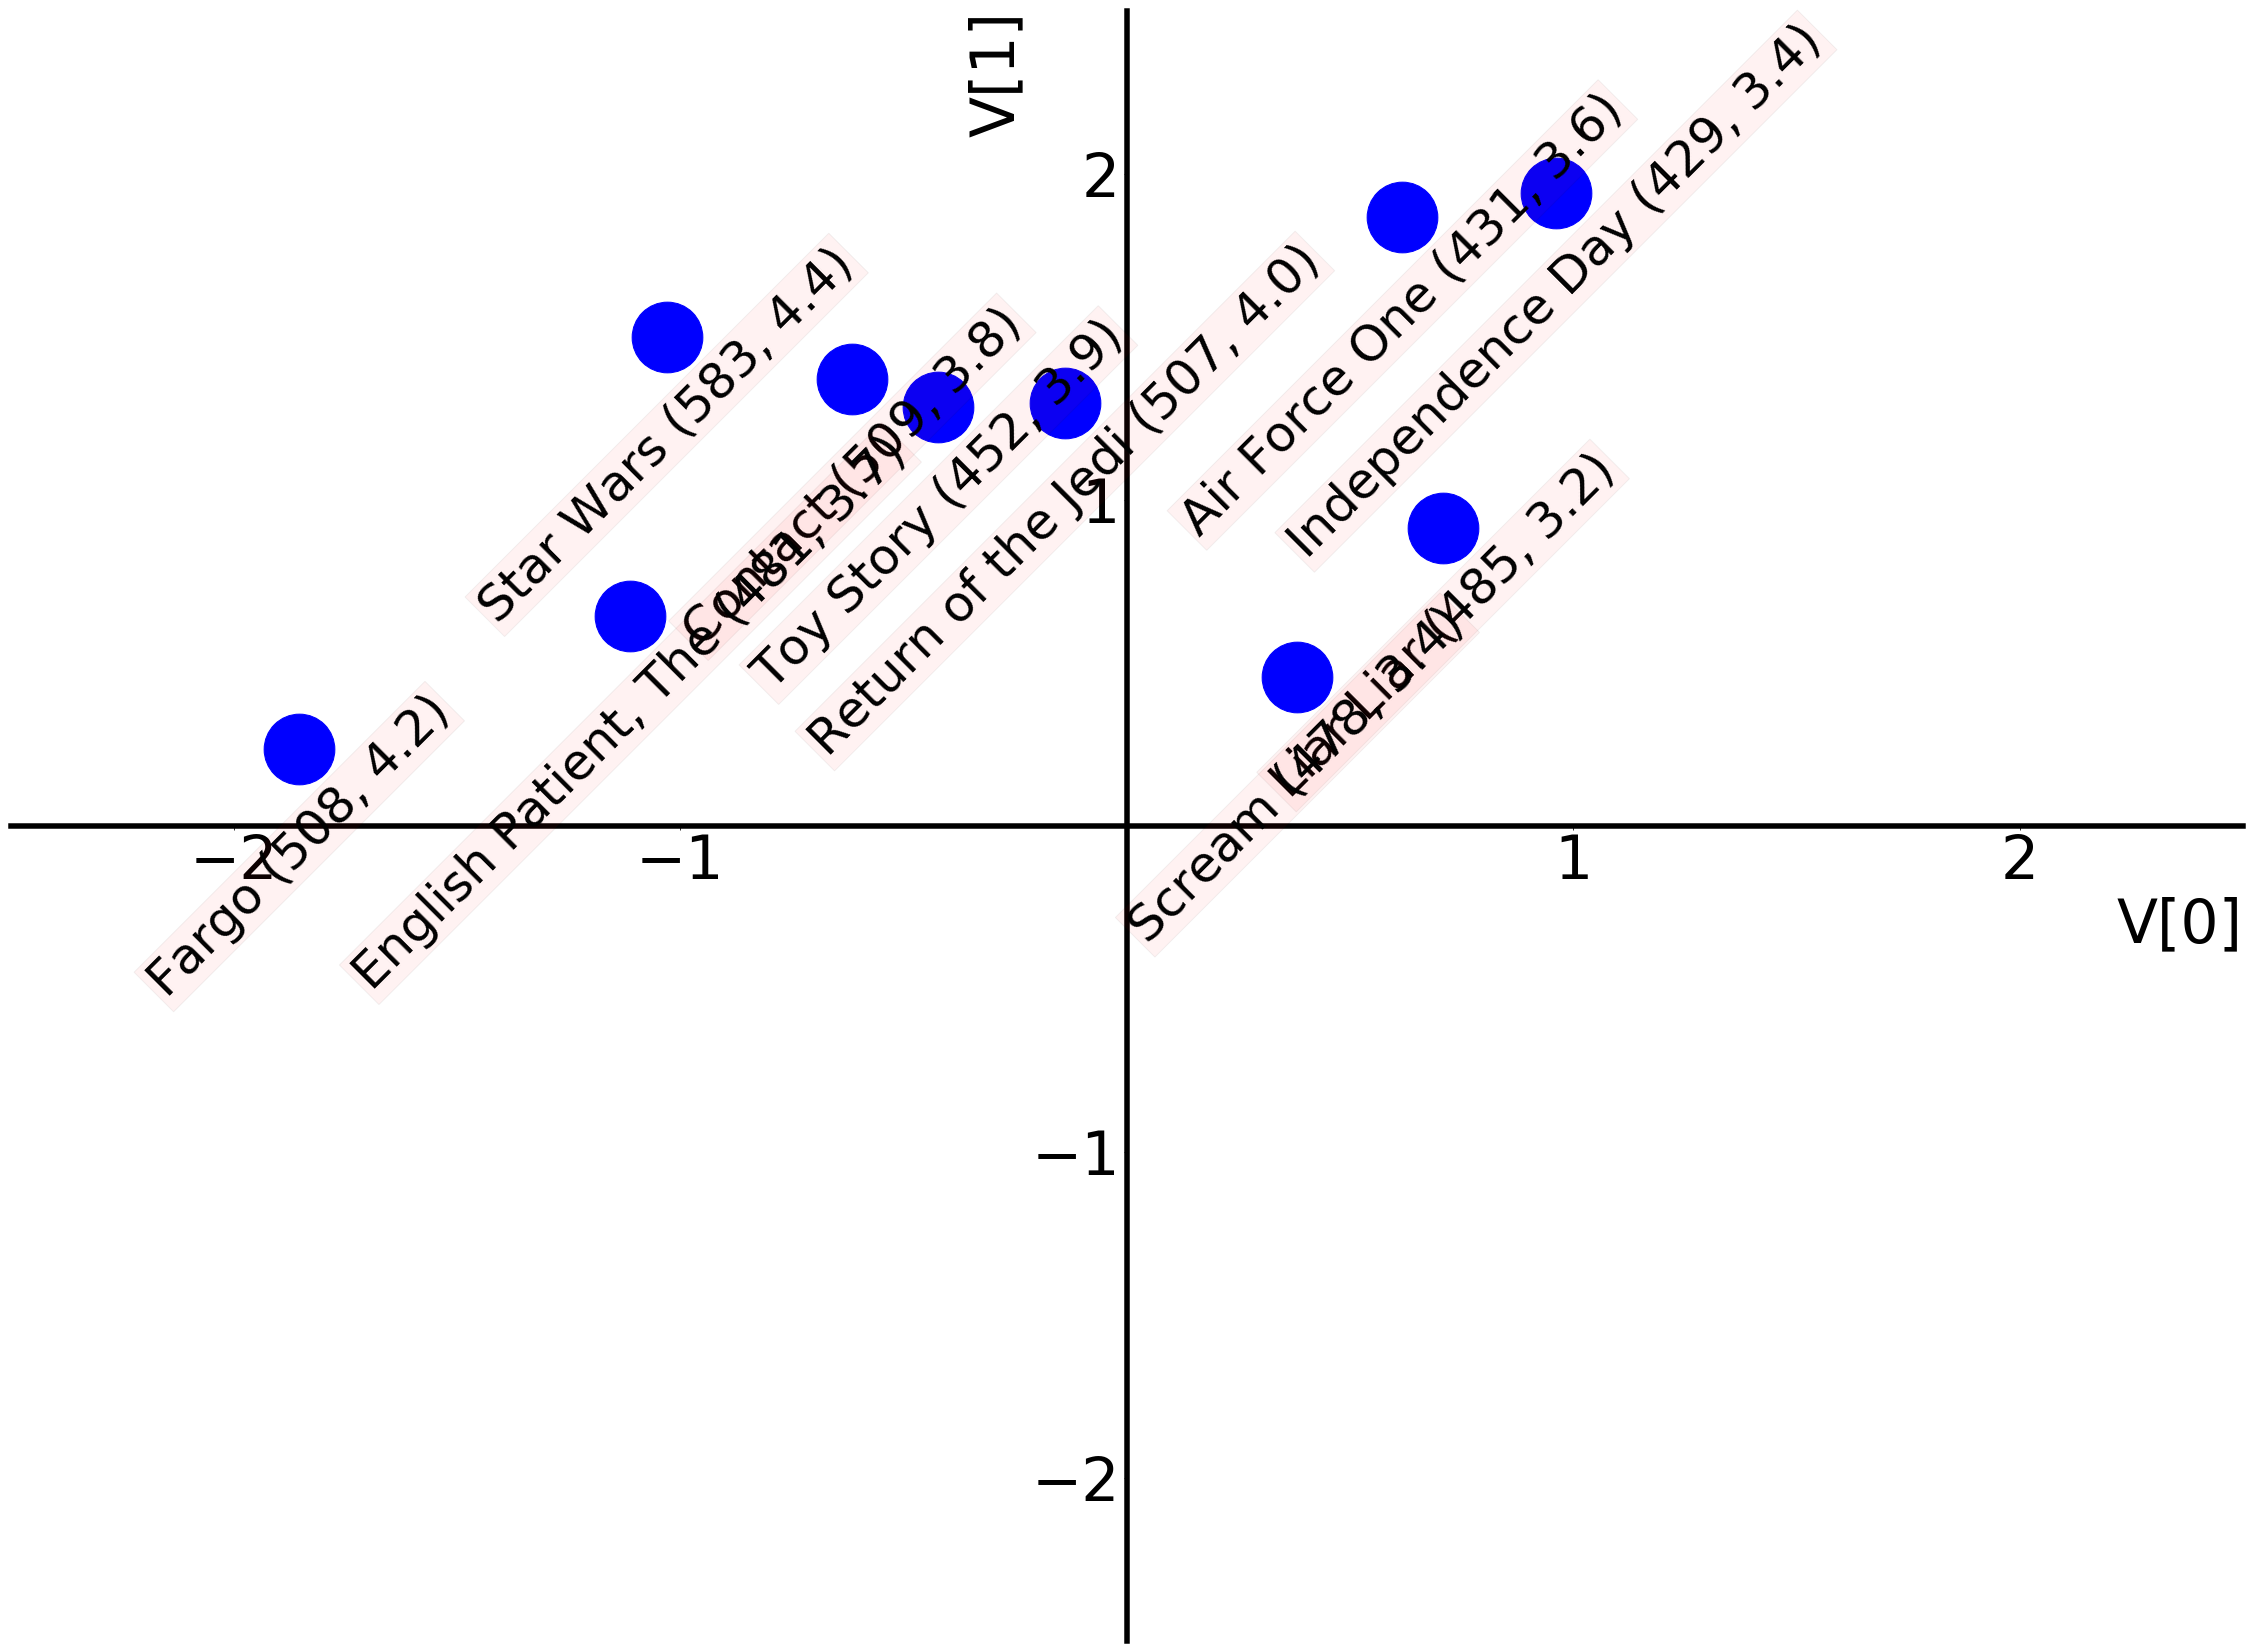

In [16]:
## perform SVD to V and get the A, Sigma, B
U_bias = UT_bias.transpose()
V_bias = VT_bias.transpose()
Vp_bias = np.zeros_like(V_bias)
V_bias_row_means = np.mean(V_bias, axis=1)
for irow in range(len(V)):
    Vp_bias[irow] = V_bias[irow] - V_bias_row_means[irow]
A_bias, S_bias, B_bias =  np.linalg.svd(Vp_bias)
A12_bias = A_bias[:,[0,1]]
A12T_bias = A12_bias.transpose()
Vtilt_bias = np.matmul(A12T_bias, V_bias)

## visualize the movies of choices
visualize_V(Vtilt_bias, id_random10, name_random10, 'visualize_V_bias_random10movies')
visualize_V(Vtilt_bias, id_random10_action, name_random10_action, 'visualize_V_bias_random10movies_action')
visualize_V(Vtilt_bias, id_random10_documentary, name_random10_documentary, 'visualize_V_bias_random10movies_documentary')
visualize_V(Vtilt_bias, id_random10_drama, name_random10_drama, 'visualize_V_bias_random10movies_drama')
visualize_V(Vtilt_bias, id_best_10, name_best_10, 'visualize_V_bias_best10movies')
visualize_V(Vtilt_bias, id_most_popular_10, name_most_popular_10, 'visualize_V_bias_mostpopular10movies')

## additional visualization: average V[0] and V[1] for certain types of movies

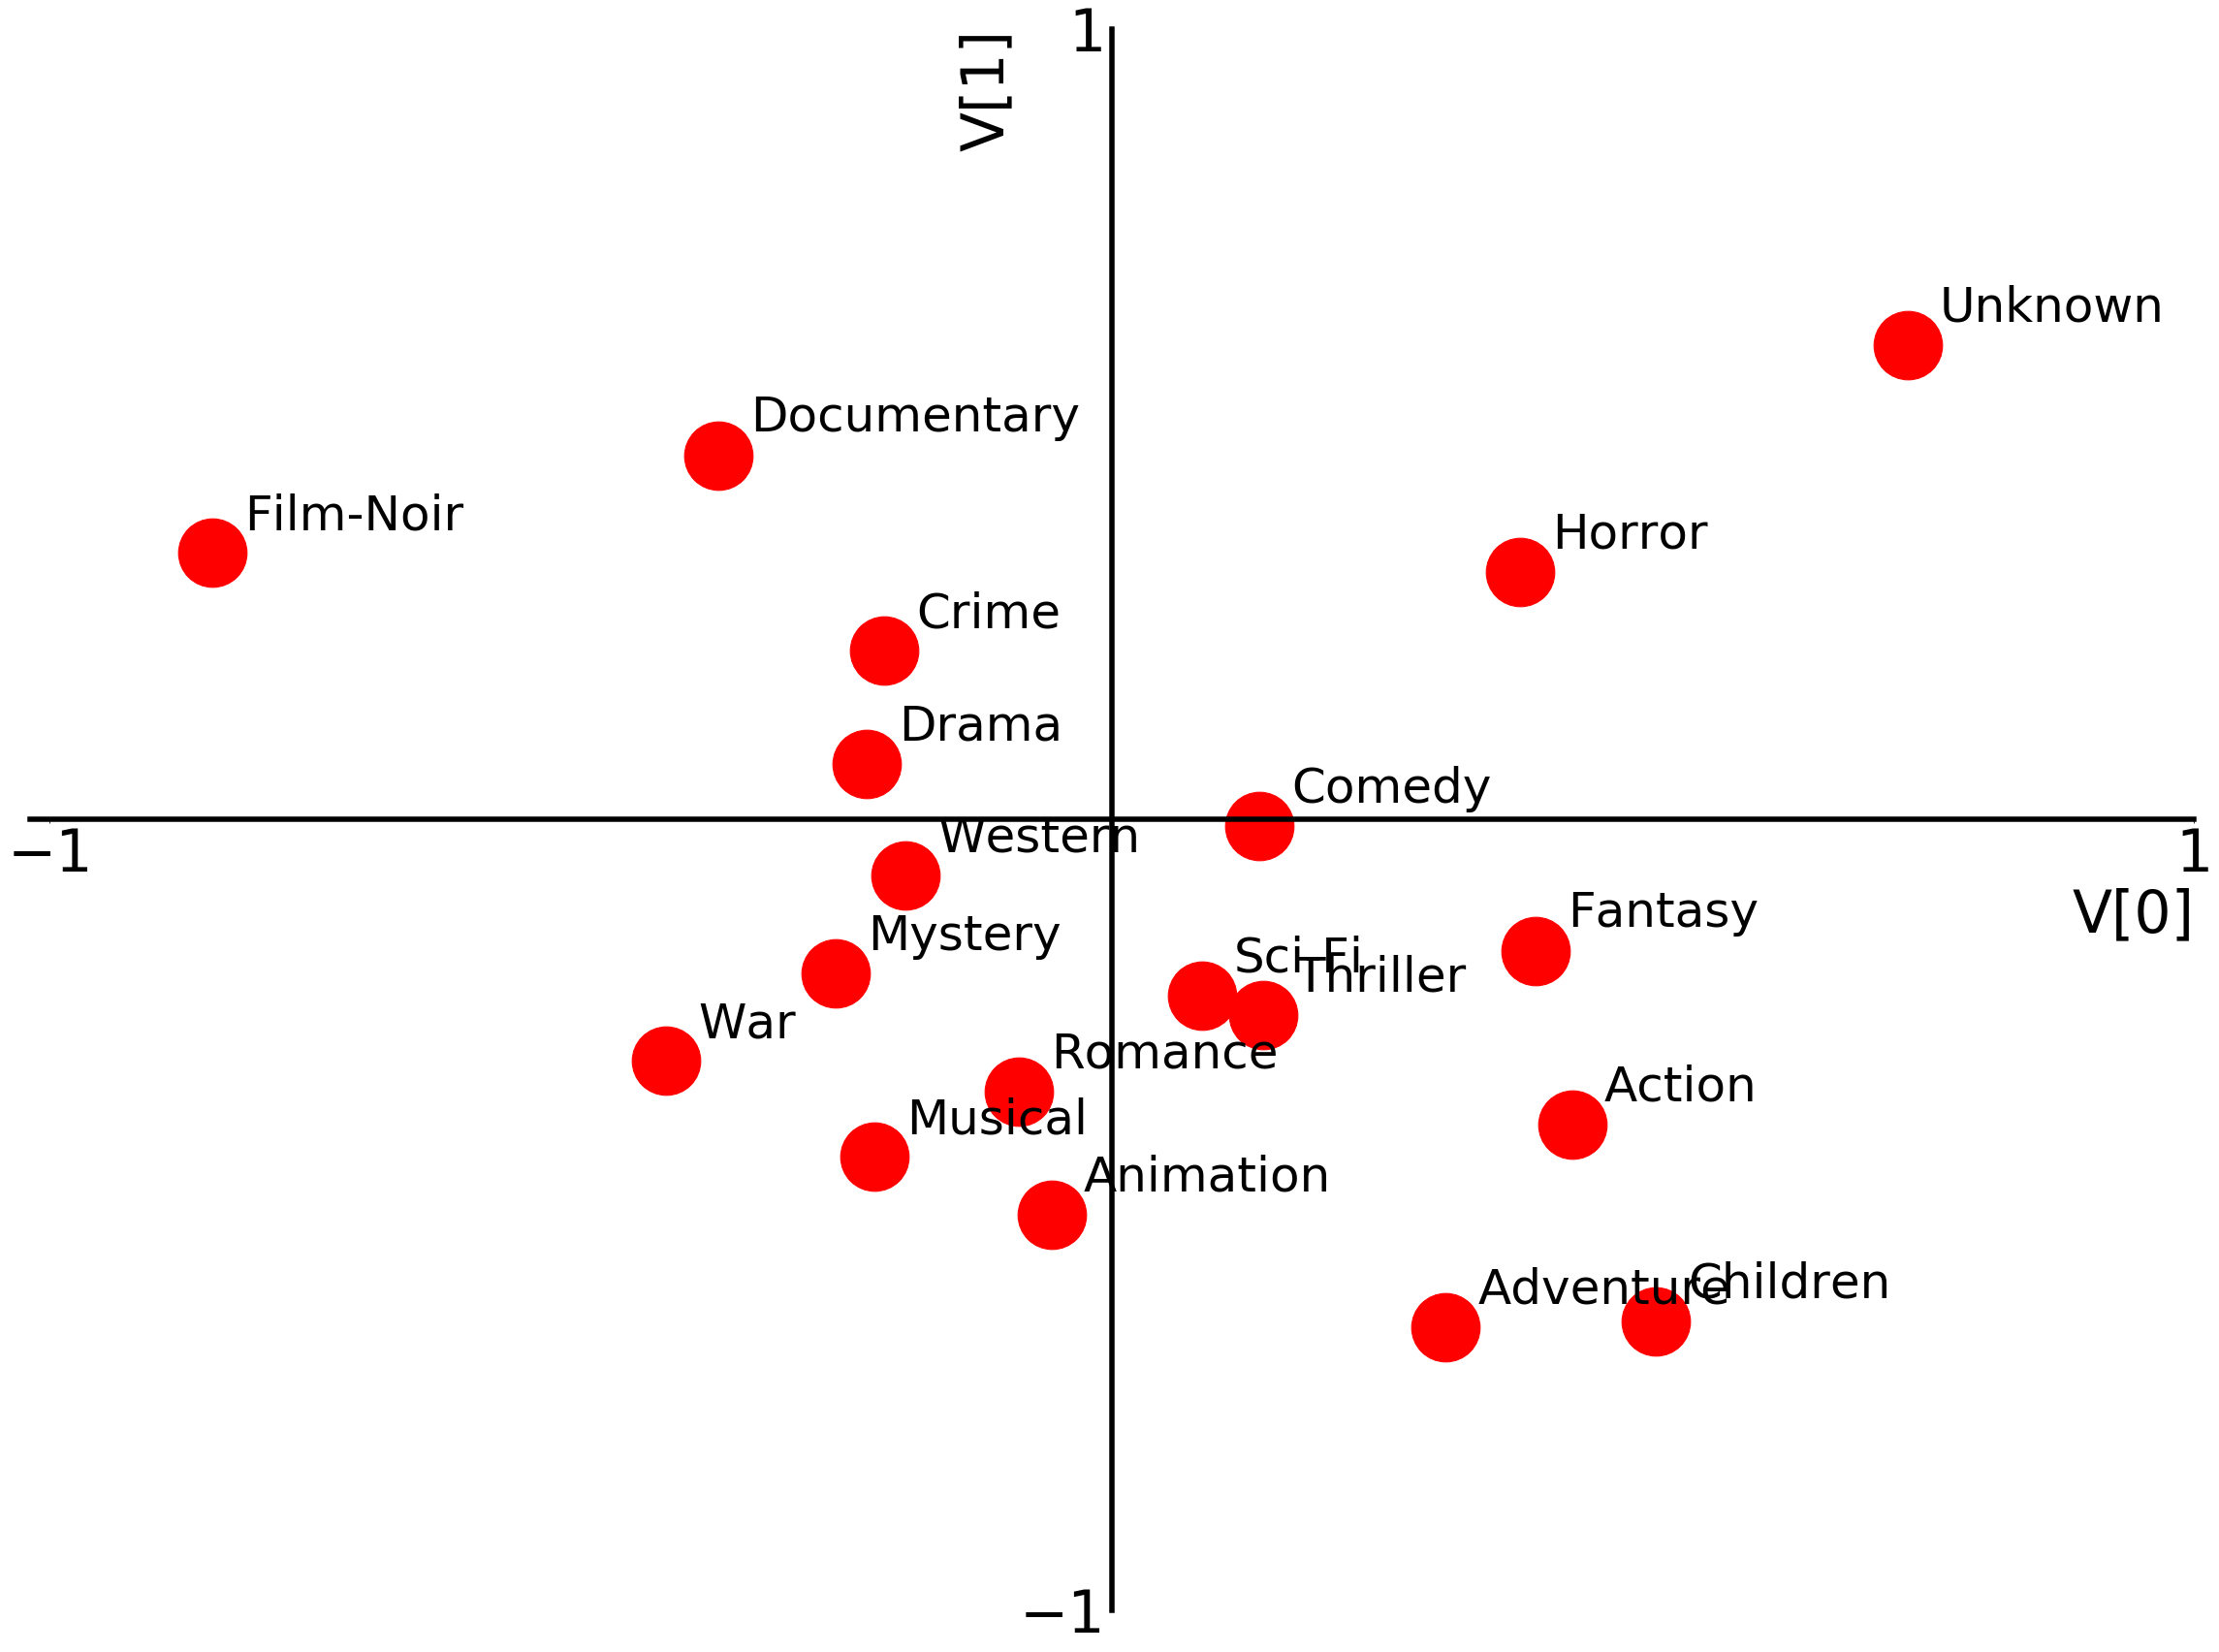

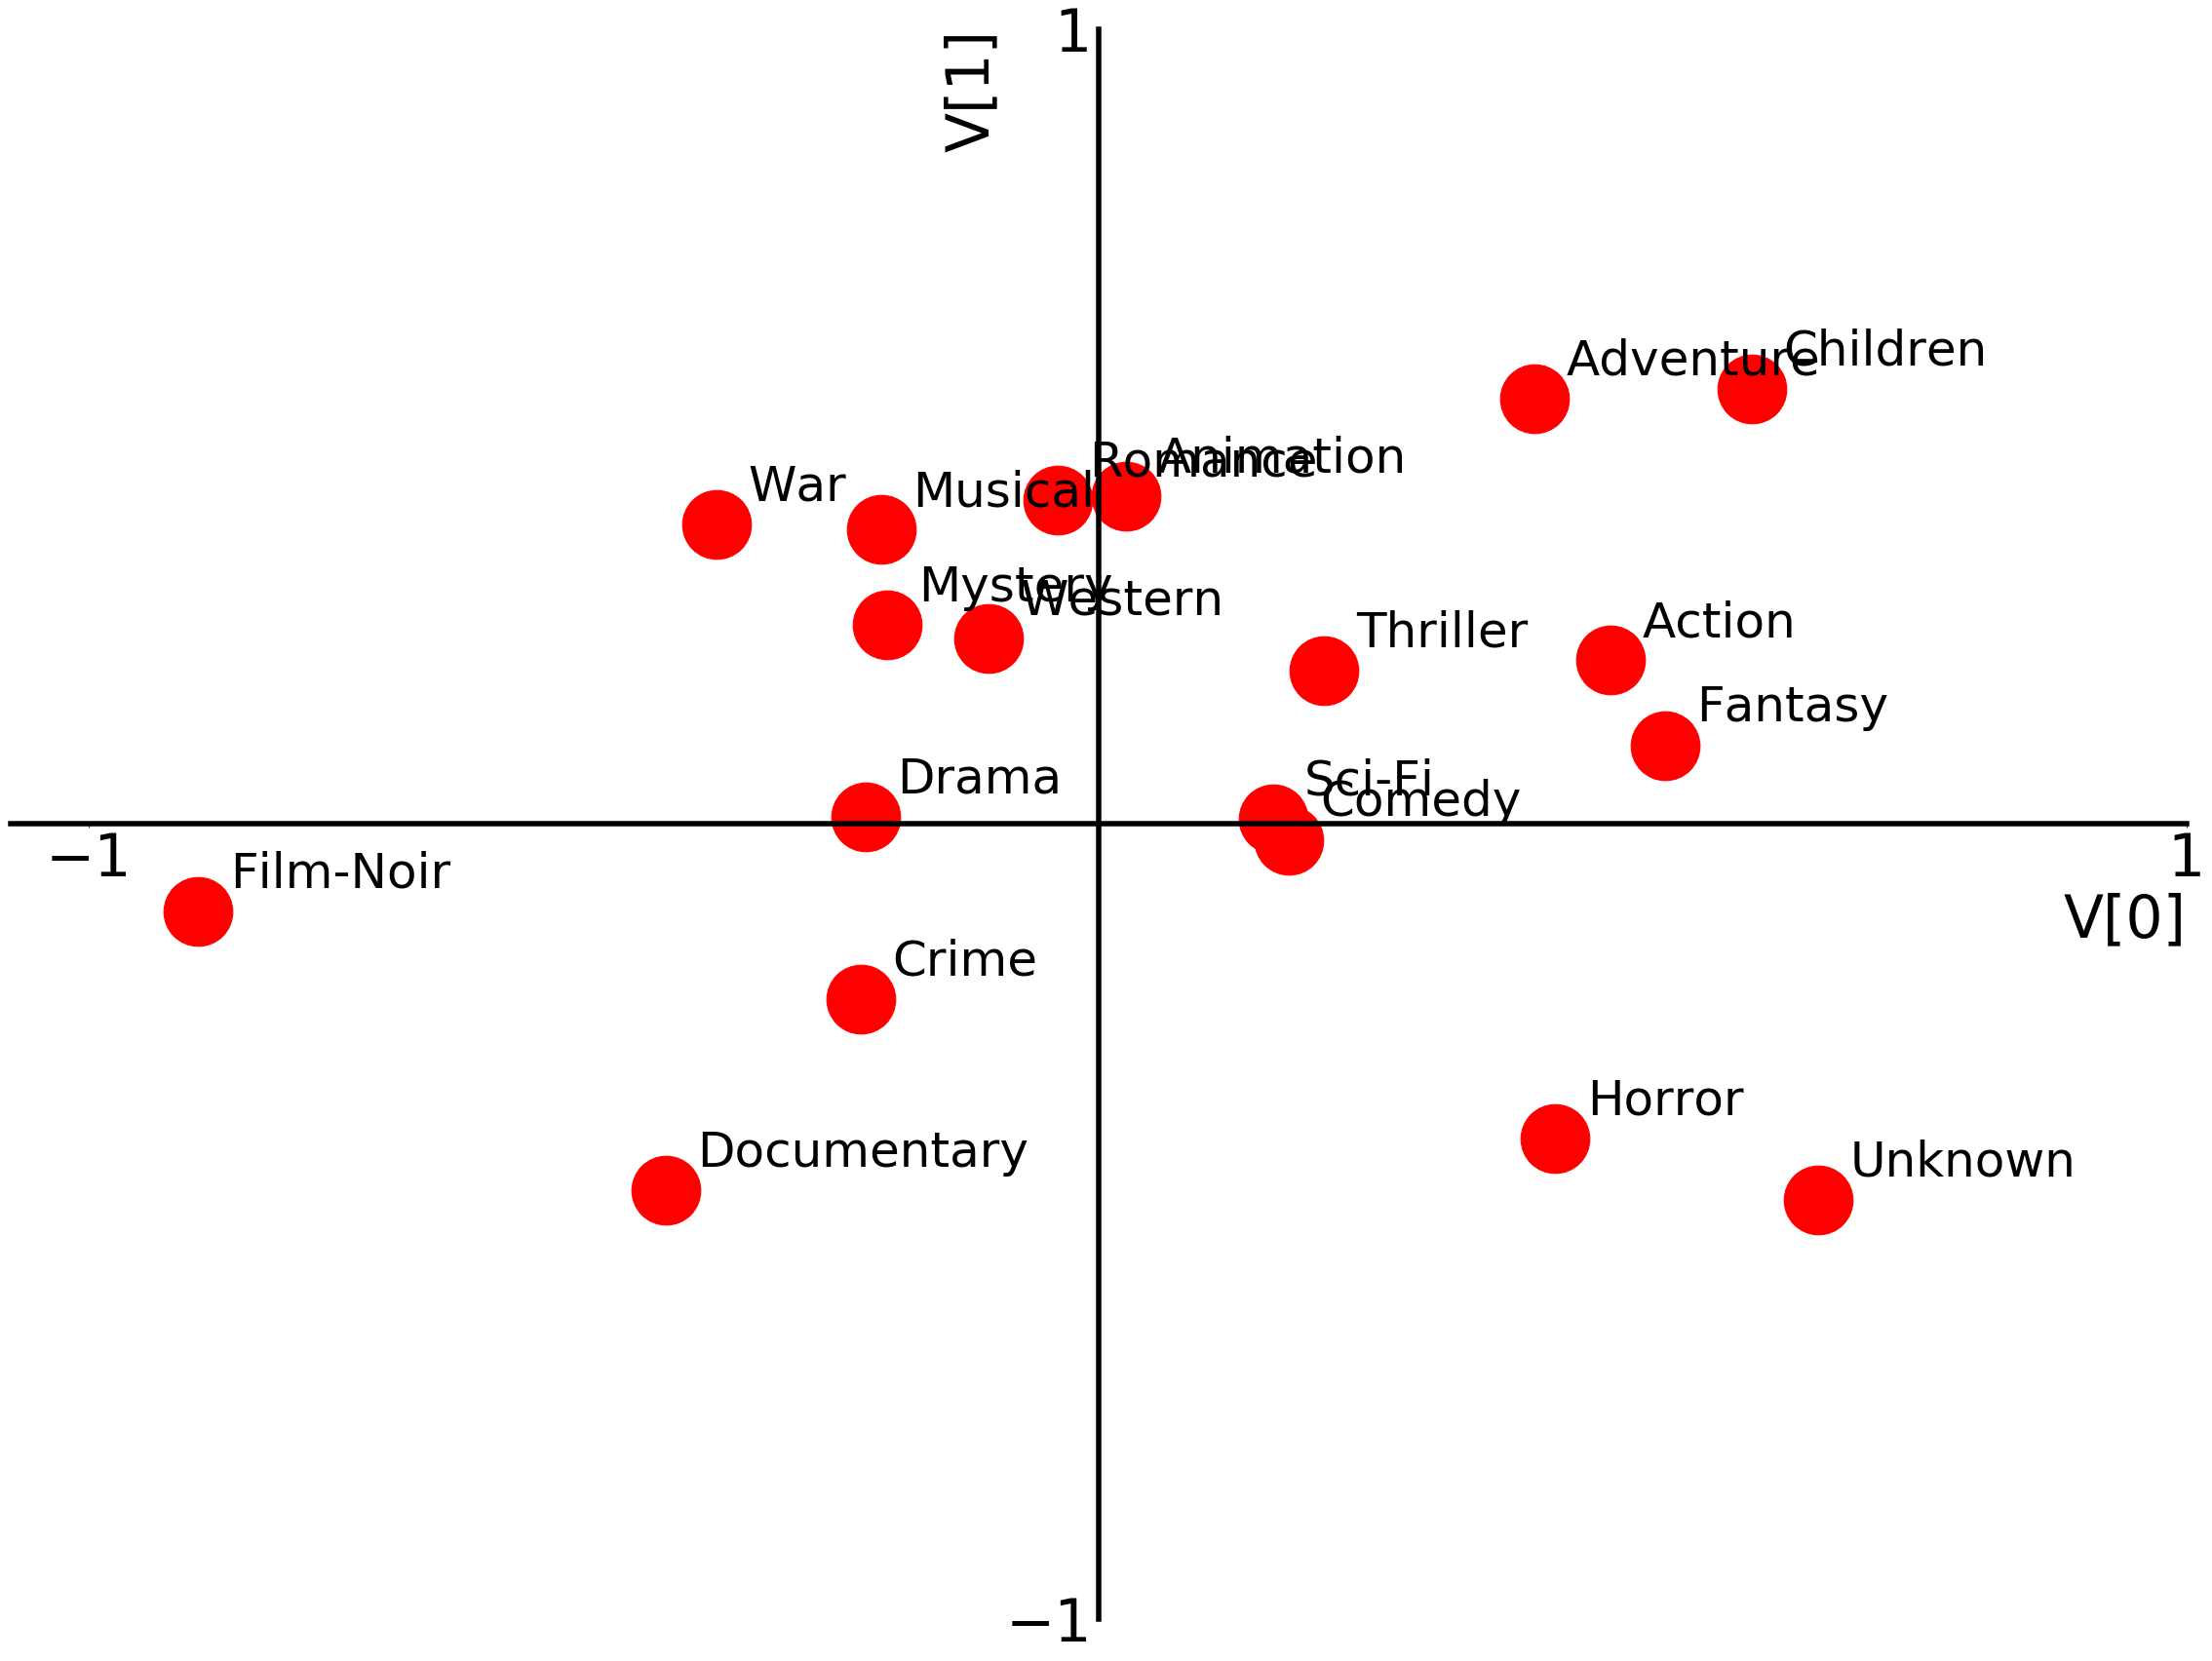

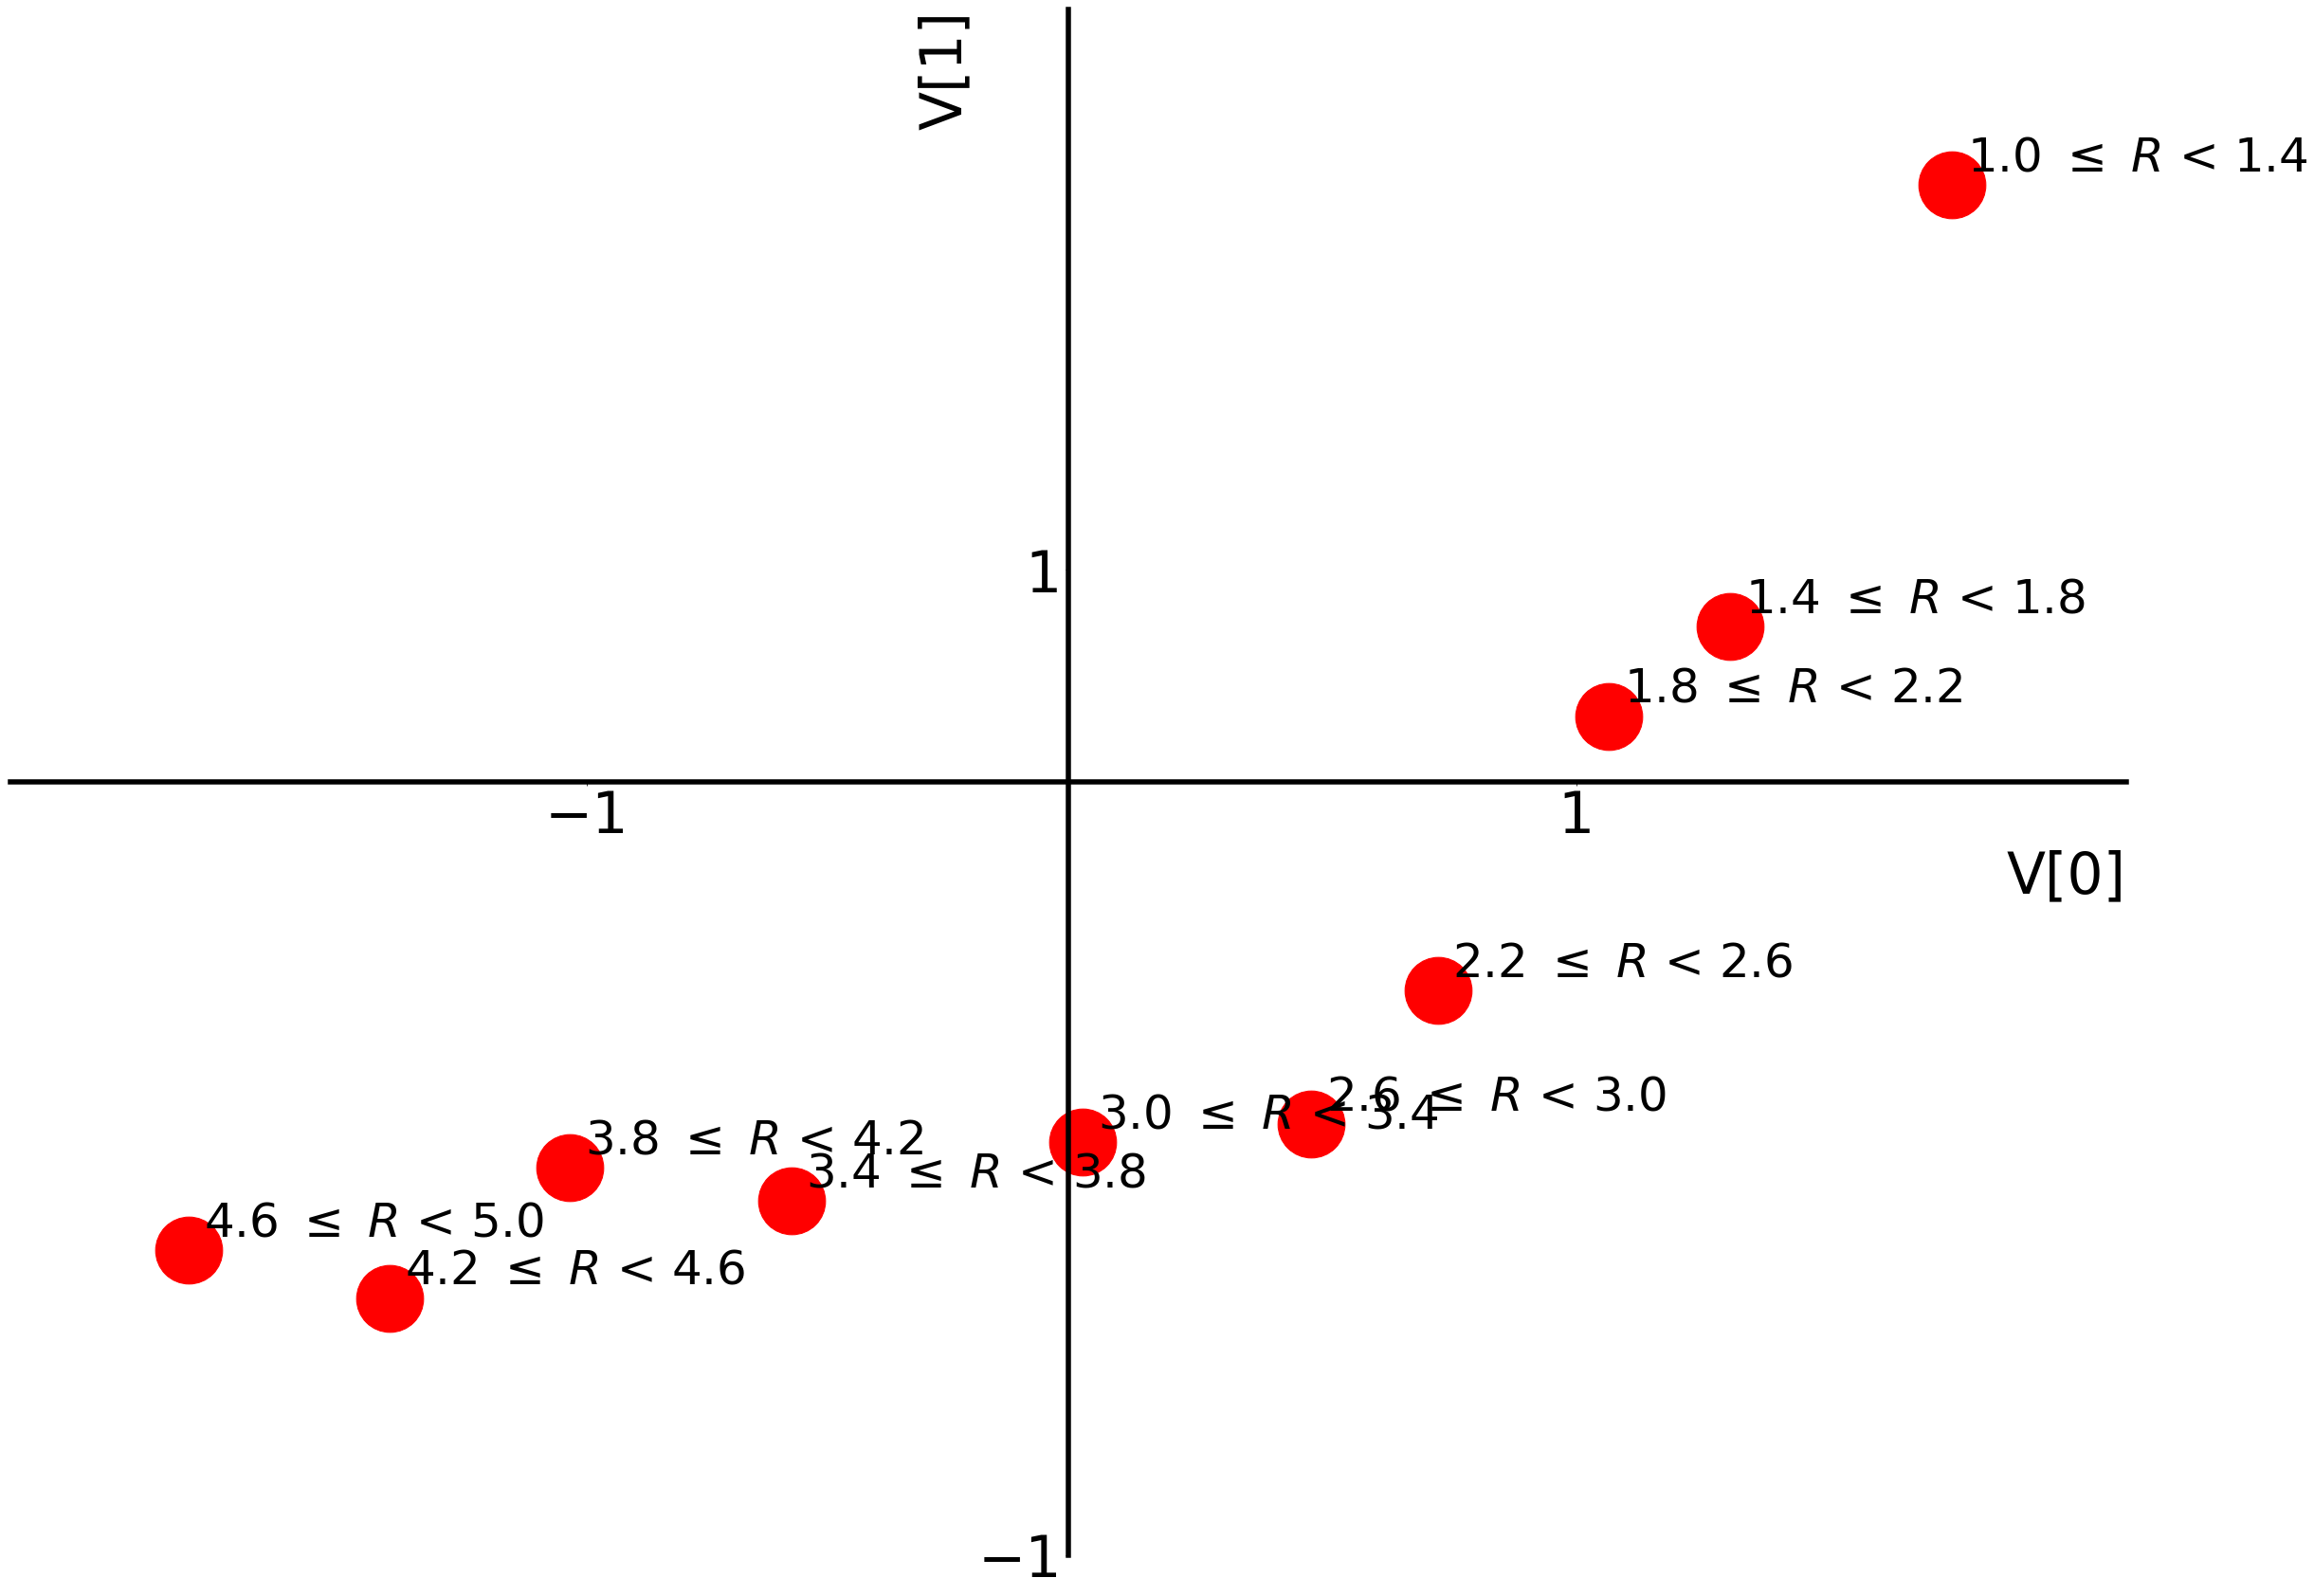

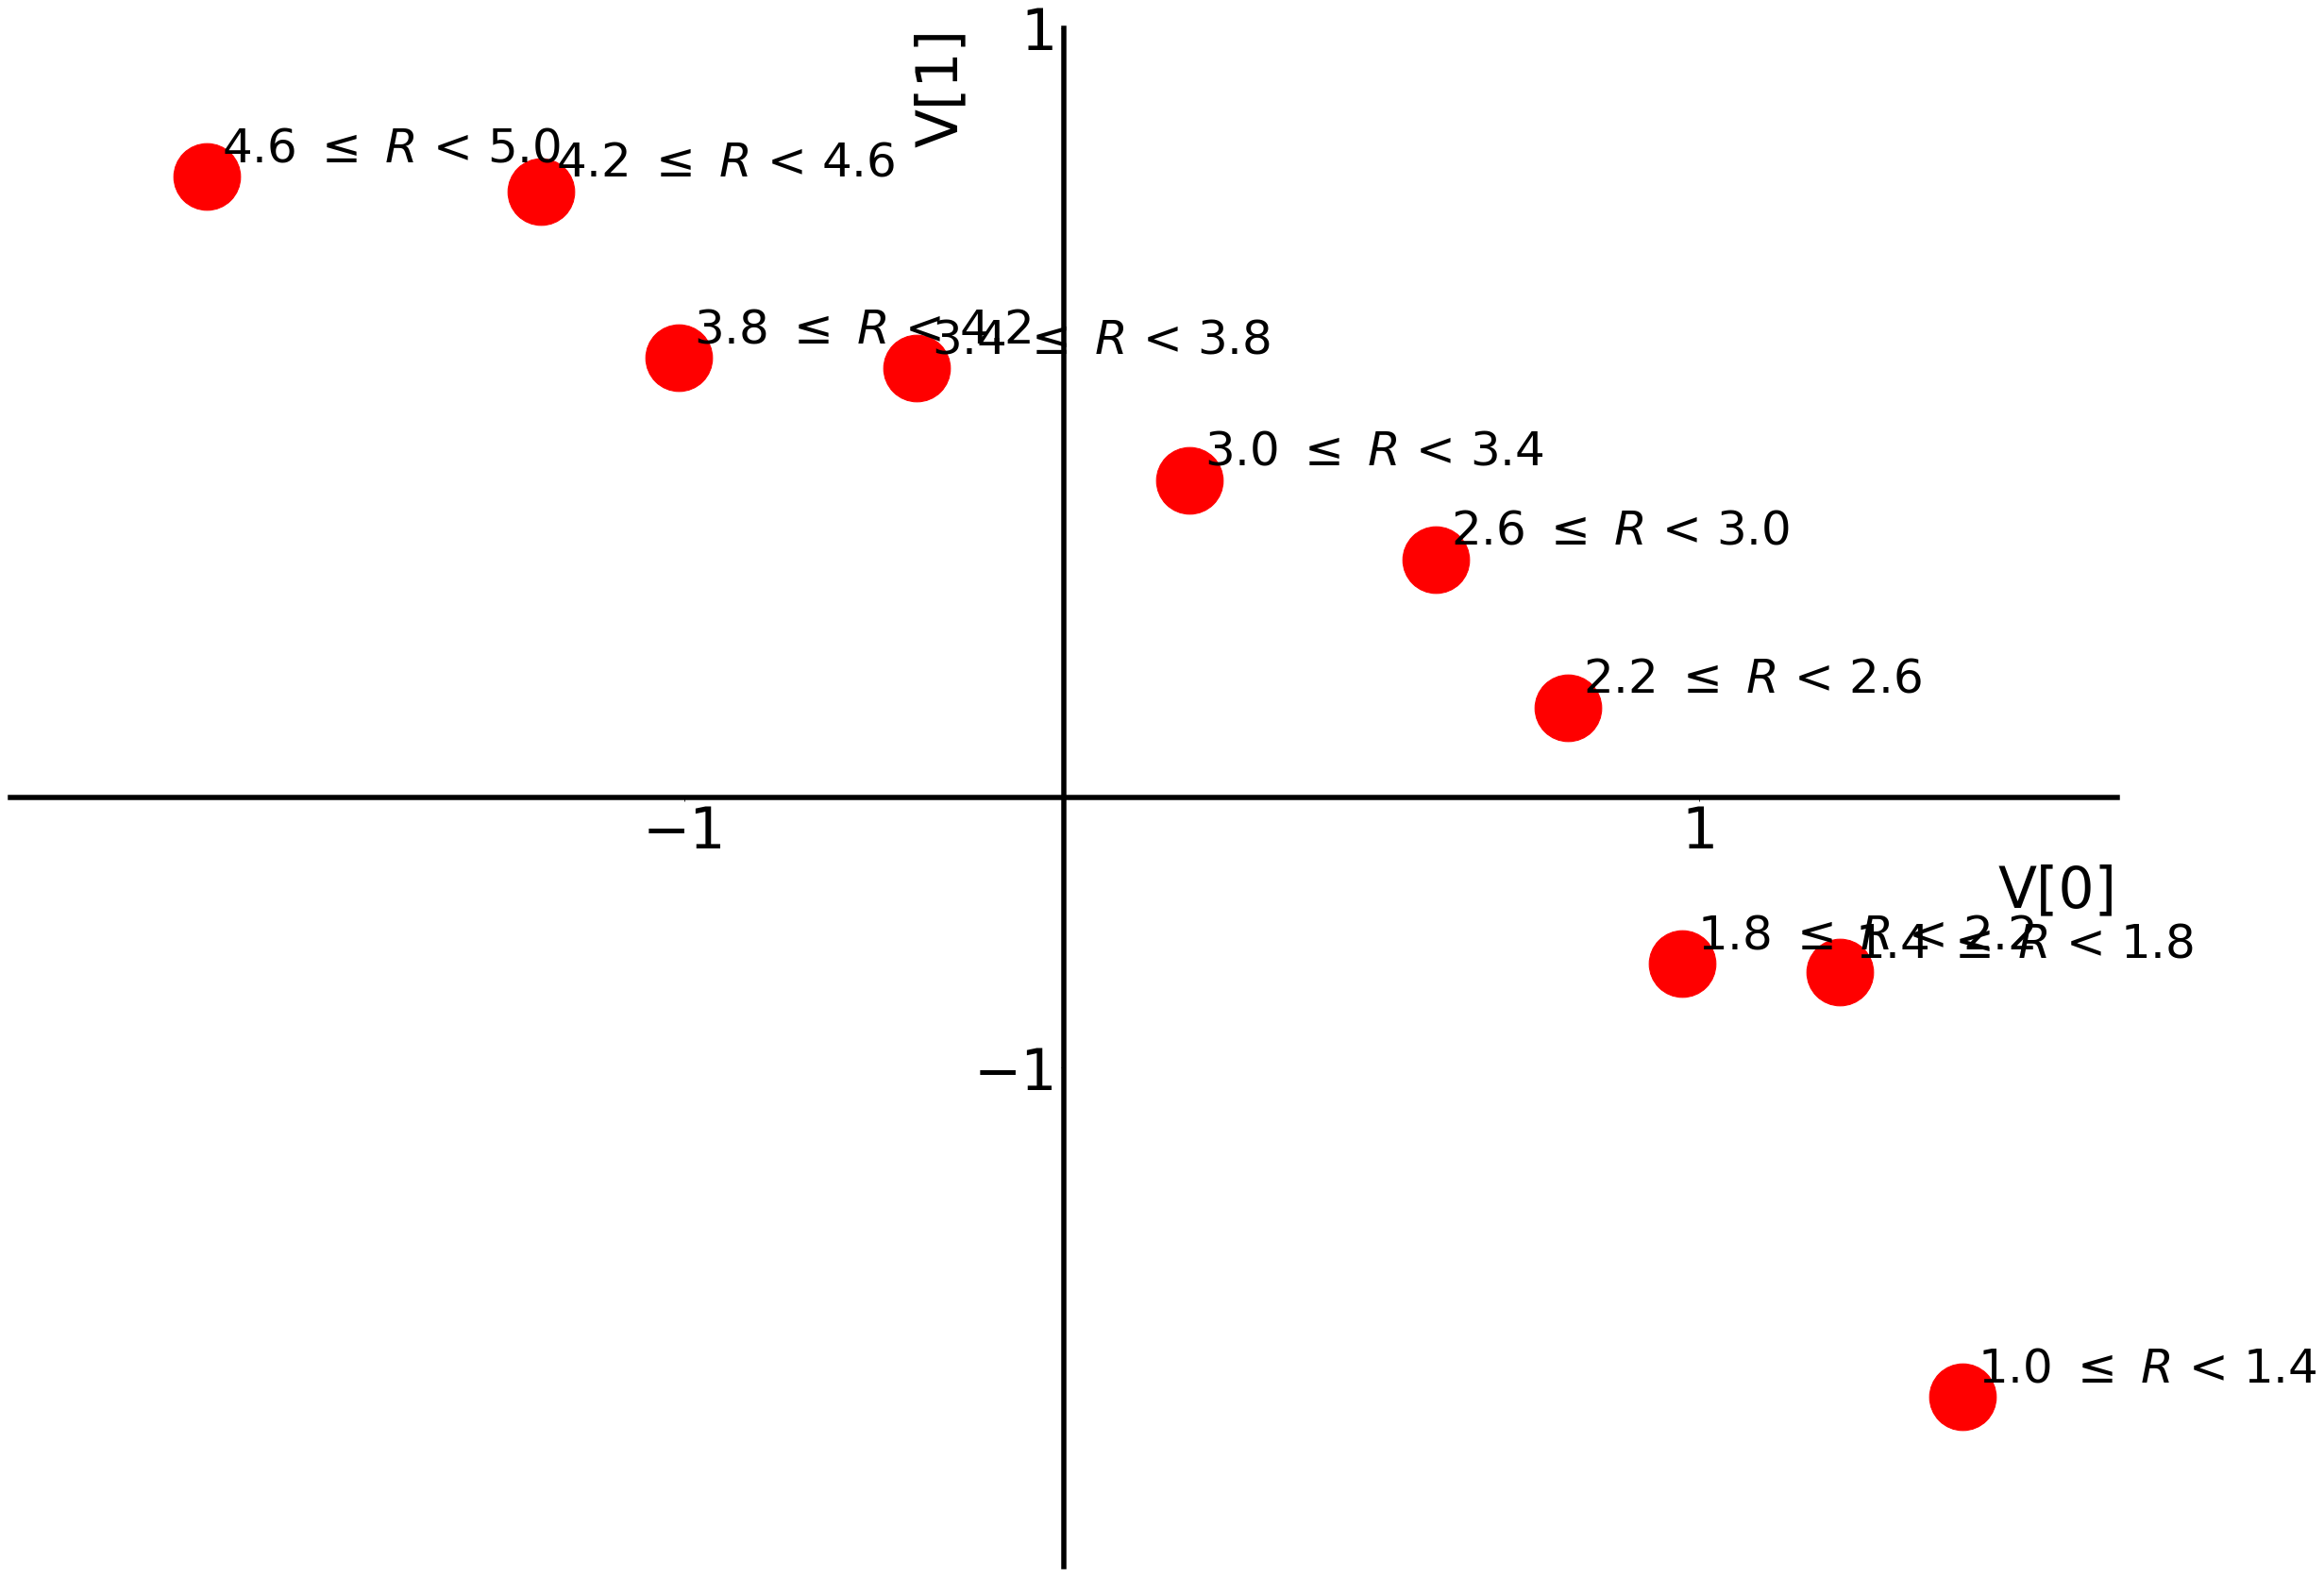

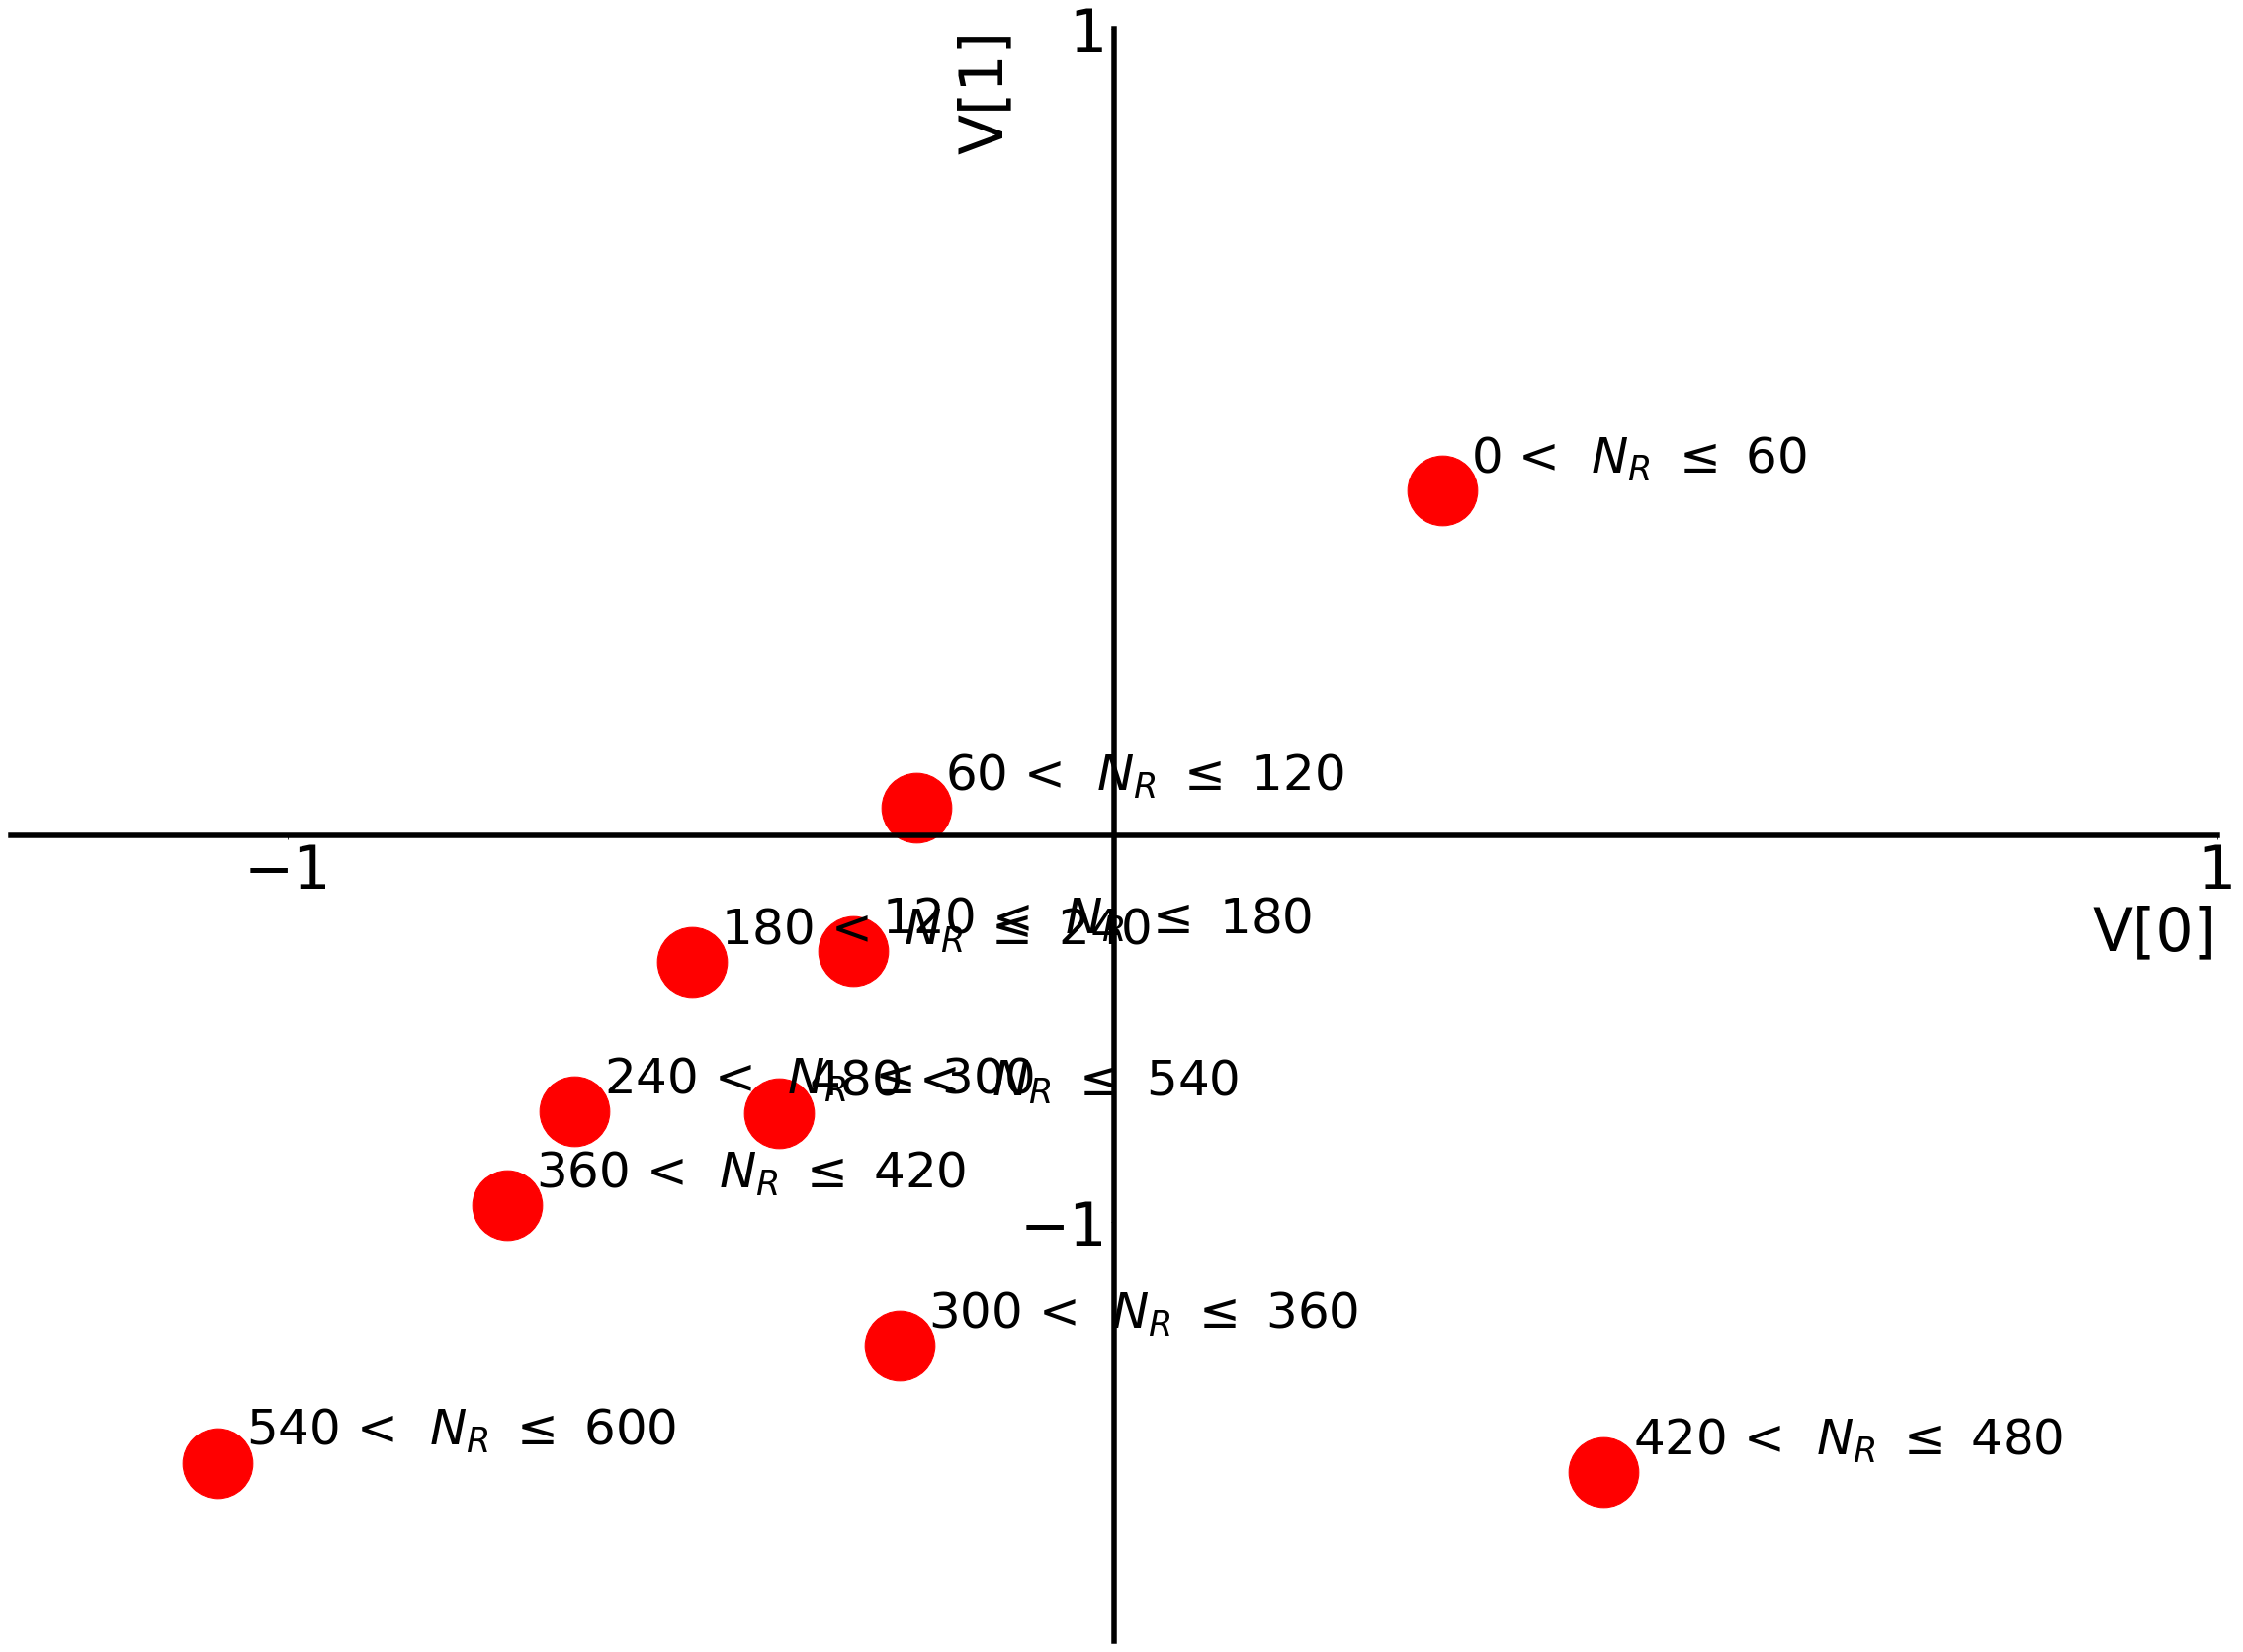

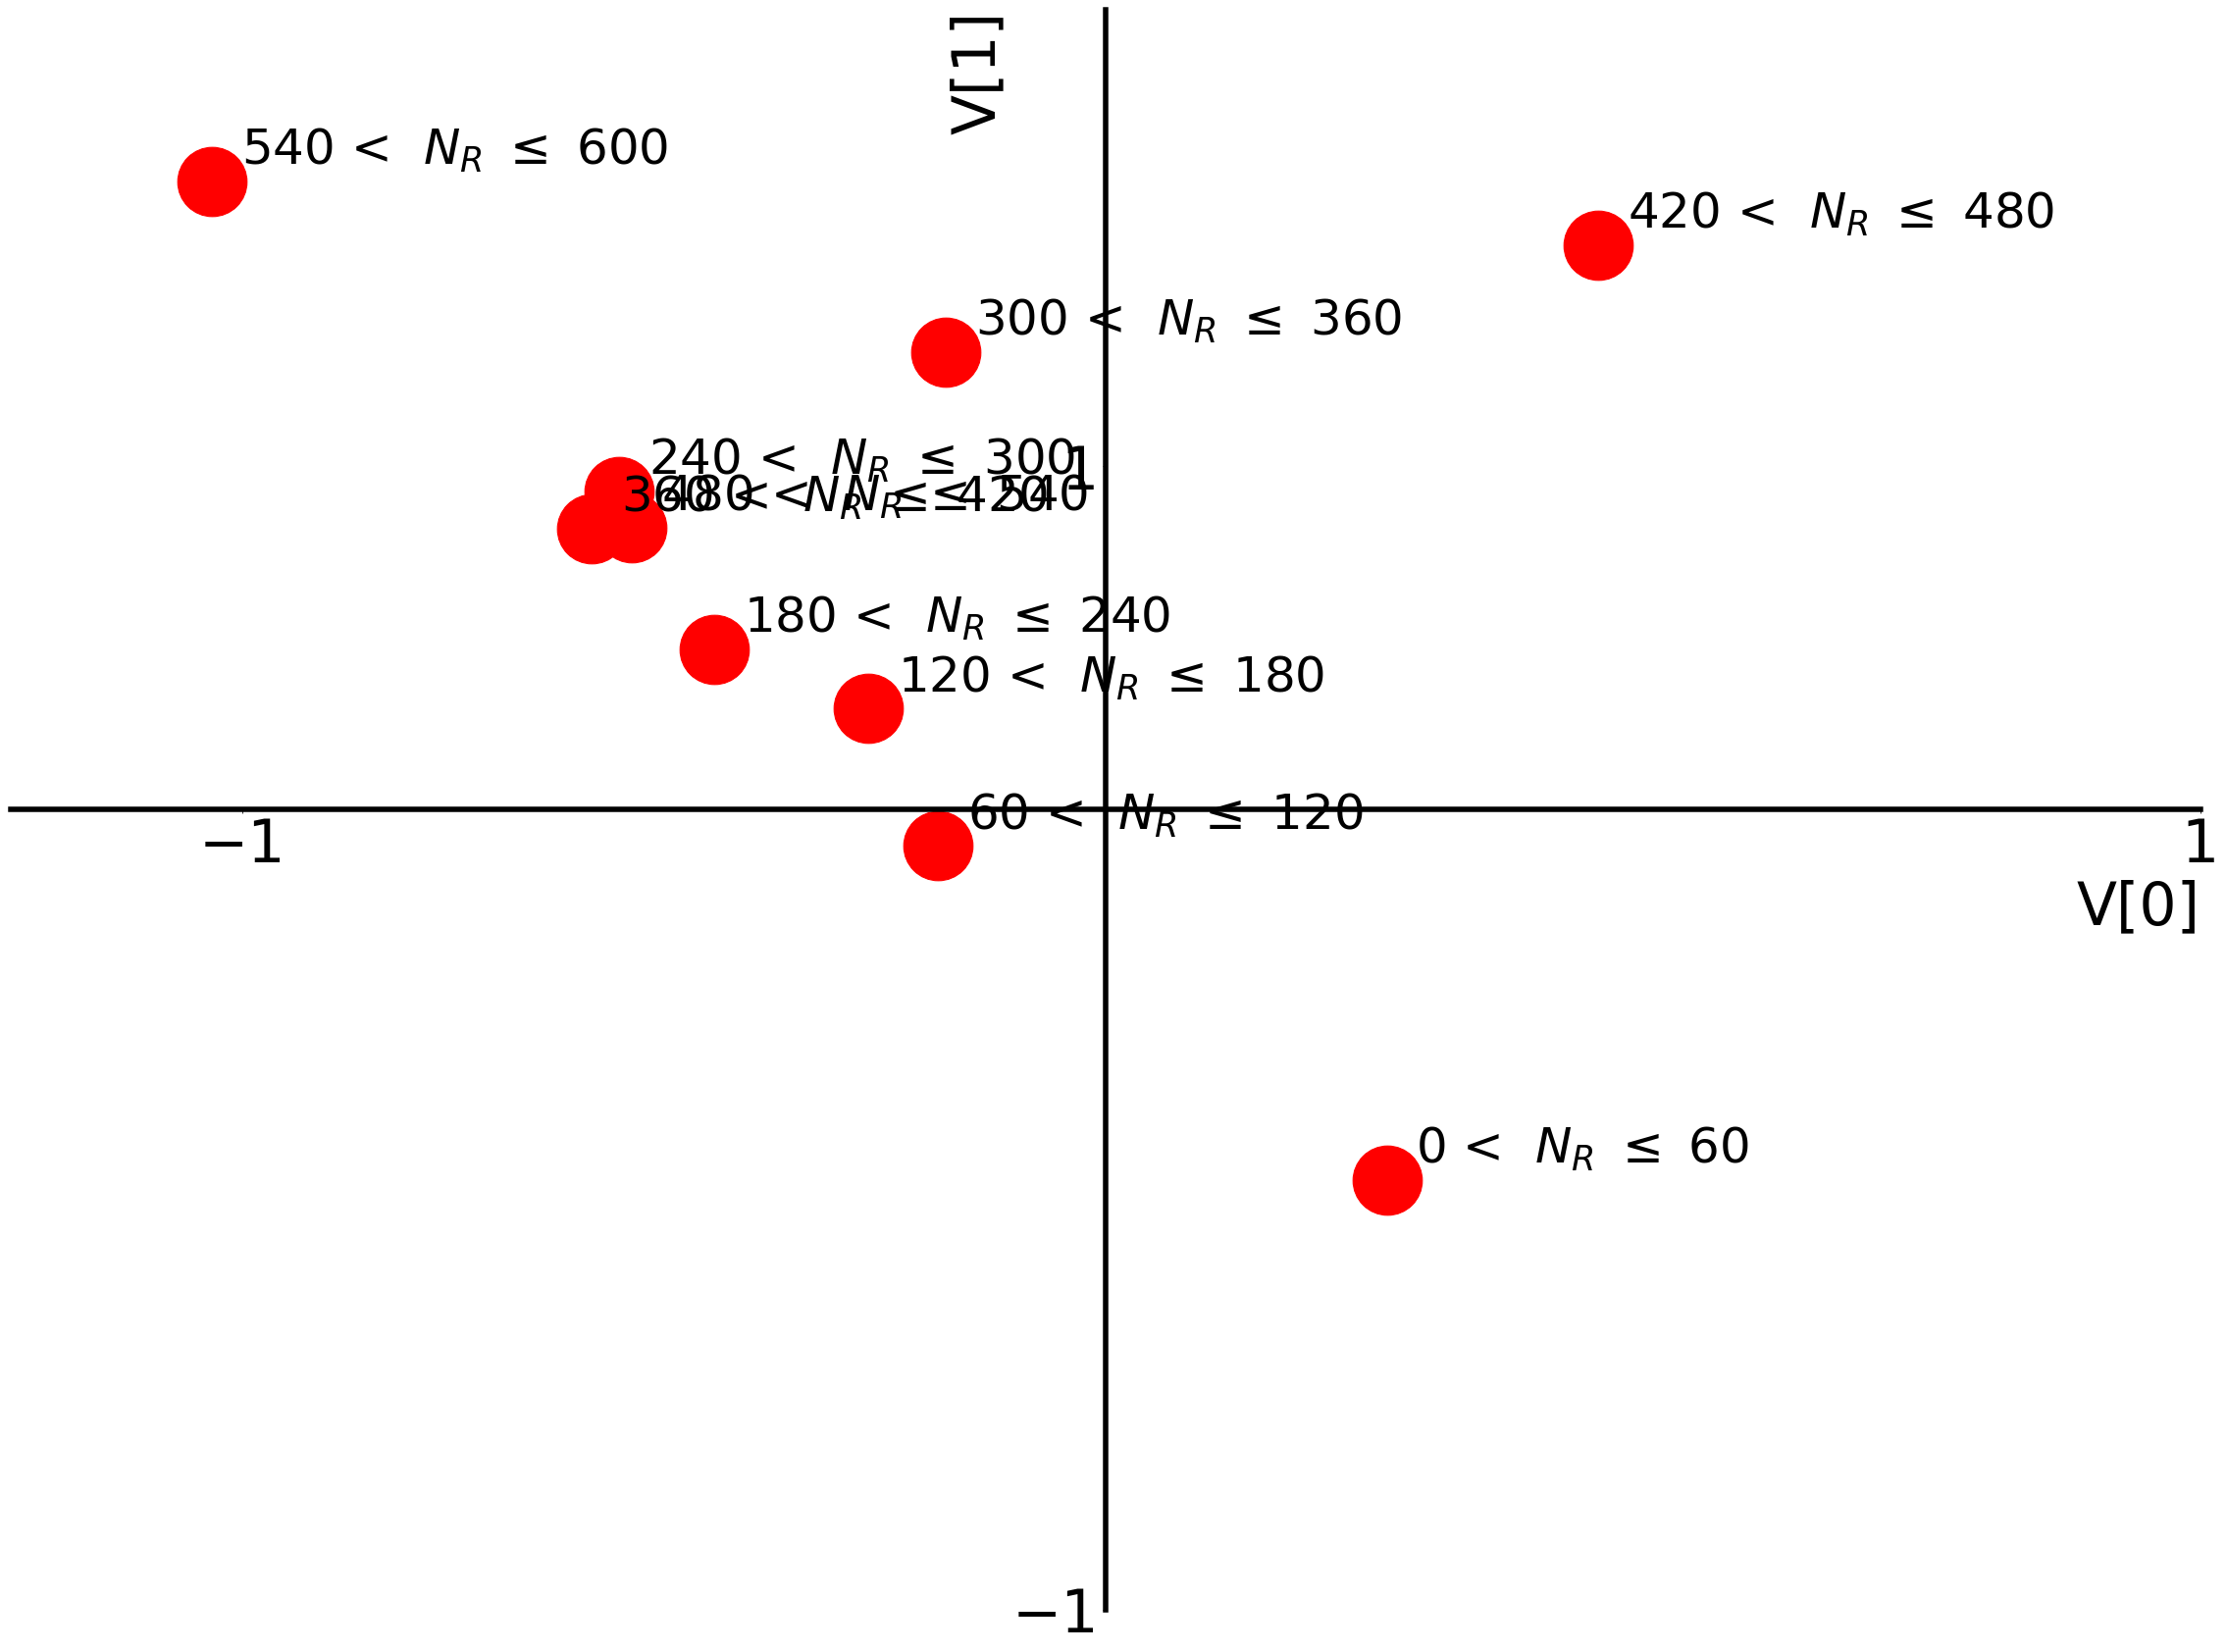

In [17]:
def visualize_V_CoM(V0, V1, labels, figname):
    """
    2D visualizatin of Vtilt.
    Input: 
    V0/V1: average V[0]/V1 of the labeled group
    labels: list of labels of the groups
    figname: the figure name you want to save
    """   
    fig = plt.figure()
    fig.set_size_inches(40,30)
    ax = fig.add_subplot(1, 1, 1)
    for idx in range(len(labels)):
        plt.scatter(V0[idx], V1[idx], marker='o', s=5000, color='red')
        plt.text(V0[idx]+0.03, V1[idx]+0.03, labels[idx], fontsize=50,rotation=0)
        #horizontalalignment='center', verticalalignment='center')
        
    plt.xlim(1.2*min(V0), 1.2*max(V0))
    plt.ylim(1.2*min(V1), 1.2*max(V1))
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_linewidth(5.5)
    ax.spines['bottom'].set_linewidth(5.5)
    ax.spines['right'].set_linewidth(5.5)
    ax.spines['top'].set_linewidth(5.5)
    #ax.set_yticklabels([])
    #ax.set_xticklabels([])
    plt.xticks([-1,1], fontsize=60)
    plt.yticks([-1,1], fontsize=60)
    plt.xlabel('V[0]',horizontalalignment='right', x=1.0, fontsize=60)
    plt.ylabel('V[1]',horizontalalignment='right', y=1.0, fontsize=60)
    #plt.show()
    plt.savefig('plots/'+figname+'.pdf')
    plt.savefig('plots/'+figname+'.png')
def averageV(Vtilt, ids):
    #normalize Vtilt such that each row has variance of 1.0
    Vtilt_row_means = np.mean(Vtilt, axis=1)
    Vtilt_row_std = np.std(Vtilt, axis=1)
    Vtiltp = np.zeros_like(Vtilt)
    for irow in range(len(Vtilt)):
        Vtiltp[irow] = np.divide(Vtilt[irow] - Vtilt_row_means[irow],Vtilt_row_std[irow])
    V0 = 0.0
    V1 = 0.0
    for idx in range(len(ids)):
        V0 += Vtiltp[0][ids[idx]]
        V1 += Vtiltp[1][ids[idx]]
    V0 = V0/len(ids)
    V1 = V1/len(ids)
    return V0, V1

##plot the average V[0] and V[1] for all the 19 types of movies
generes_all = ['Unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
V0_generes_all = np.zeros(len(generes_all))
V1_generes_all = np.zeros(len(generes_all))

V0_generes_all_bias = np.zeros(len(generes_all))
V1_generes_all_bias = np.zeros(len(generes_all))

for idx in range(len(generes_all)):
    ids_genere = [i for i in range(len(movies_all)) if movies_all[i][2+idx] ==1]
    V0_generes_all[idx],  V1_generes_all[idx]= averageV(Vtilt, ids_genere)
    V0_generes_all_bias[idx],  V1_generes_all_bias[idx]= averageV(Vtilt_bias, ids_genere)
#print(V0_generes_all)
#print(V1_generes_all)

visualize_V_CoM(V0_generes_all, V1_generes_all, generes_all, 'visualize_V_averageV_all_generes')
visualize_V_CoM(V0_generes_all_bias, V1_generes_all_bias, generes_all, 'visualize_V_bias_averageV_all_generes')

##plot average V[0] and V[1] in bins of average ratings
range_rating = []
V0_ratings_all = np.zeros(10)
V1_ratings_all = np.zeros(10)
V0_ratings_all_bias = np.zeros(10)
V1_ratings_all_bias = np.zeros(10)

for idx in range(10):
    rating_low = 1.0 + idx*(5.0-1.0)/10
    rating_high = 1.0 + (idx+1)*(5.0-1.0)/10
    range_rating.append("%.1f $\leq$ $R$ < %.1f"%(rating_low, rating_high))
    ids_rating = [i for i in range(len(average_ratings_all)) if average_ratings_all[i] >= rating_low and average_ratings_all[i] < rating_high]
    V0_ratings_all[idx],  V1_ratings_all[idx]= averageV(Vtilt, ids_rating) 
    V0_ratings_all_bias[idx],  V1_ratings_all_bias[idx]= averageV(Vtilt_bias, ids_rating) 
#print(range_rating)
#print(V0_ratings_all)
#print(V1_ratings_all)
visualize_V_CoM(V0_ratings_all, V1_ratings_all, range_rating, 'visualize_V_averageV_all_ratings')
visualize_V_CoM(V0_ratings_all_bias, V1_ratings_all_bias, range_rating, 'visualize_V_bias_averageV_all_ratings')

##plot average V[0] and V[1] in bins of average num of ratings
range_Nrating = []
V0_Nratings_all = np.zeros(10)
V1_Nratings_all = np.zeros(10)
V0_Nratings_all_bias = np.zeros(10)
V1_Nratings_all_bias = np.zeros(10)

for idx in range(10):
    Nrating_low = 0.0 + idx*(600.0-0.0)/10
    Nrating_high = 0.0 + (idx+1)*(600.0-0.0)/10
    range_Nrating.append("%.0f <  $N_{R}$ $\leq$ %.0f"%(Nrating_low, Nrating_high))
    ids_Nrating = [i for i in range(len(num_of_ratings_all)) if num_of_ratings_all[i] > Nrating_low and num_of_ratings_all[i] <= Nrating_high]
    #print(ids_Nrating)
    V0_Nratings_all[idx],  V1_Nratings_all[idx]= averageV(Vtilt, ids_Nrating) 
    V0_Nratings_all_bias[idx],  V1_Nratings_all_bias[idx]= averageV(Vtilt_bias, ids_Nrating) 
#print(range_Nrating)
#print(V0_Nratings_all)
#print(V1_Nratings_all)
visualize_V_CoM(V0_Nratings_all, V1_Nratings_all, range_Nrating, 'visualize_V_averageV_all_num_of_ratings')
visualize_V_CoM(V0_Nratings_all_bias, V1_Nratings_all_bias, range_Nrating, 'visualize_V_bias_averageV_all_num_of_ratings')

## task 3: off-the-shelf: surprise

In [21]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import PredefinedKFold as pkf

import pandas as pd

In [23]:
uid, mid, rating = np.loadtxt('./data/data.txt', delimiter='\t', usecols = (0,1,2), unpack = True)

ratings_dict = {'itemID': uid,
                'userID': mid,
                'rating': rating}

df = pd.DataFrame(ratings_dict)

reader = Reader(rating_scale=(1, 5))

# load data
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

In [31]:
#use SVD algorithm.
algo = SVD()

param_grid = {'n_factors': [20], 'n_epochs': [20], 'lr_all': [0.001,0.01,0.02,0.03,0.04,0.05,0.1],
              'reg_all': [0.001,0.01,0.06,0.08,0.1,0.12,0.14,0.2,1]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9256389932577606
{'n_factors': 20, 'n_epochs': 20, 'lr_all': 0.02, 'reg_all': 0.1}


In [32]:
# We can now use the algorithm that yields the best rmse:
algo = SVD(n_factors=20, n_epochs=300, lr_all=0.02, reg_all=0.1)
algo.fit(data.build_full_trainset())

In [47]:
del Vtilt_surprise,A12T_surprise,A12_surprise

(20, 943)
(20, 1682)


IndexError: index 1454 is out of bounds for axis 0 with size 943

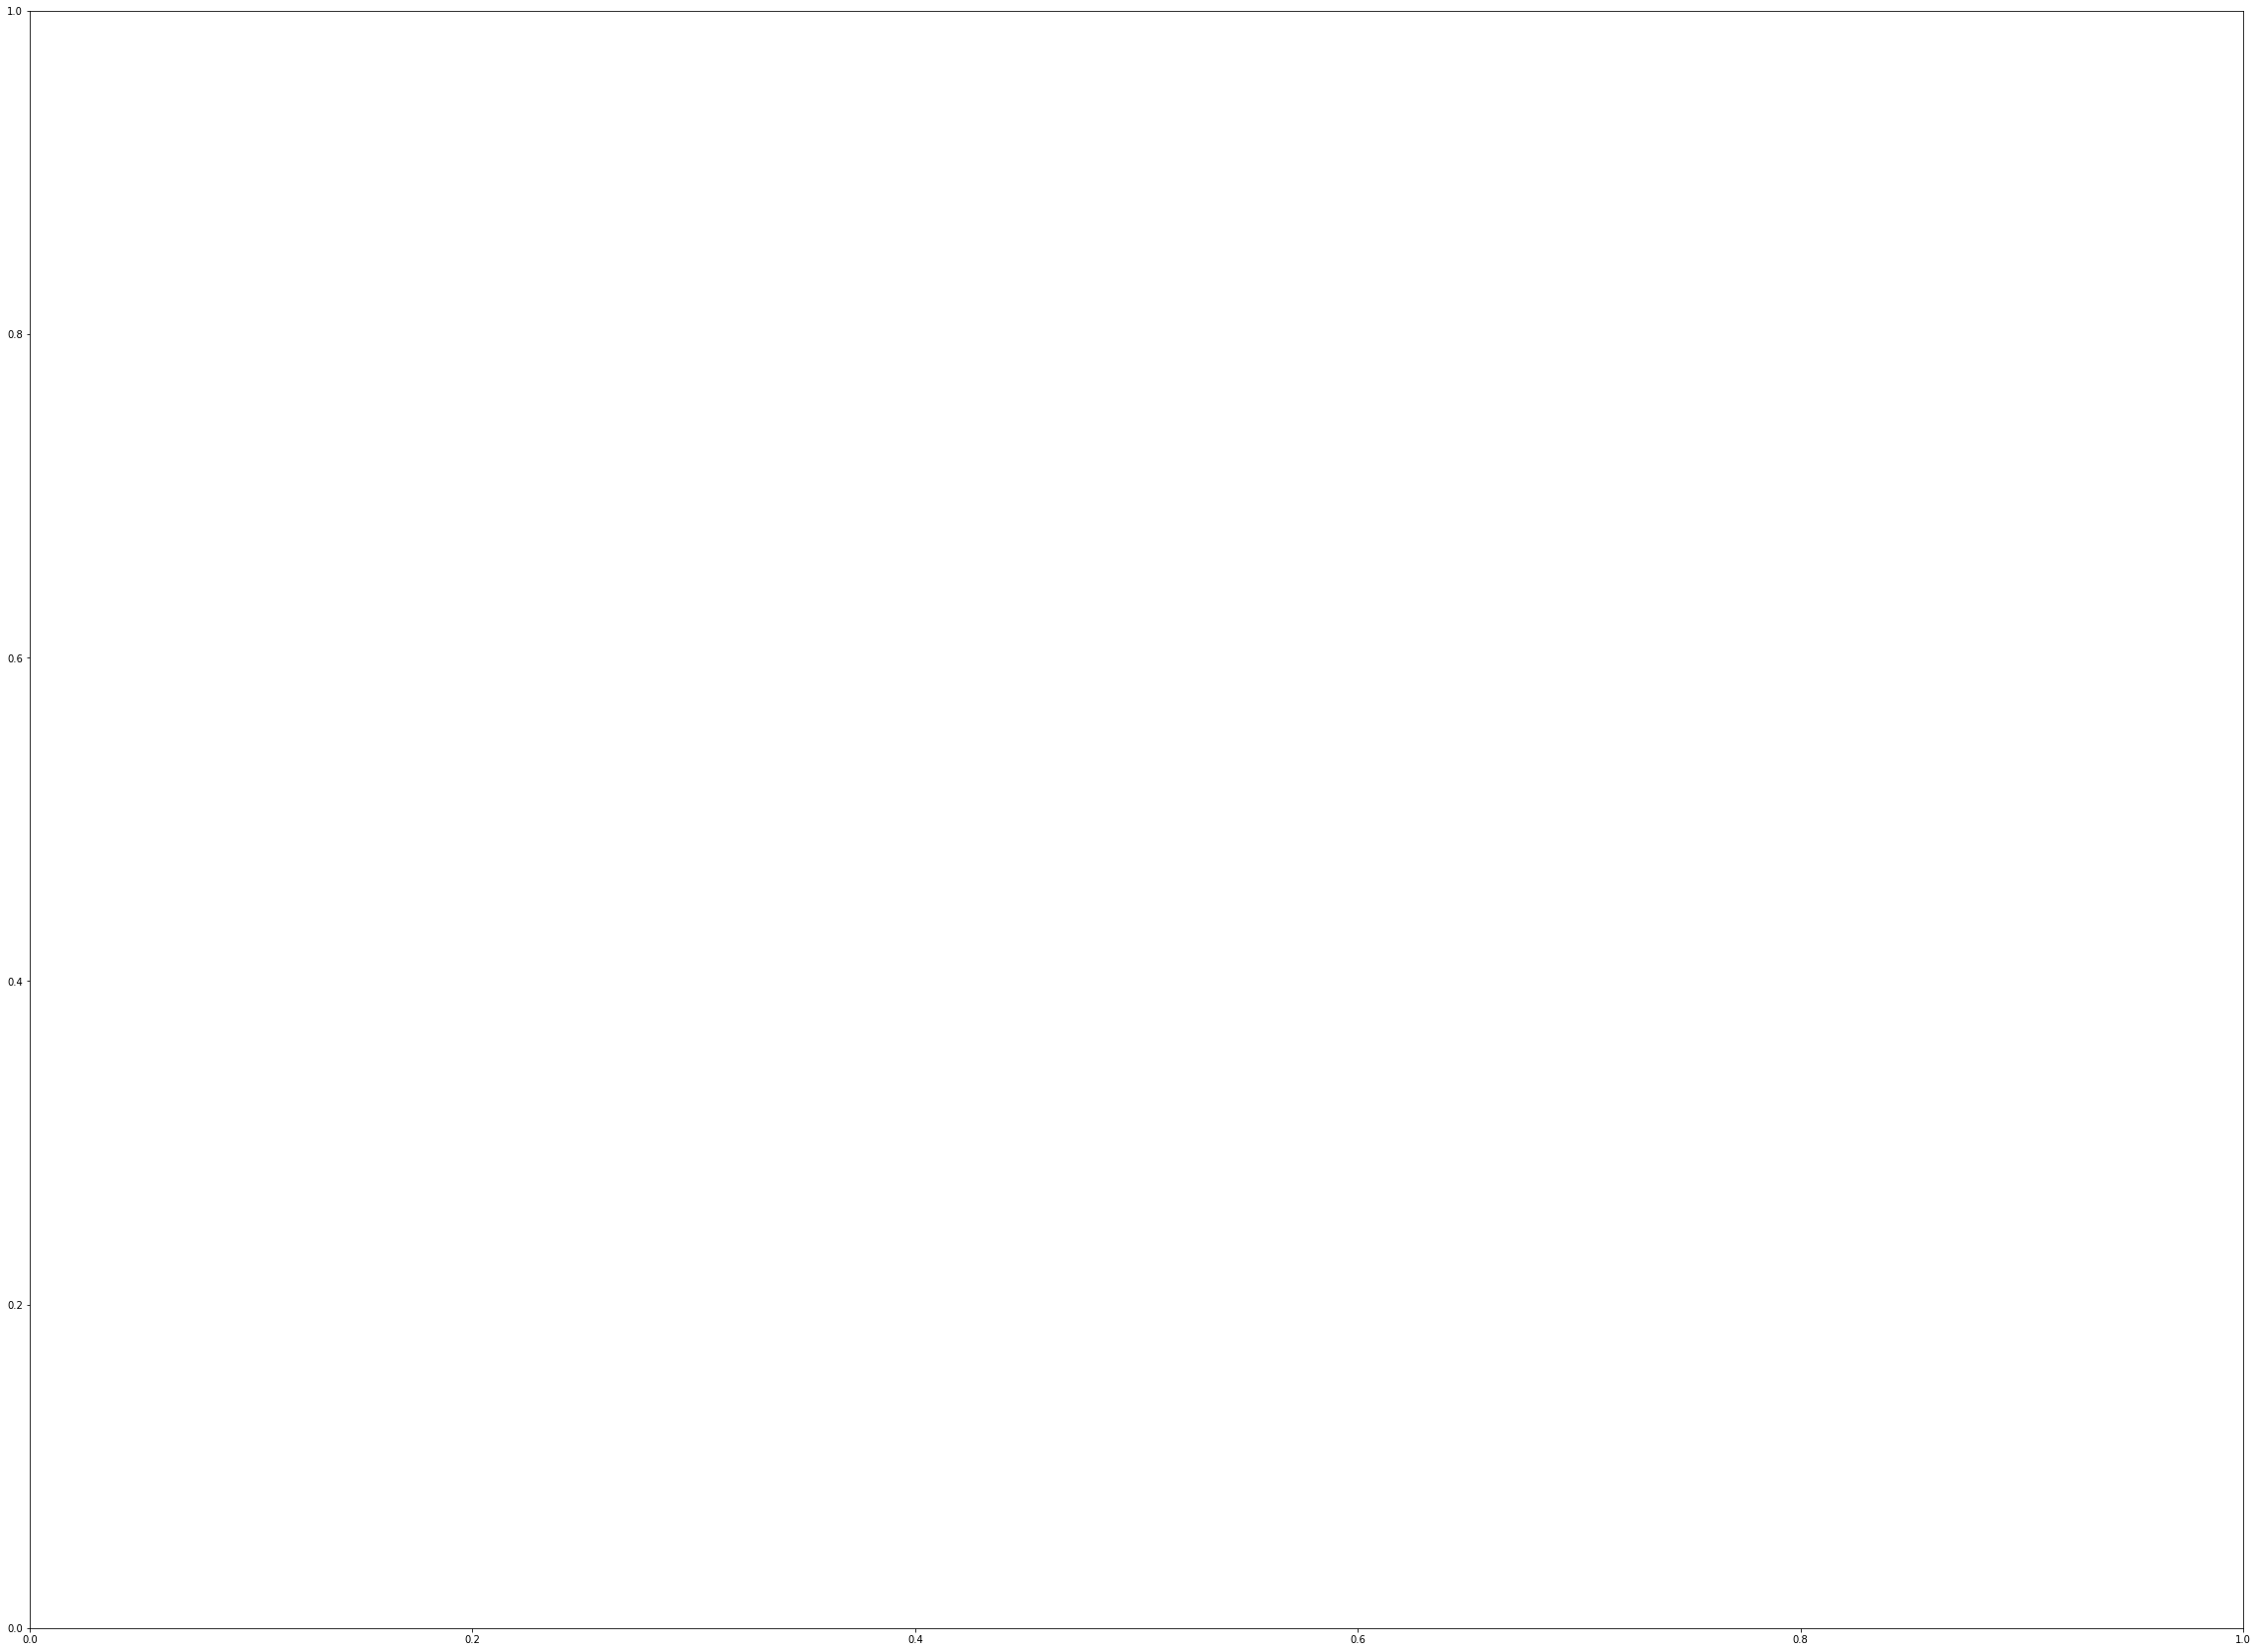

In [49]:
## perform SVD to V and get the A, Sigma, B
UT_surprise = algo.qi
VT_surprise = algo.pu

U_surprise = UT_surprise.transpose()


V_surprise = VT_surprise.transpose()
Vp_surprise = np.zeros_like(V_surprise)
V_surprise_row_means = np.mean(V_surprise, axis=1)
for irow in range(len(V_surprise)):
    Vp_surprise[irow] = V_surprise[irow] - V_surprise_row_means[irow]
A_surprise, S_surprise, B_surprise =  np.linalg.svd(Vp_surprise)
A12_surprise = A_surprise[:,[0,1]]
A12T_surprise = A12_surprise.transpose()
Vtilt_surprise = np.matmul(A12T, V_surprise)

## perform SVD to V and get the A, Sigma, B
#U = UT.transpose()
#V = VT.transpose()
#Vp = np.zeros_like(V)
#V_row_means = np.mean(V, axis=1)
#for irow in range(len(V)):
    #Vp[irow] = V[irow] - V_row_means[irow]
#A, S, B =  np.linalg.svd(Vp)
#A12 = A[:,[0,1]]
#A12T = A12.transpose()
#Vtilt = np.matmul(A12T, V)


## visualize the movies of choices
visualize_V(Vtilt_surprise, id_random10, name_random10, 'visualize_V_surprise_random10movies')
visualize_V(Vtilt_surprise, id_random10_action, name_random10_action, 'visualize_V_surprise_random10movies_action')
visualize_V(Vtilt_surprise, id_random10_documentary, name_random10_documentary, 'visualize_V_surprise_random10movies_documentary')
visualize_V(Vtilt_surprise, id_random10_drama, name_random10_drama, 'visualize_V_surprise_random10movies_drama')
visualize_V(Vtilt_surprise, id_best_10, name_best_10, 'visualize_V_surprise_best10movies')
visualize_V(Vtilt_surprise, id_most_popular_10, name_most_popular_10, 'visualize_V_surprise_mostpopular10movies')
